In [61]:
import pandas as pd
import numpy as np

#import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
palette = {0: 'indianred', 1: 'steelblue'}

In [62]:
#load the dataset "final_dataset_Nov_9.csv"
df = pd.read_csv("../Data/final_dataset_Nov_12.csv")

df

STUDENT  GRAD_SEM  101  104  105  140  143  145  150  151  ...  365  \
0           0       8.0    0    0    0    0    0    0    0    0  ...    0   
1           3       0.0    0    0    0    0    0    0    0    0  ...    0   
2           4       8.0    0    0    0    0    0    0    0    0  ...    0   
3           5       0.0    0    0    0    2    0    0    0    0  ...    0   
4           7       7.0    0    4    0    0    0    0    0    0  ...    0   
...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9174    13059       4.0    0    0    0    3    0    0    1    0  ...    0   
9175    13060      10.0    0    0    0   -1    0    0   -2    0  ...    0   
9176    13061       0.0    0    0    0    0    0    0    2    0  ...    0   
9177    13062       5.0    0    0    0    0    0    0   -4    0  ...    0   
9178    13063       9.0    0    0    0    0    0    0    2    5  ...    0   

      373  385  397  414  415  435  436  497  y  
0       0    0    0    0    0    0    0    0  1  
1       0    0    0    0    0    0    0    0  0  
2       0    0    0    0    0    0    0    0  1  
3       0    0    0    0    0    0    0    0  0  
4       0    0    0    0    0    0    0    0  1  
...   ...  ...  ...  ...  ...  ...  ...  ... ..  
9174    0    0    0    0    0    0    0    0  1  
9175    0    0    0    0    0    0    0    0  0  
9176    0    0    0    0    0    0    0    0  0  
9177    0    0    0    0    0    0    0    0  1  
9178    0    0    0    0    0    0    0    0  0  

[9179 rows x 37 columns]

In [63]:
cols = df.columns.to_list()
cols

['STUDENT',
 'GRAD_SEM',
 '101',
 '104',
 '105',
 '140',
 '143',
 '145',
 '150',
 '151',
 '160',
 '165',
 '166',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '497',
 'y']

In [64]:
courses = ['101',
 '104',
 '105',
 '140',
 '143',
 '145',
 '150',
 '151',
 '160',
 '165',
 '166',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '497']

In [65]:
#get basic statistics on graduates
y=df['y']
grads = y.value_counts().get(1, 0)
grad_rate = y.mean()

print(f"Number of graduates: {grads}")
print(f'Total number of students: {len(df)}')
print(f"Graduation rate: {grad_rate}")

Number of graduates: 4953
Total number of students: 9179
Graduation rate: 0.5396012637542216


In [66]:
#replace all negative values in the dataset with 0; thus, all failing grades are treated as not taking the course.
#Note: if any rows become all 0's, then they correspond to students who did not pass any math courses but took at least one math course within 8 semesters.
# df = df.clip(lower=0)

#check if there are any rows with all 0's
df[courses].sum(axis=1).value_counts().sort_index()

-22    1
-18    1
-17    1
-14    2
-13    5
      ..
 75    1
 76    1
 80    1
 81    1
 85    1
Name: count, Length: 95, dtype: int64

In [67]:
#The above output shows that there are 1211 who did not pass any math courses but took at least one math course within 8 semesters.

#Next, we want to understand if the probability of y=1 changes with the number of courses taken in each semester. 

#for each semester in [1,2,3,4,5,6,7,8], create a column in df counting how many courses the student has taken in that semester (i.e., how many times that number appears in df[courses])

#loop through the semesters
for i in range(1, 9):
    # Create a new column for the semester
    df[f'SEM_{i}'] = df[courses].apply(lambda x: x.tolist().count(i) - x.tolist().count(-i), axis=1)

# Create cumulative sum columns for each semester. This will give us the total number of courses passed by the student up to that semester. In particular, the final column will give us the total number of courses passed by the student within 8 semesters.
df[[f'SEM_{i}_cumulative' for i in range(1, 9)]] = df[[f'SEM_{i}' for i in range(1, 9)]].cumsum(axis=1)


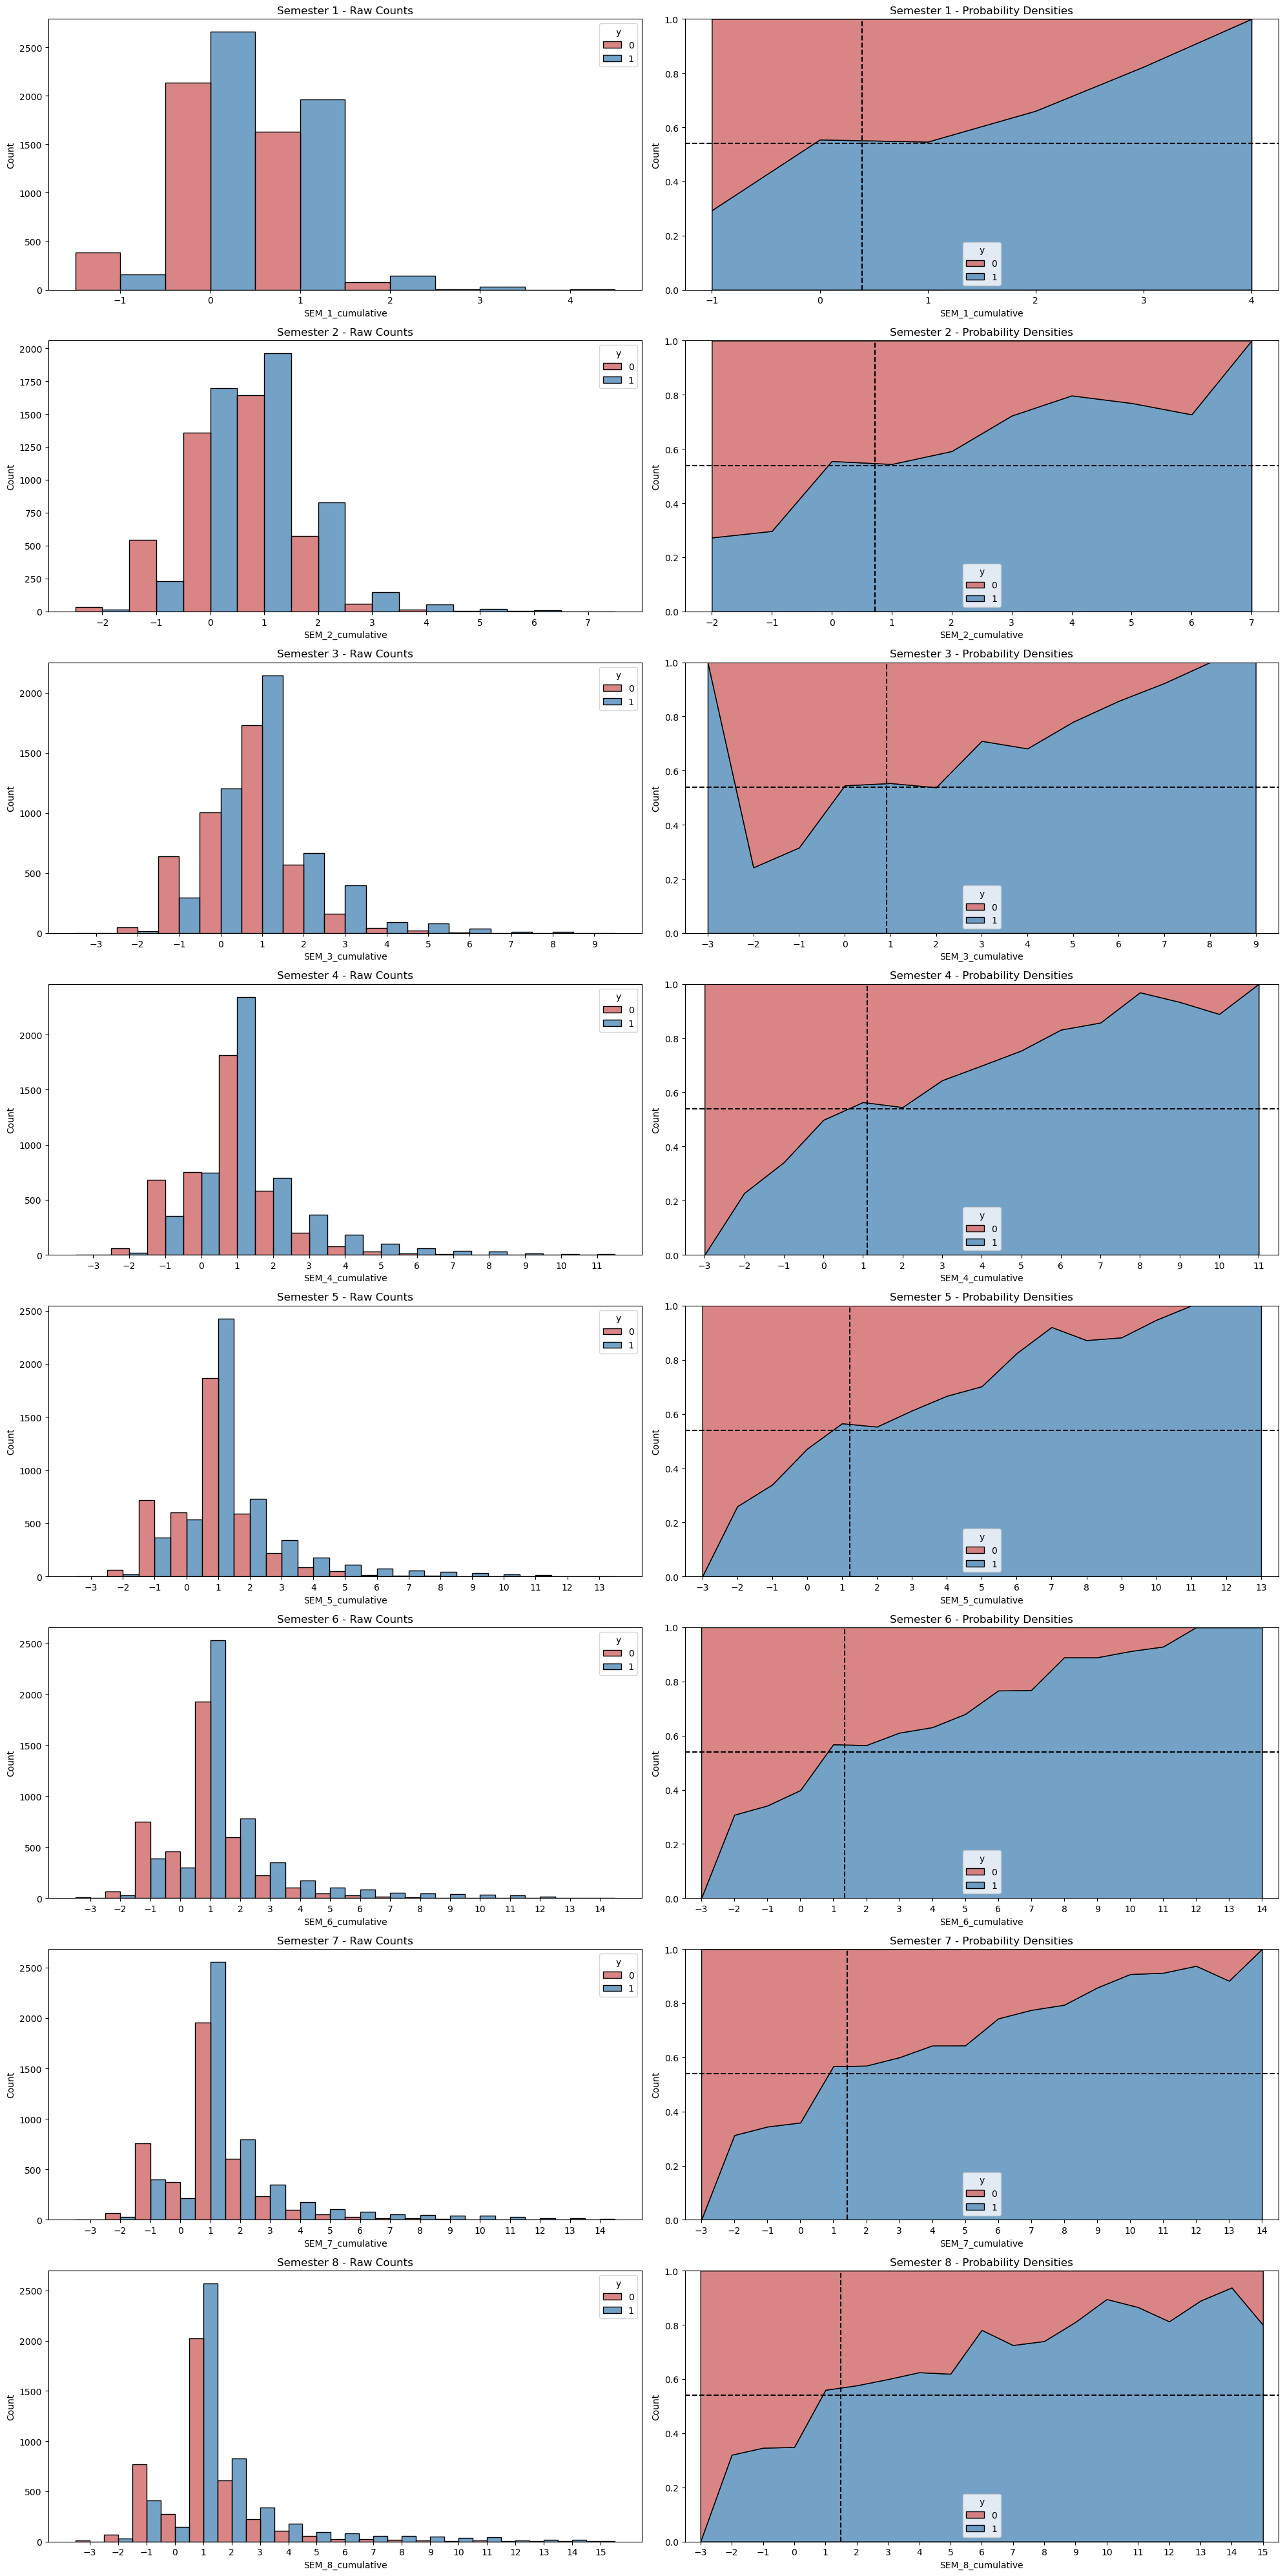

In [68]:
# Create a figure and axes
fig, axes = plt.subplots(8, 2, figsize=(20, 40))
axes = axes.flatten()

# Plot the distribution of the cumulative number of courses taken in each semester
for i in range(1, 9):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=f'SEM_{i}_cumulative', 
                 hue='y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[2*(i-1)], 
                 discrete=True)
    axes[2*(i-1)].set_title(f'Semester {i} - Raw Counts')
    axes[2*(i-1)].set_xticks(range(int(df[f'SEM_{i}_cumulative'].min()), int(df[f'SEM_{i}_cumulative'].max()) + 1))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=f'SEM_{i}_cumulative', 
                 hue='y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[2*(i-1)+1], 
                 discrete=True)
    axes[2*(i-1)+1].axhline(grad_rate, color='black', linestyle='--')
    axes[2*(i-1)+1].set_title(f'Semester {i} - Probability Densities')
    axes[2*(i-1)+1].set_xticks(range(int(df[f'SEM_{i}_cumulative'].min()), int(df[f'SEM_{i}_cumulative'].max()) + 1))
    #draw a vertical line at the mean of the x
    axes[2*(i-1)+1].axvline(df[f'SEM_{i}_cumulative'].mean(), color='black', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()


In the graphs above, the x-axis contains the number of math courses passed minus the number of math courses failed upto that semester $x$. For every given semester $x$, there is clear positive relationship between the proabibility of $y=1$ and the number of math courses passed upto semester $x$. 

The vertical lines in the probability density graphs above indicate, on average, how many courses have been passed by a student uptil semester $x$; let's call this $mean_x$. It is quite uncanny that the threshold for $\textup{Pr}(y=1) > \textup{Pr}(y=0)$ appears to take place around the value of $mean_x$ (with the strange exception of semester $3$). 

In other words, (it appears that) a student has better than average odds of graduating in 4 yrs if (and only if) they pass as many math courses as the average student up till that semester.

Nevertheless, the heavy skew in the distribution make me skeptical that these probability graphs are at all useful, because most students taken within 5-6 math courses in total. To find a way around this, let's try to group together the information from the semesters to get a more balanced distribution.

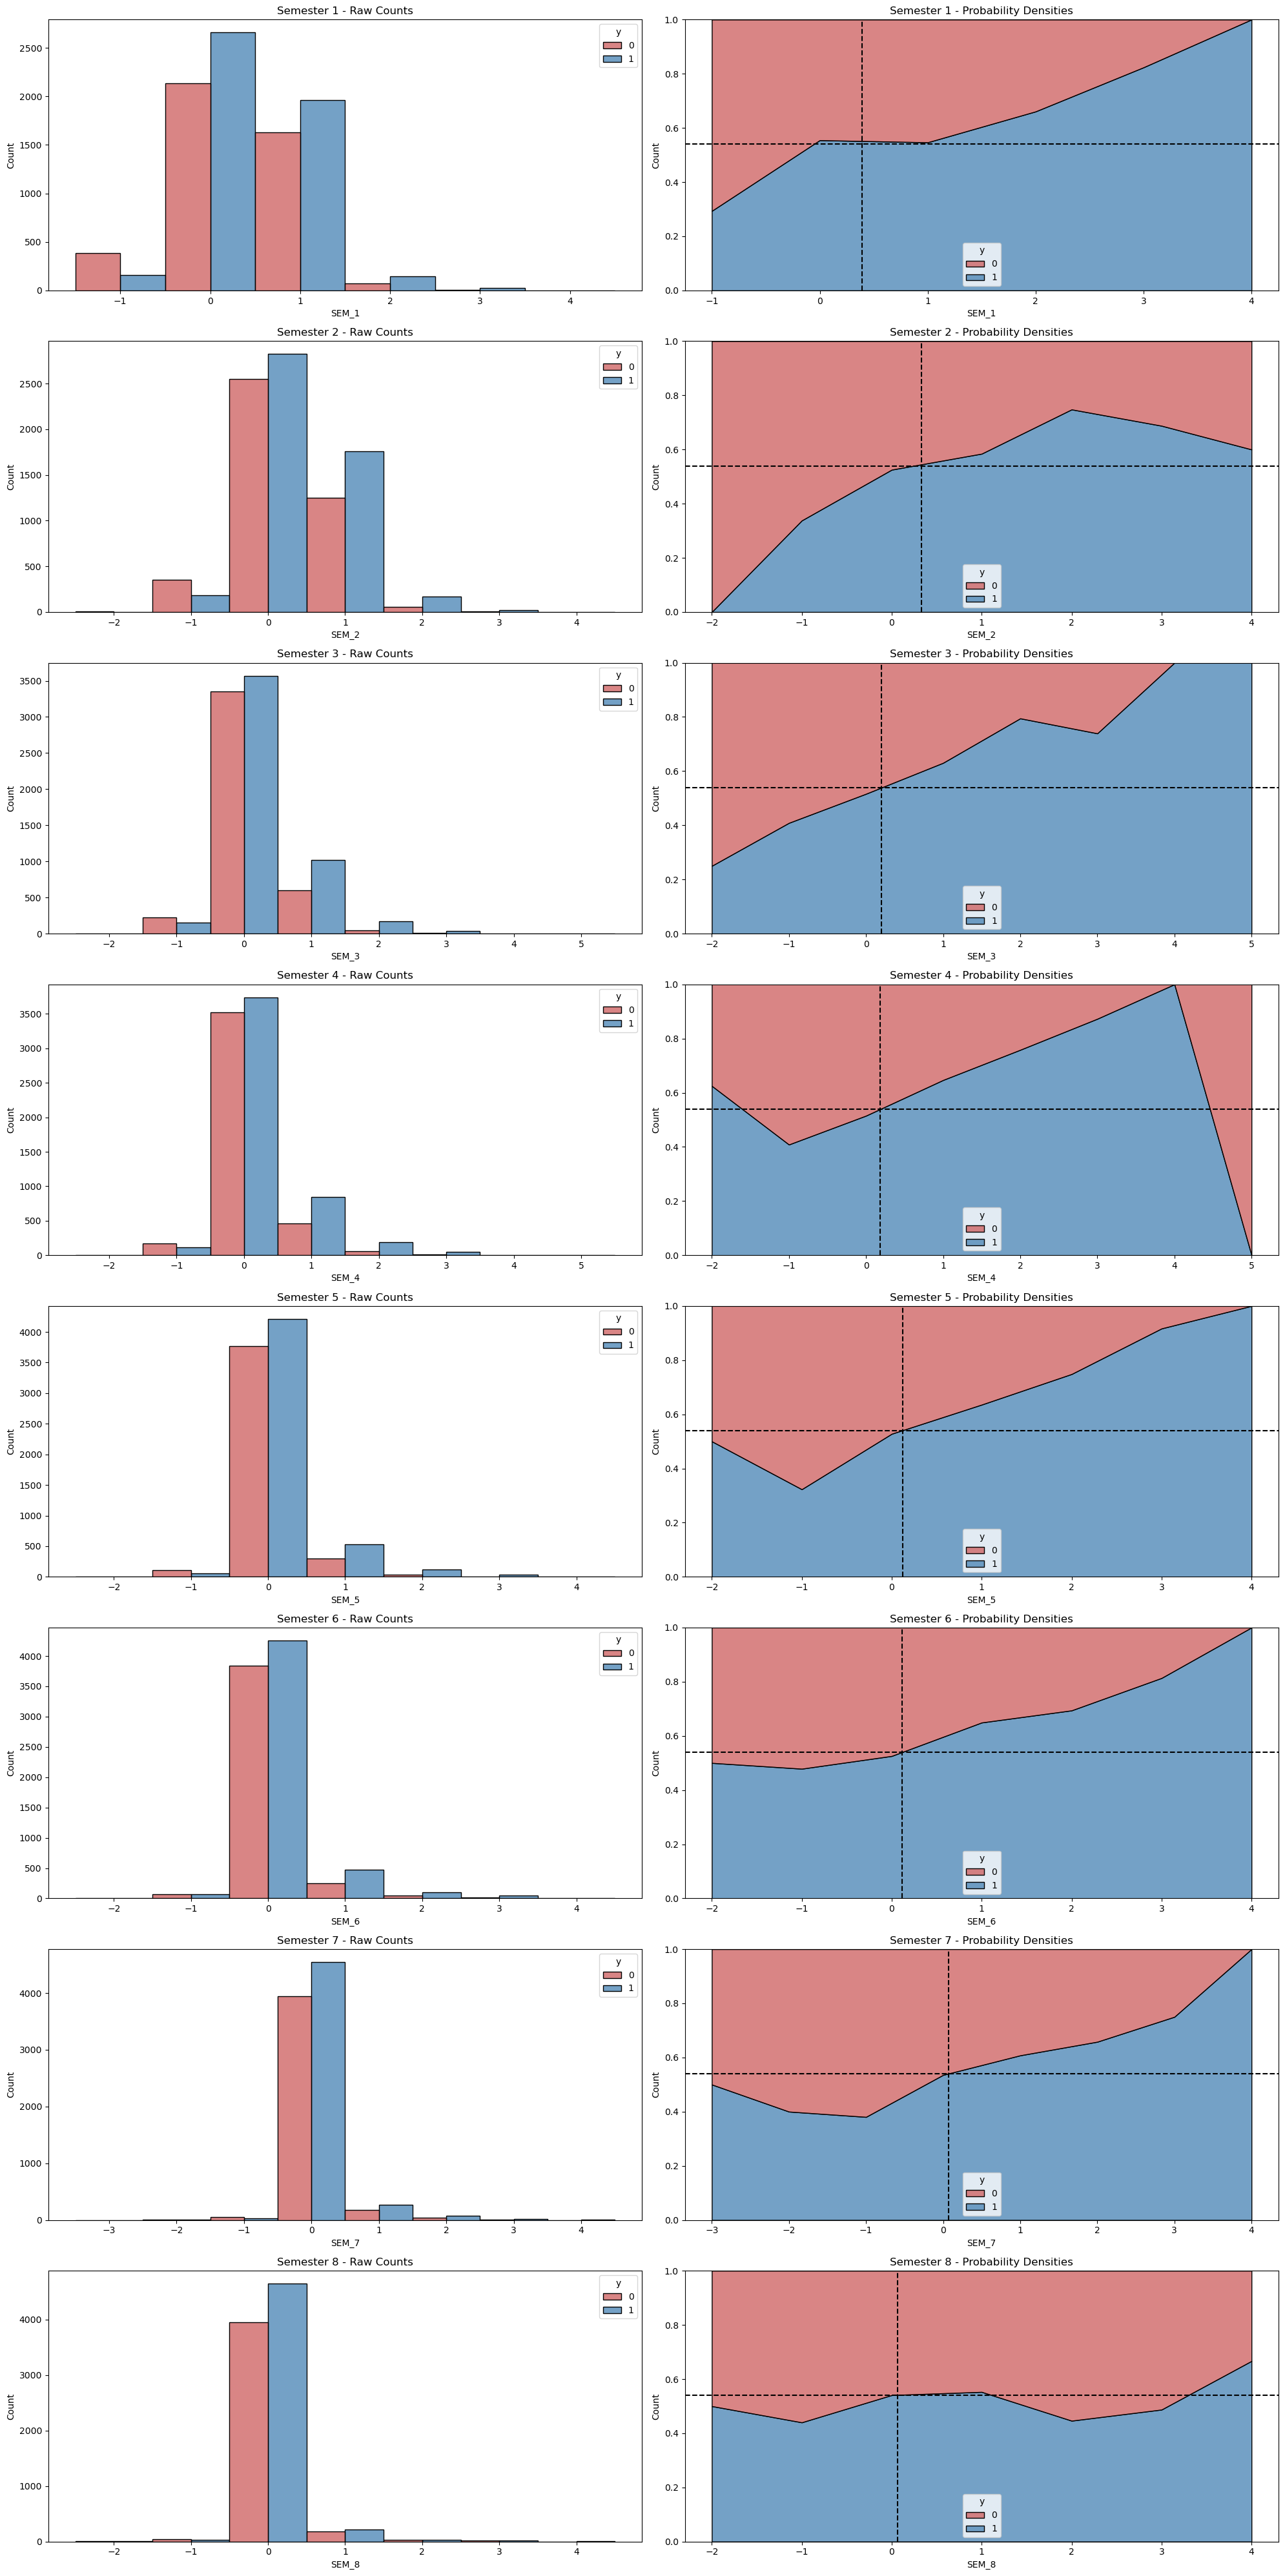

In [69]:
# Create a figure and axes
fig, axes = plt.subplots(8, 2, figsize=(20, 40))
axes = axes.flatten()

# Plot the distribution of the number of courses taken in each semester
for i in range(1, 9):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=f'SEM_{i}', 
                 hue='y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[2*(i-1)], 
                 discrete=True)
    axes[2*(i-1)].set_title(f'Semester {i} - Raw Counts')
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=f'SEM_{i}', 
                 hue='y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[2*(i-1)+1], 
                 discrete=True)
    axes[2*(i-1)+1].axhline(grad_rate, color='black', linestyle='--')
    axes[2*(i-1)+1].set_title(f'Semester {i} - Probability Densities')
    axes[2*(i-1)+1].set_xticks(range(int(df[f'SEM_{i}'].min()), int(df[f'SEM_{i}'].max()) + 1))
    #draw a vertical line at the mean of the x
    axes[2*(i-1)+1].axvline(df[f'SEM_{i}'].mean(), color='black', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

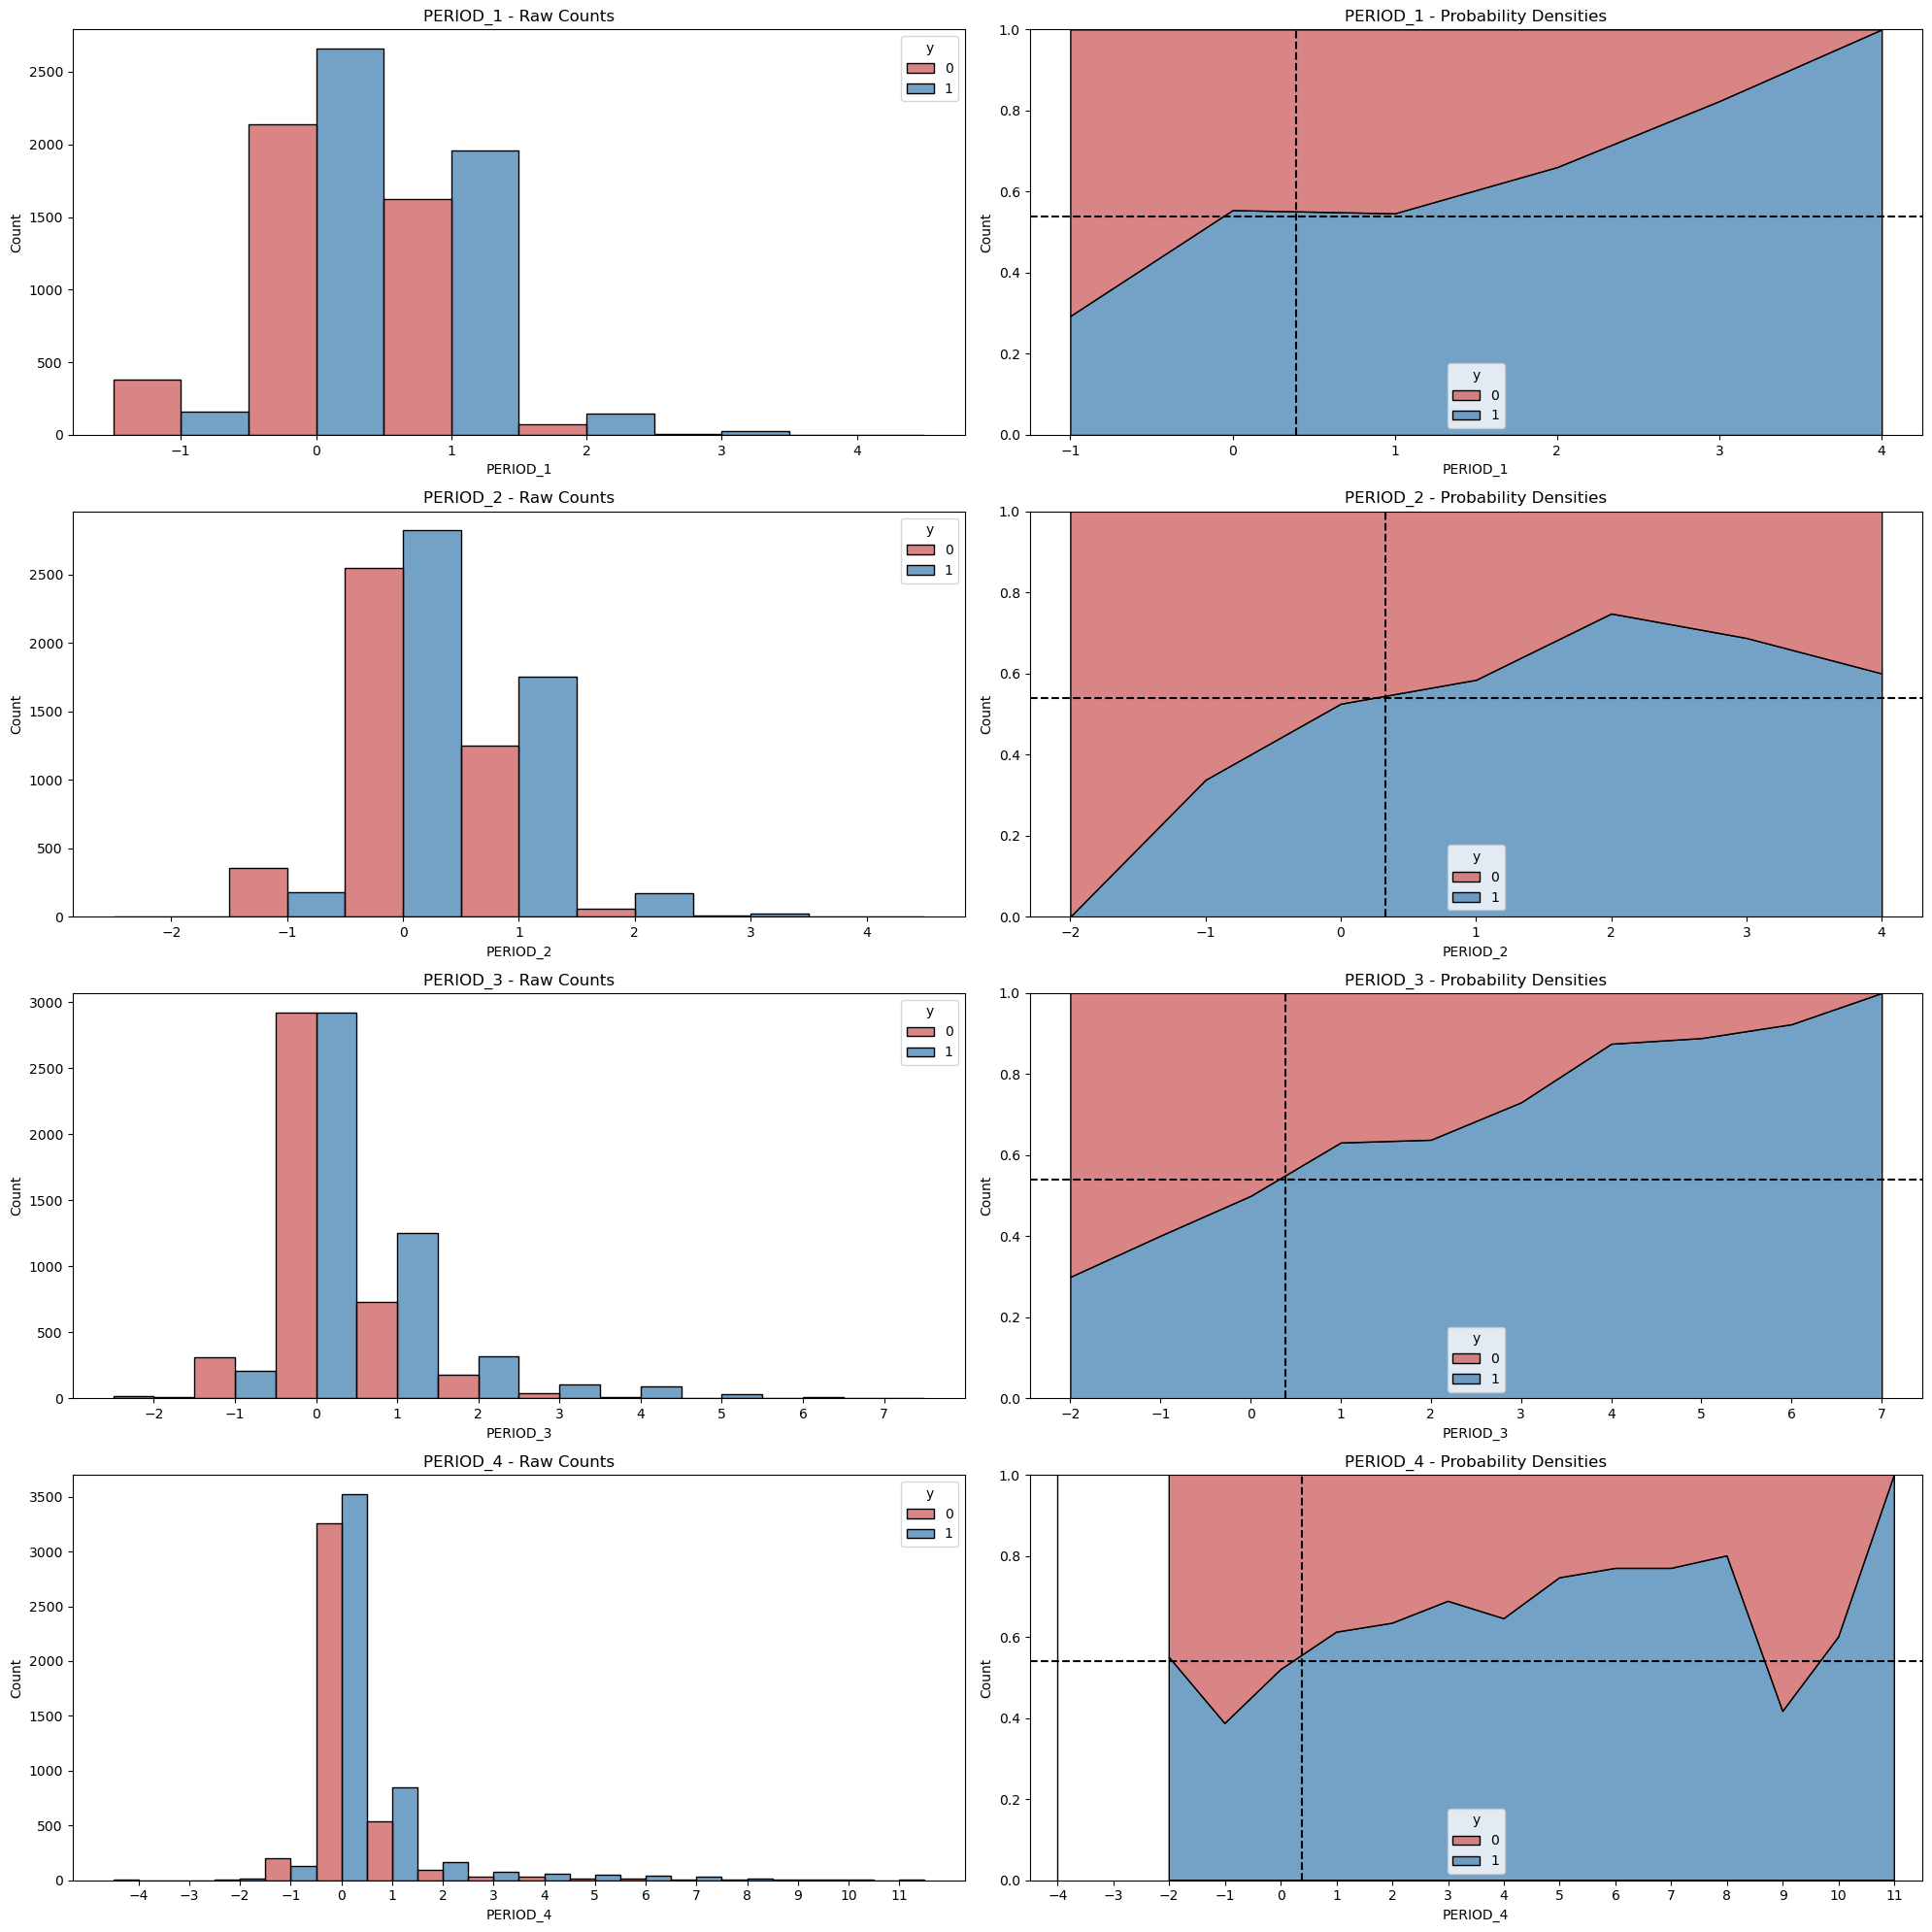

In [70]:
#based on the counts, let's create 4 columns named 'PERIOD_1', 'PERIOD_2', 'PERIOD_3', 'PERIOD_4' that represent the number of courses taken in the first semester, the second semester, the sum of semesters 3 and 4, and the sum of semesters 5 through 8, respectively.
df['PERIOD_1'] = df['SEM_1']
df['PERIOD_2'] = df['SEM_2']
df['PERIOD_3'] = df['SEM_3'] + df['SEM_4']
df['PERIOD_4'] = df['SEM_5'] + df['SEM_6'] + df['SEM_7'] + df['SEM_8']

#Visualize the distribution of the number of courses taken in each period
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Plot the distribution of the number of courses taken in each period
for i, period in enumerate(['PERIOD_1', 'PERIOD_2', 'PERIOD_3', 'PERIOD_4']):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=period, 
                 hue='y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[i, 0], 
                 discrete=True)
    axes[i, 0].set_title(f'{period} - Raw Counts')
    axes[i, 0].set_xticks(range(df[period].min(), df[period].max() + 1))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=period, 
                 hue='y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[i, 1], 
                 discrete=True)
    axes[i, 1].axhline(grad_rate, color='black', linestyle='--')
    axes[i, 1].set_title(f'{period} - Probability Densities')
    axes[i, 1].set_xticks(range(df[period].min(), df[period].max() + 1))
    #draw a vertical line at the mean of the x
    axes[i, 1].axvline(df[period].mean(), color='black', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()


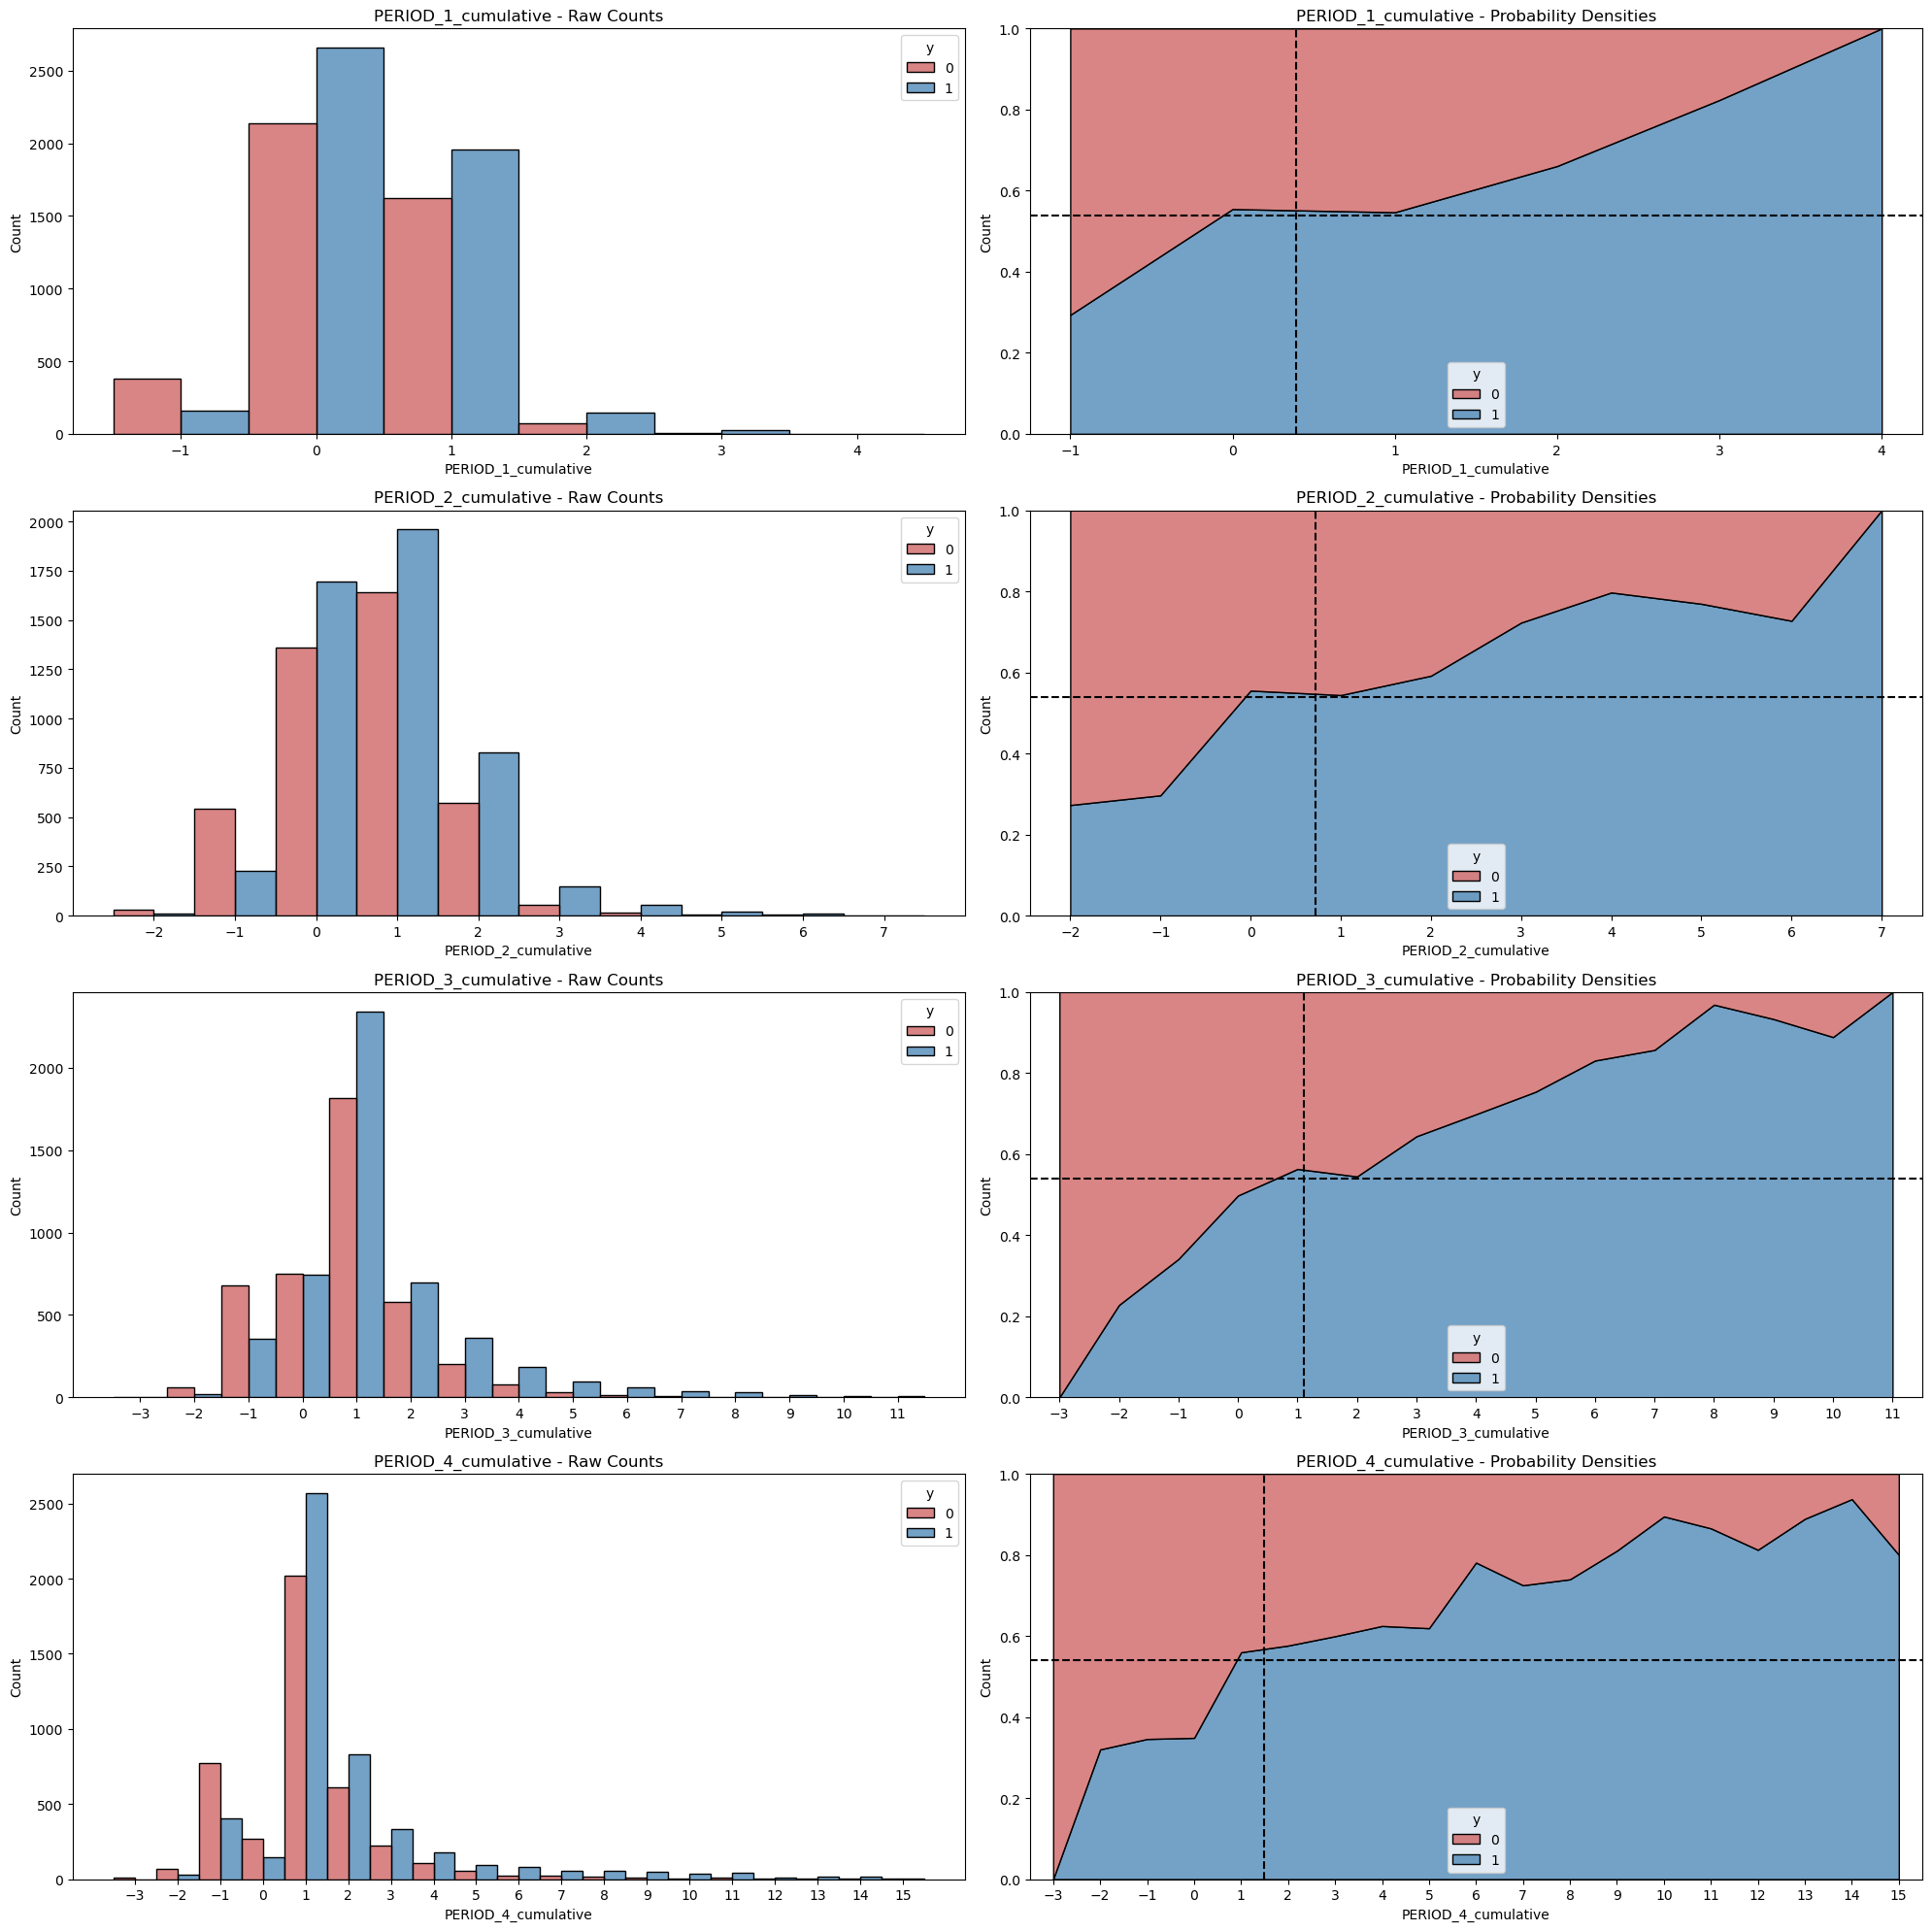

In [71]:
#Add columns for the cumulative counts of courses taken upto each period
df[[f'PERIOD_{i}_cumulative' for i in range(1, 5)]] = df[[f'PERIOD_{i}' for i in range(1, 5)]].cumsum(axis=1)

#dipsplay the columns
df[[f'PERIOD_{i}_cumulative' for i in range(1, 5)]]

#Visualize the distribution of the number of courses taken in each period
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

for i, period in enumerate(['PERIOD_1_cumulative', 'PERIOD_2_cumulative', 'PERIOD_3_cumulative', 'PERIOD_4_cumulative']):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=period, 
                 hue='y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[i, 0], 
                 discrete=True)
    axes[i, 0].set_title(f'{period} - Raw Counts')
    axes[i, 0].set_xticks(range(df[period].min(), df[period].max() + 1))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=period, 
                 hue='y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[i, 1], 
                 discrete=True)
    axes[i, 1].axhline(grad_rate, color='black', linestyle='--')
    axes[i, 1].set_title(f'{period} - Probability Densities')
    axes[i, 1].set_xticks(range(df[period].min(), df[period].max() + 1))
    #draw a vertical line at the mean of the x
    axes[i, 1].axvline(df[period].mean(), color='black', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

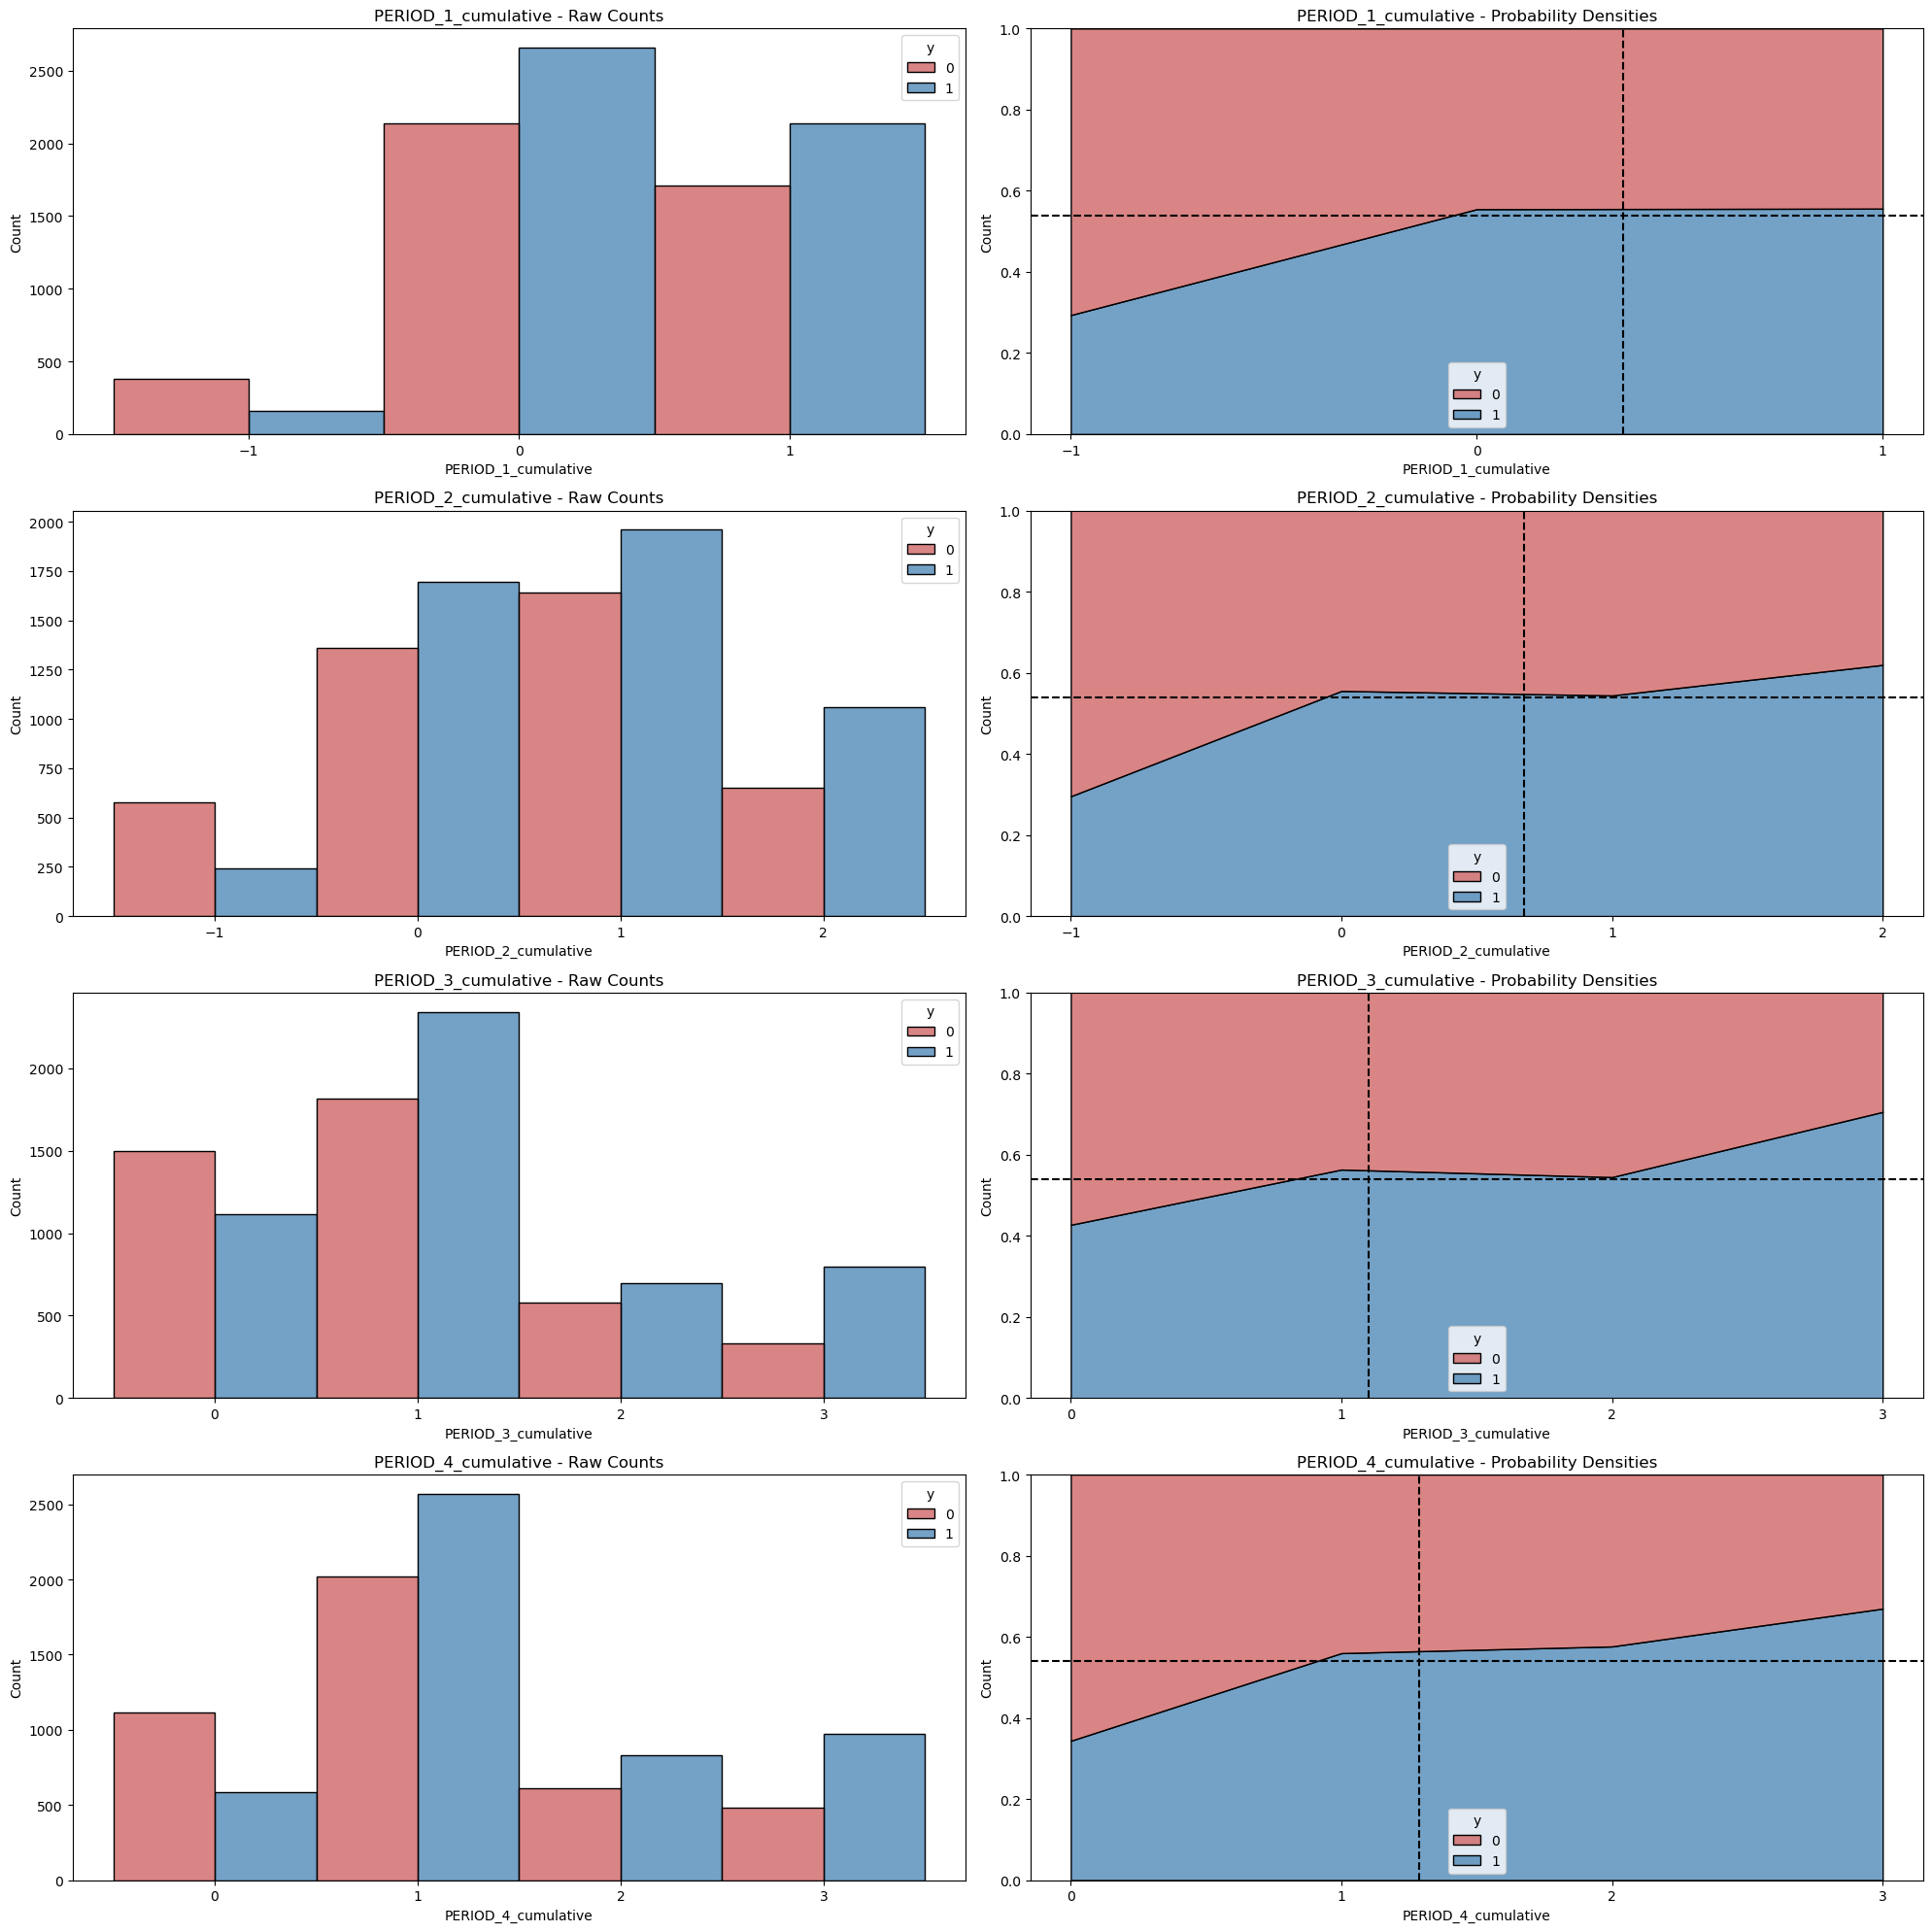

In [72]:
#For our final balancing act, let's replace all values greater than 1 with 2 in the cumulative columns for PERIOD_1 and PERIOD_2, and for the remaining two columns, we will replace all values greater than 2 with 3. 
#Thus, these values represent taking at least 2 and 3 courses uptil that period, respectively.
df['PERIOD_1_cumulative'] = df['PERIOD_1_cumulative'].apply(lambda x: min(x, 1))
df['PERIOD_2_cumulative'] = df['PERIOD_2_cumulative'].apply(lambda x: min(x, 2) if x >= 0 else max(x, -1))
df['PERIOD_3_cumulative'] = df['PERIOD_3_cumulative'].apply(lambda x: min(x, 3) if x > 0 else max(x, 0))
df['PERIOD_4_cumulative'] = df['PERIOD_4_cumulative'].apply(lambda x: min(x, 3) if x > 0 else max(x, 0))

#Visualize the distribution of the number of courses taken in each period
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

for i, period in enumerate(['PERIOD_1_cumulative', 'PERIOD_2_cumulative', 'PERIOD_3_cumulative', 'PERIOD_4_cumulative']):
    # Left subplot: raw counts
    sns.histplot(data=df, 
                 x=period, 
                 hue='y', 
                 multiple='dodge', 
                 palette=palette, 
                 ax=axes[i, 0], 
                 discrete=True)
    axes[i, 0].set_title(f'{period} - Raw Counts')
    axes[i, 0].set_xticks(range(df[period].min(), df[period].max() + 1))
    
    # Right subplot: probability densities
    sns.histplot(data=df, 
                 x=period, 
                 hue='y', 
                 multiple='fill', 
                 element='poly',
                 palette=palette, 
                 ax=axes[i, 1], 
                 discrete=True)
    axes[i, 1].axhline(grad_rate, color='black', linestyle='--')
    axes[i, 1].set_title(f'{period} - Probability Densities')
    axes[i, 1].set_xticks(range(df[period].min(), df[period].max() + 1))
    #draw a vertical line at the mean of the x
    axes[i, 1].axvline(df[period].mean(), color='black', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

It appears that the number of courses taken in each period have more or less the same predictive power, and there is likely a lot of overlap/redundancy.

Moreover, the aboe does not actually take into account how a single student's math-course-passing behavior changes over the semesters/periods.

To remedy this issue, let's compute a regression line for each student using the number of courses they took up to each semester. (Note: we're using semesters instead of periods to (hopefully) get a more smoothed out continuous distribution of values for the parameters of the linear regression).

In [74]:
# Fit a linear regression for each student

slopes = []
intercepts = []

for j in range(len(df)):
    line_fit = np.polyfit(x=range(1, 9), 
                              y=df.loc[j, [f'SEM_{k}_cumulative' for k in range(1, 9)]], 
                              deg=1)
    slopes.append(line_fit[0])
    intercepts.append(line_fit[1])
#add columns to df for the slope and intercept of the line fit
df[f'slope'] = slopes
df[f'intercept'] = intercepts

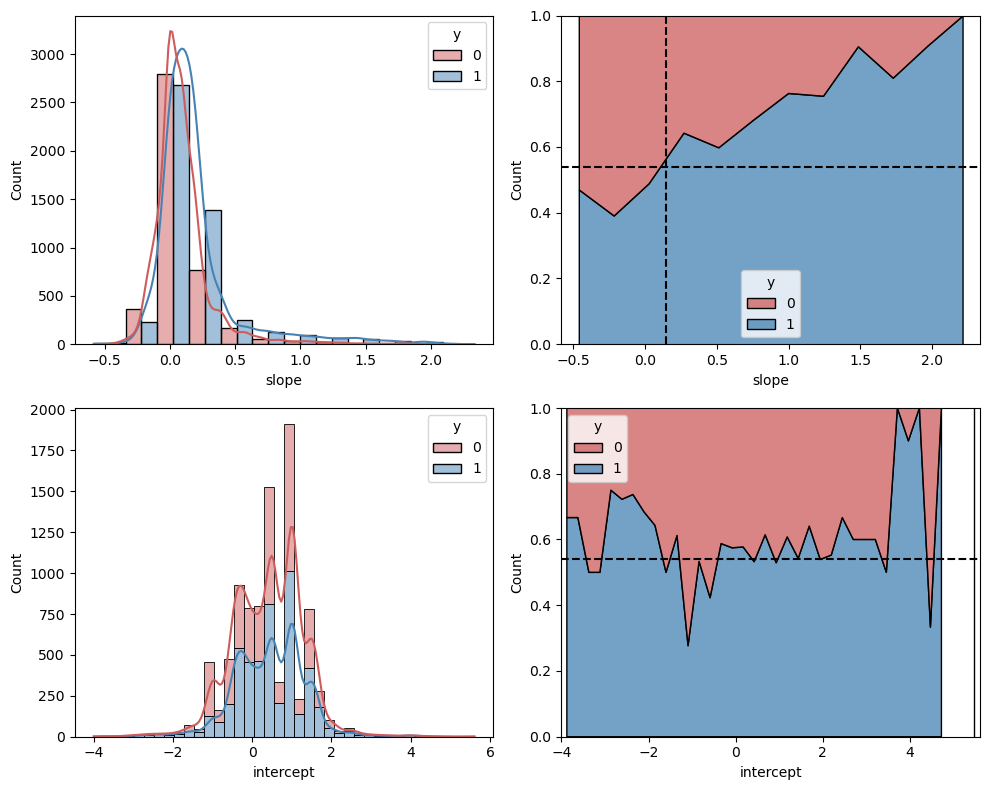

In [75]:
#individually plot the distribution of the slope and intercept, colored by y. Put them both in the same row of a plot.
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# Top-left subplot: slope raw counts
sns.histplot(data=df, 
             x='slope', 
             hue='y', 
             multiple='dodge', 
             palette=palette, 
             binwidth=0.25,
             kde=True,
             ax=axes[0, 0])
# axes[0, 0].set_title('Slope - Raw Counts')

# Top-right subplot: slope probability densities
sns.histplot(data=df, 
             x='slope', 
             hue='y', 
             multiple='fill', 
             element='poly',
             palette=palette, 
             binwidth=0.25,
             ax=axes[0, 1])
axes[0, 1].axhline(grad_rate, color='black', linestyle='--')
#Draw a verticle line at the mean of the x
axes[0, 1].axvline(df['slope'].mean(), color='black', linestyle='--')
# axes[0, 1].set_title('Slope - Probability Densities')

# Bottom-left subplot: intercept raw counts
sns.histplot(data=df, 
             x='intercept', 
             hue='y', 
             multiple='stack',
             kde=True, 
             palette=palette, 
             binwidth=0.25,
             ax=axes[1, 0])
# axes[1, 0].set_title('Intercept - Raw Counts')

# Bottom-right subplot: intercept probability densities
sns.histplot(data=df, 
             x='intercept', 
             hue='y', 
             multiple='fill', 
             element='poly',
             palette=palette, 
             binwidth=0.25,
             ax=axes[1, 1])
axes[1, 1].axhline(grad_rate, color='black', linestyle='--')
# axes[1, 1].set_title('Intercept - Probability Densities')

# Adjust layout
plt.tight_layout()
plt.show()

It is clear that the intercept does not say much about the probability of $y=1$. On the other hand, the mean value of the slope (which is where the vertical line is located) agains seems to pick out the split point for whether $\textup{Pr}(y=1)>\textup{Pr}(y=0)$. Let's examine what happens when we look at cumulative histograms.

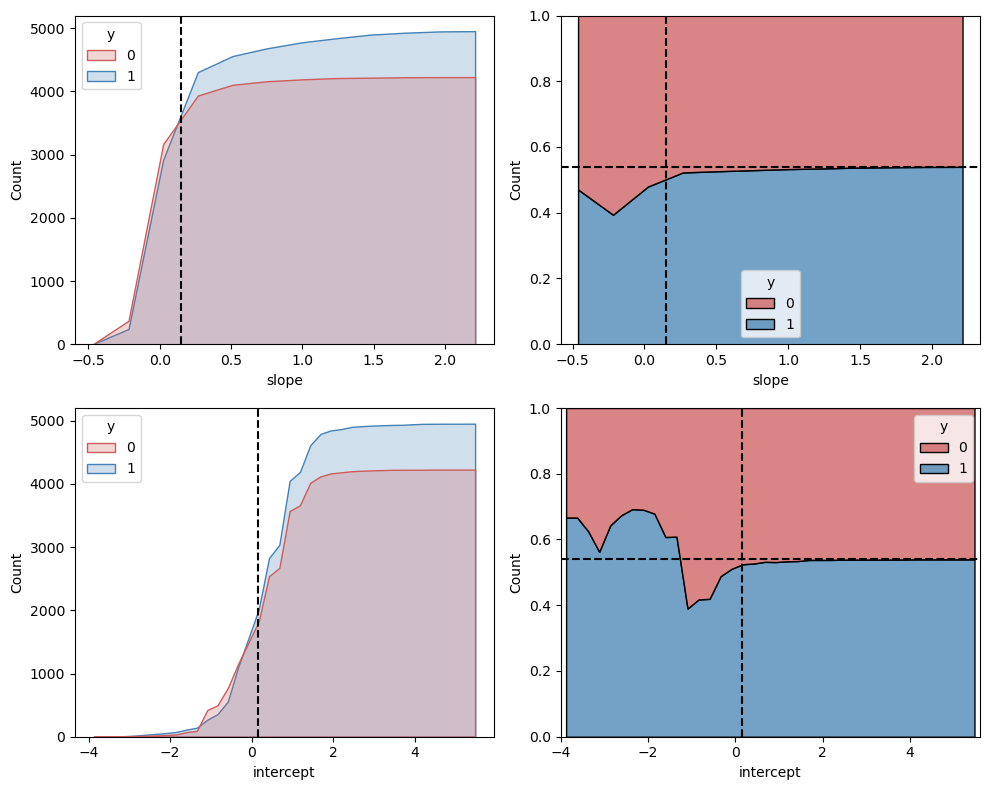

In [76]:
#individually plot the distribution of the slope and intercept, colored by y. Put them both in the same row of a plot.
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# Top-left subplot: slope cumulative counts
sns.histplot(data=df, 
             x='slope', 
             hue='y', 
             multiple='layer', 
             element='poly',
             palette=palette, 
             binwidth=0.25,
             cumulative=True,
             ax=axes[0, 0])
#Draw a verticle line at the mean of the x
axes[0, 0].axvline(df['slope'].mean(), color='black', linestyle='--')
# axes[0, 0].set_title('Slope - Cumulative Counts')

# Top-right subplot: slope cumulative probability densities
sns.histplot(data=df, 
             x='slope', 
             hue='y', 
             multiple='fill', 
             element='poly',
             palette=palette, 
             binwidth=0.25,
             cumulative=True,
             ax=axes[0, 1])
axes[0, 1].axhline(grad_rate, color='black', linestyle='--')
#Draw a vertical line at the mean of the x
axes[0, 1].axvline(df['slope'].mean(), color='black', linestyle='--')

# axes[0, 1].set_title('Slope - Cumulative Probability Densities')

# Bottom-left subplot: intercept cumulative counts
sns.histplot(data=df, 
             x='intercept', 
             hue='y', 
             multiple='layer',
             element='poly',
             palette=palette, 
             binwidth=0.25,
             cumulative=True,
             ax=axes[1, 0])
#Draw a verticle line at the mean of the x
axes[1, 0].axvline(df['slope'].mean(), color='black', linestyle='--')
# axes[1, 0].set_title('Intercept - Cumulative Counts')

# Bottom-right subplot: intercept cumulative probability densities
sns.histplot(data=df, 
             x='intercept', 
             hue='y', 
             multiple='fill', 
             element='poly',
             palette=palette, 
             binwidth=0.25,
             cumulative=True,
             ax=axes[1, 1])
axes[1, 1].axhline(grad_rate, color='black', linestyle='--')
#Draw a verticle line at the mean of the x
axes[1, 1].axvline(df['slope'].mean(), color='black', linestyle='--')
# axes[1, 1].set_title('Intercept - Cumulative Probability Densities')

# Adjust layout
plt.tight_layout()
plt.show()

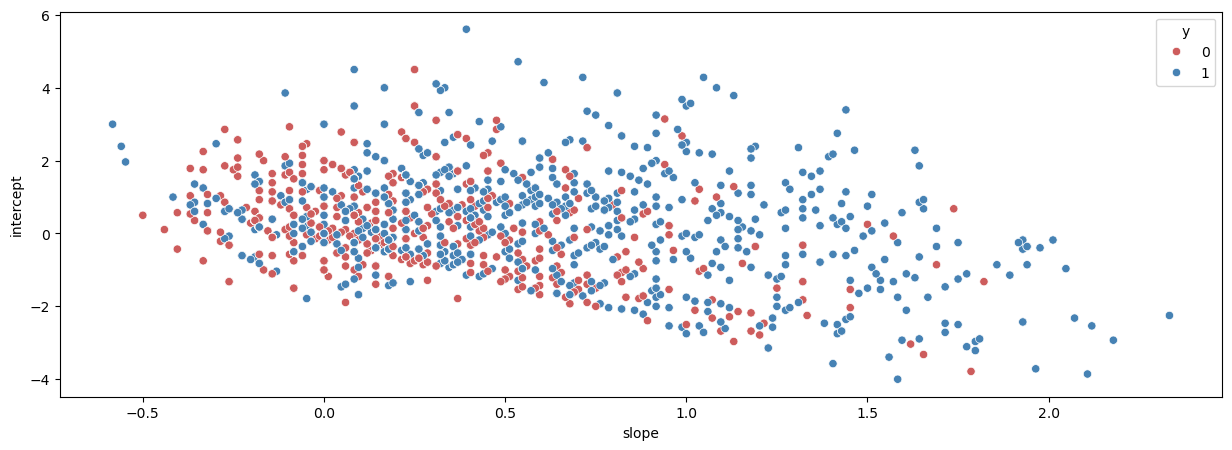

In [31]:
#visualize the joint distribution of the slope and intercept using a scatter plot
#color the points based on the target variable y

plt.figure(figsize=(15, 5))  # Adjust the width and height as needed
sns.scatterplot(data=df, x='slope', y='intercept', hue='y', palette=palette)
plt.show()

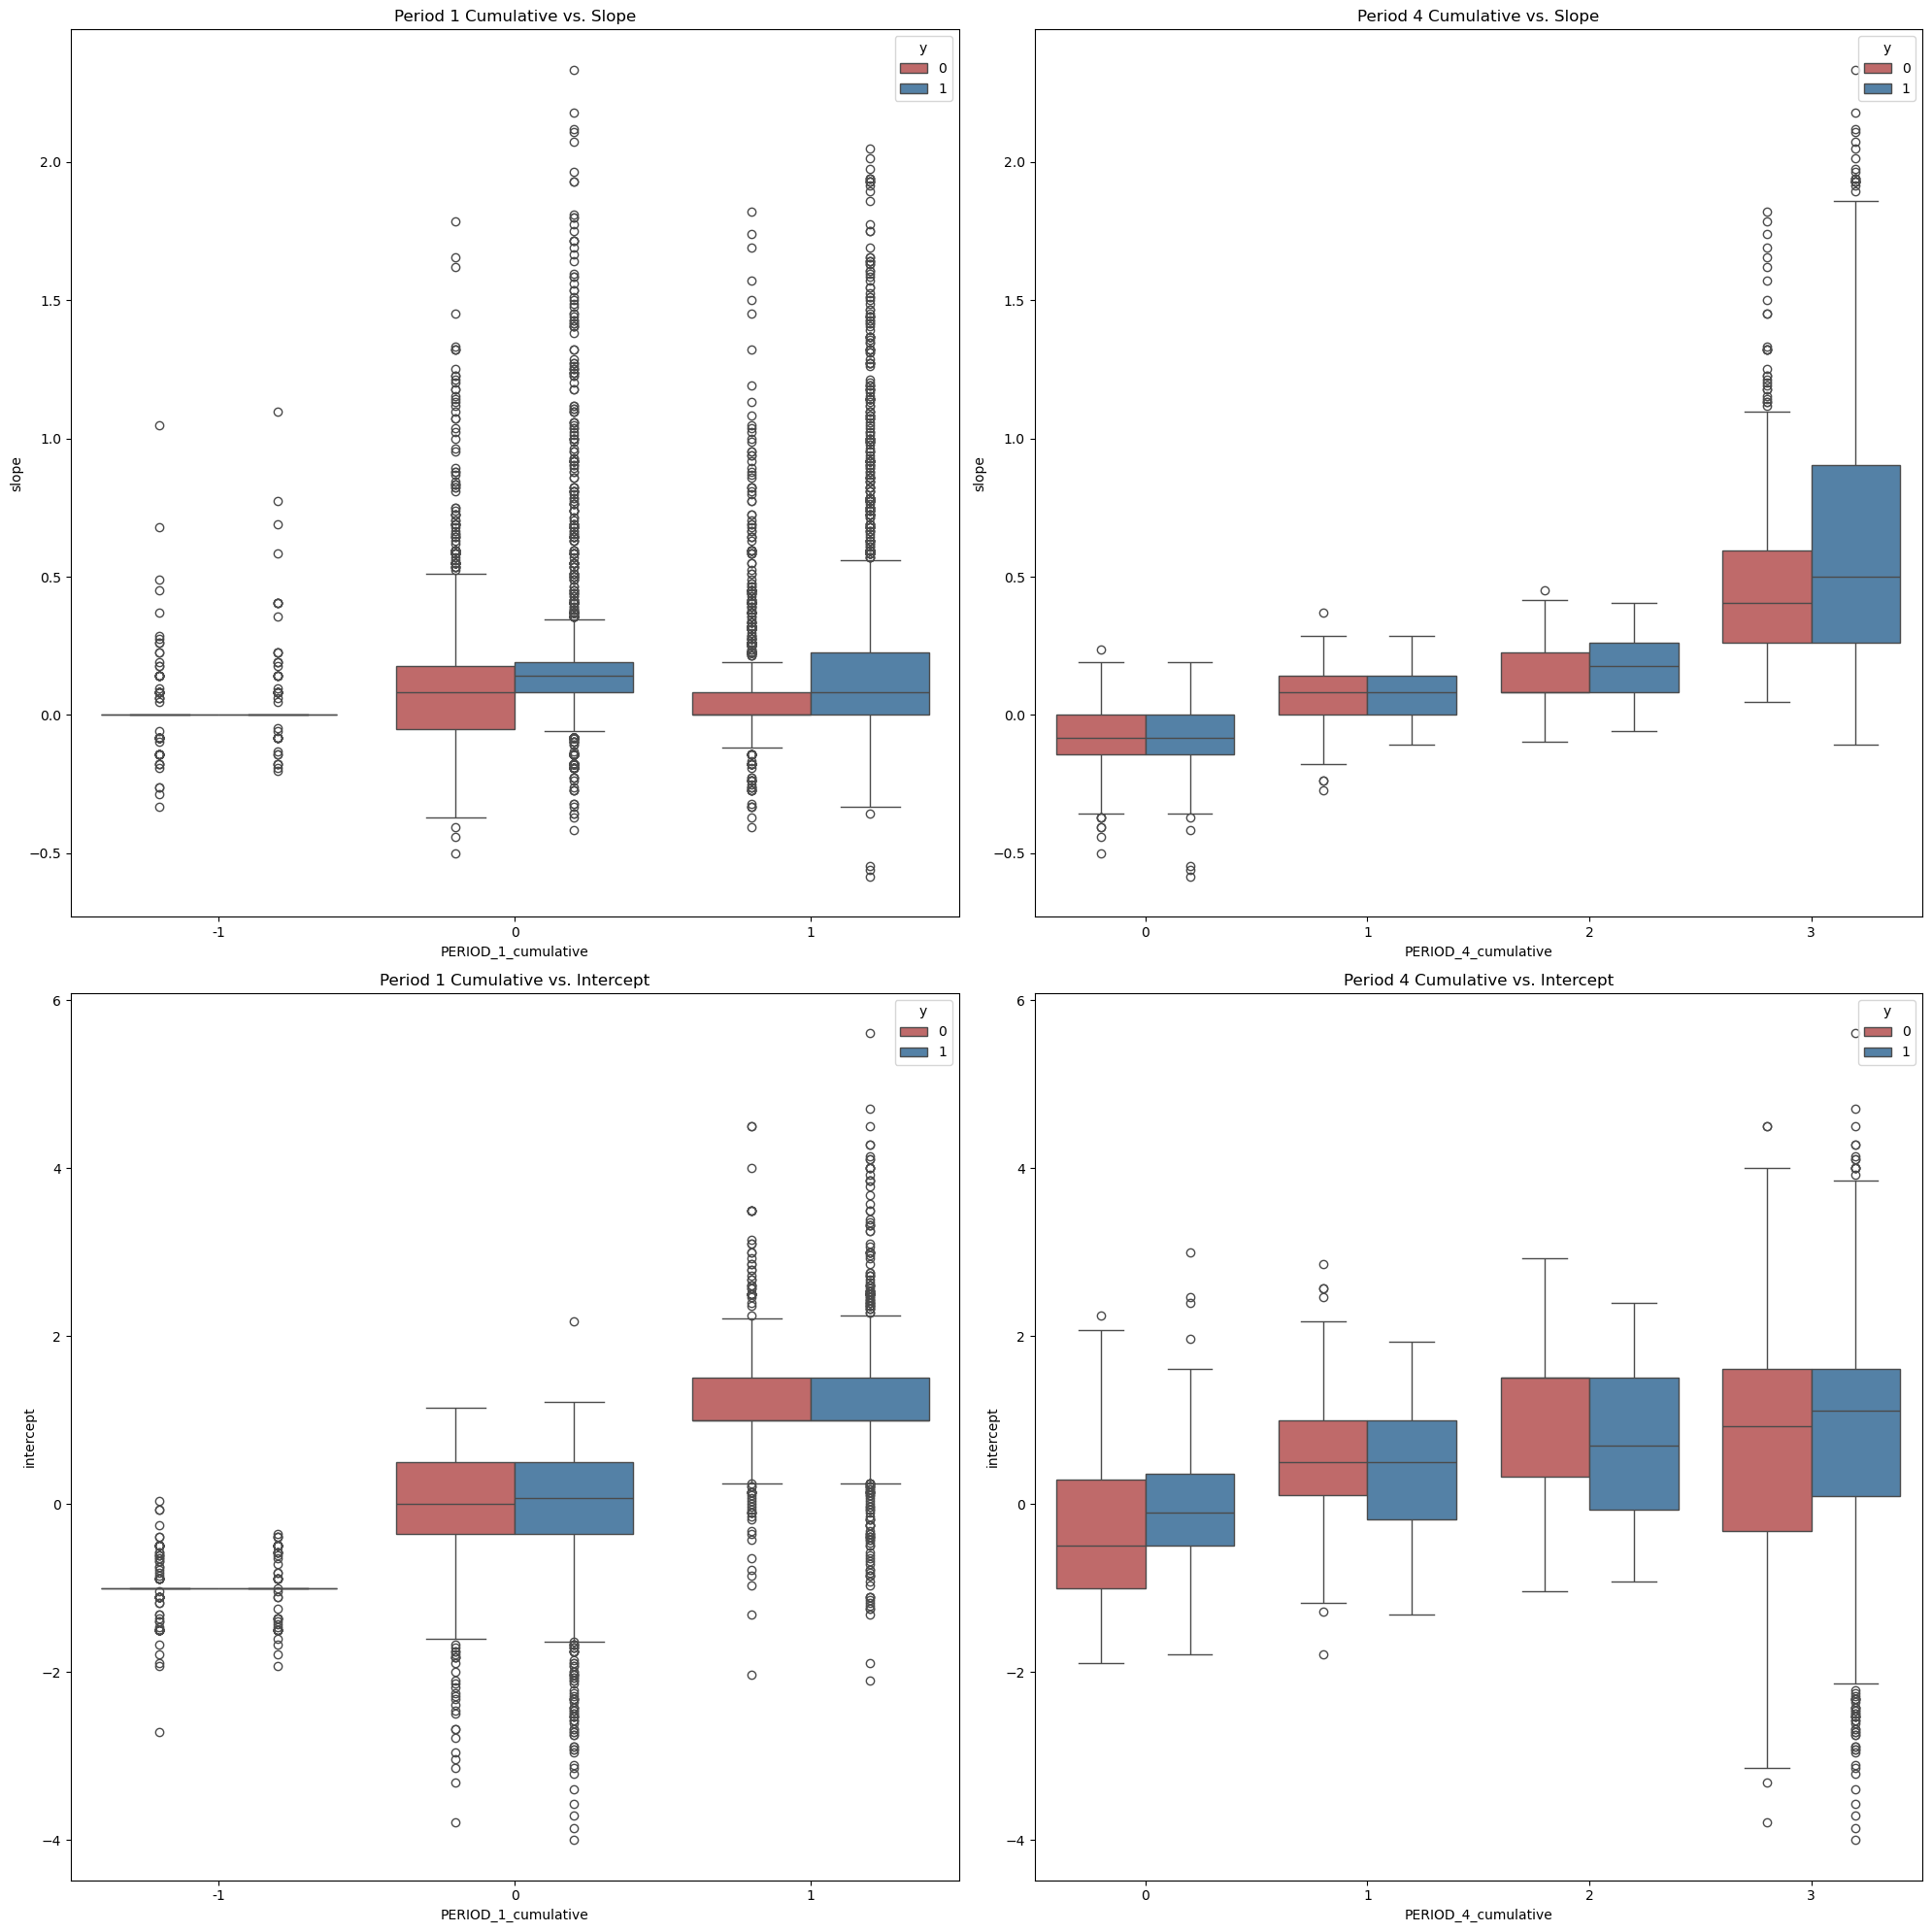

In [16]:
# Create 4 subplots in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plot the joint distribution of period_1_cumulative with slope
sns.boxplot(data=df, x='PERIOD_1_cumulative', y='slope', hue='y', palette=palette, ax=axes[0, 0], dodge=True)
axes[0, 0].set_title('Period 1 Cumulative vs. Slope')

# Plot the joint distribution of period_4_cumulative with slope
sns.boxplot(data=df, x='PERIOD_4_cumulative', y='slope', hue='y', palette=palette, ax=axes[0, 1], dodge=True)
axes[0, 1].set_title('Period 4 Cumulative vs. Slope')

# Plot the joint distribution of period_1_cumulative with intercept
sns.boxplot(data=df, x='PERIOD_1_cumulative', y='intercept', hue='y', palette=palette, ax=axes[1, 0], dodge=True)
axes[1, 0].set_title('Period 1 Cumulative vs. Intercept')

# Plot the joint distribution of period_4_cumulative with intercept
sns.boxplot(data=df, x='PERIOD_4_cumulative', y='intercept', hue='y', palette=palette, ax=axes[1, 1], dodge=True)
axes[1, 1].set_title('Period 4 Cumulative vs. Intercept')

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
crse_dict = {
                '104': 'INTRO TO PROBABILTY',
                '105': 'INTRO TO MATH IDEA',
                '140': 'COLLEGE ALGEBRA',
                '143': 'PREP FOR CALCULUS',
                '145': 'APPLD TRIGONOMETR',
                '150': 'DISC MATH BUS&SOC S',
                '151': 'BUS & SOC SCI CALC',
                '160': 'SURVEY OF CALCULUS',
                '165': 'CALCULUS I',
                '166': 'CALCULUS II',
                '207': 'MATRCES&LINEAR ALGB',
                '265': 'CALCULUS III',
                '266': 'ELEM DIFF EQUATNS',
                '267': 'DIFF EQ & TRANSFMS',
                '101': 'ORIENTATION IN MATH',
                '201': 'INTRO TO PROOFS',
                '240': 'INVESTM&CREDIT MATH',
                '301': 'ABSTRACT ALGEBRA I',
                '302': 'ABSTRCT ALGEBRA II',
                '304': 'COMBINATORICS',
                '314': 'GRAPH THEORY',
                '317': 'THRY LINEAR ALGEBRA',
                '350': 'NUMBER THEORY',
                '341': 'INTR THY PROBAB&S I',
                '342': 'INTR THY PR&STAT II',
                '365': 'COMPLEX VARIABLES',
                '373': 'INTR SCIENTF CMPTNG',
                '385': 'INTR PART DIFF EQUA',
                '397': 'IV MATH TCH SECDY',
                '414': 'ANALYSIS I',
                '415': 'ANALYSIS II',
                '435': 'GEOMETRY I',
                '436': 'GEOMETRY II',
                '497': 'TEACH SEC SCHL MATH'
            }

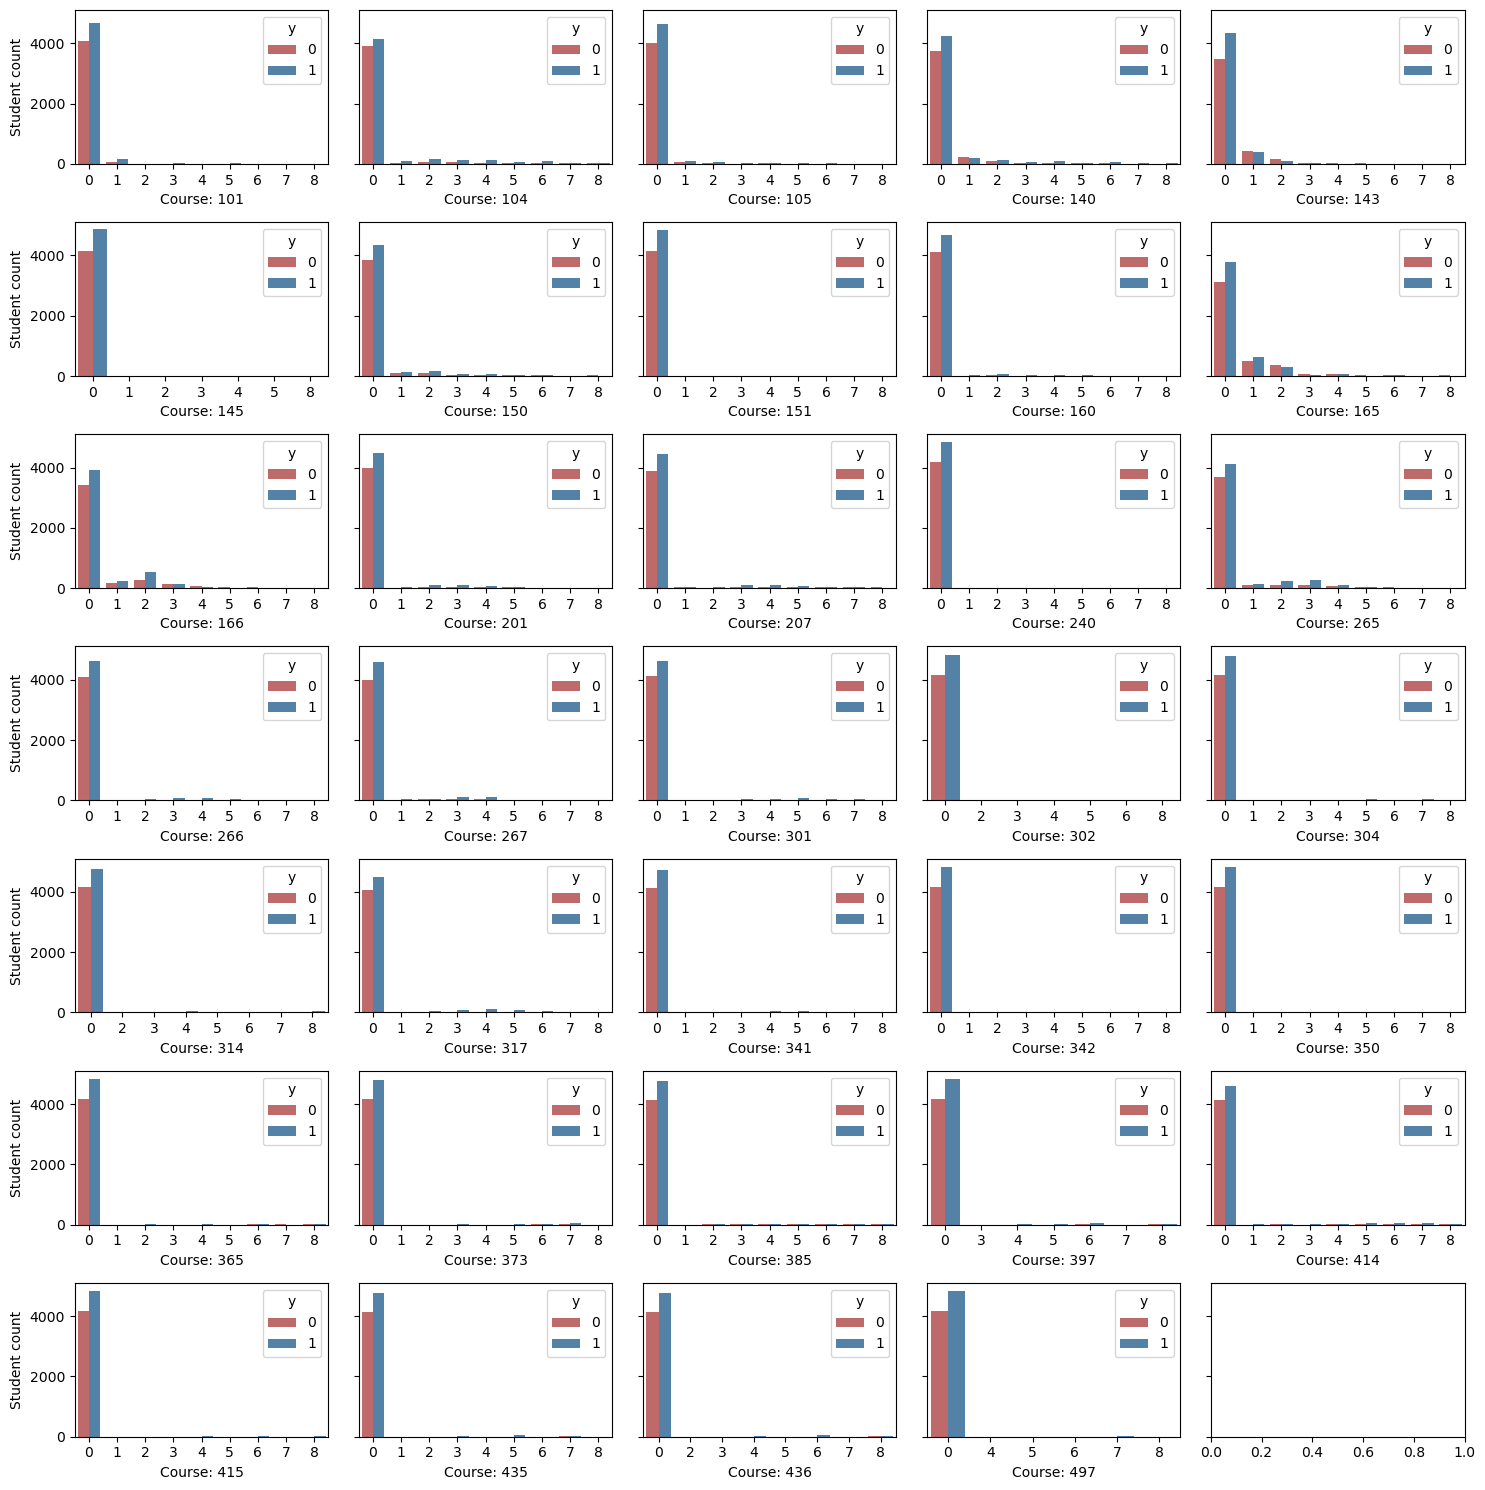

In [45]:
#I want to visualize the distribution of the target variable among the 3 possible values of each course.
#For each course, I will create a bar plot that shows the distribution of the target variable among the 3 possible values.
#I will use the seaborn library to create the bar plots.
#I will color the bars based on the value of the target variable, using a nice palette of colors.

# Create a figure and axes with shared y-axis
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(15, 15), sharey=True)
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, x in enumerate(courses):
    sns.countplot(x=df[x].clip(lower=0), #treat failing grades as not taking the course 
                  hue=y, 
                  palette=palette, 
                  ax=axes[i])
    axes[i].set_xlabel('Course: '+x)
    axes[i].set_ylabel('Student count')
    # axes[i].set_xticks(range(0, df[courses].max + 1))
    
# Adjust layout
plt.tight_layout()
plt.show()

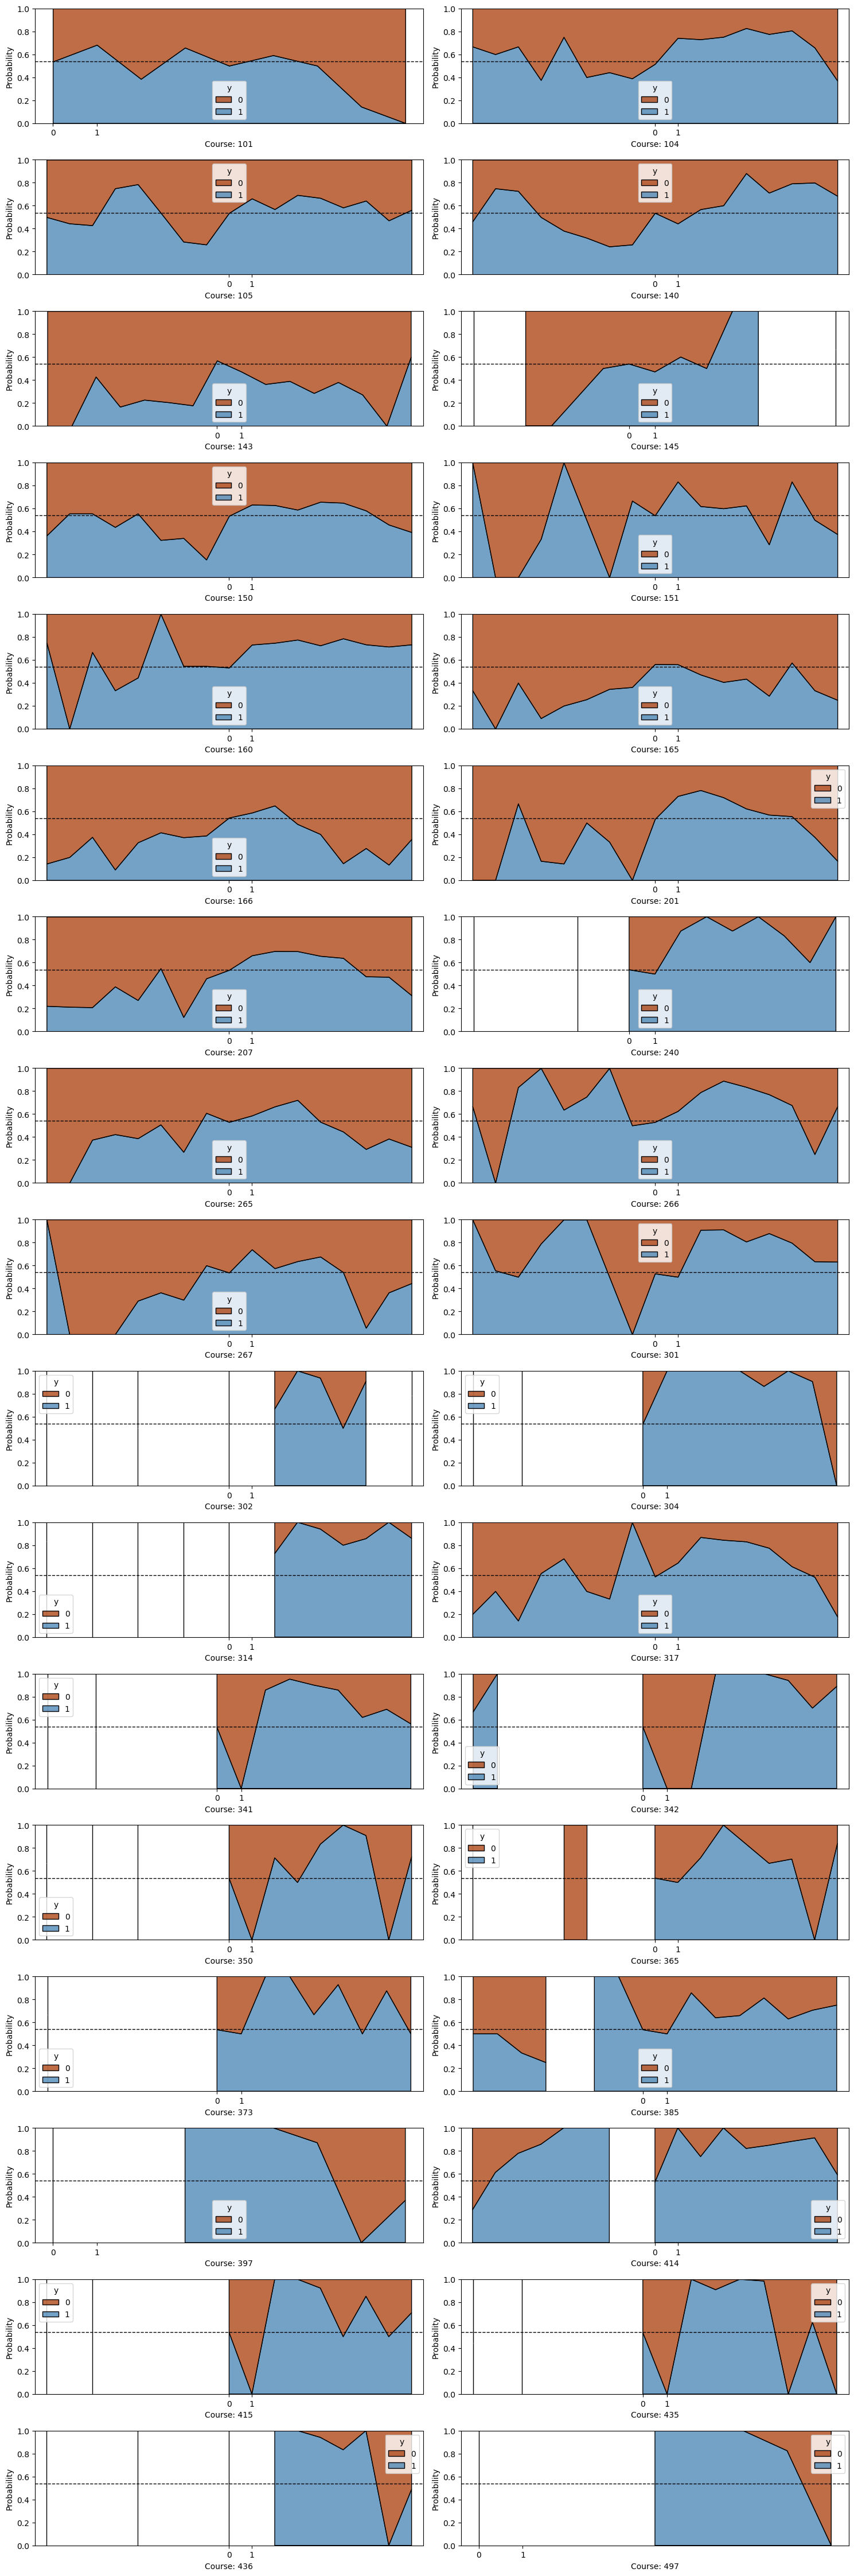

In [47]:
#For each course, I will create a bar plot that shows the distribution of the target variable among the 3 possible values. 

# Set the color palette
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=17, ncols=2, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, course in enumerate(courses):
    sns.histplot(x=df[course], 
                 element='poly', #this will create a histogram with a line connecting the top of the bars
                 multiple='fill', #this will normalize the counts in each bin to sum to 1; thus, the y-axis will show the probability of y=0 or 1 for that value of the feature
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Course: '+course)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks([0, 1])
    #draw a horizontal line at y=0.5
    axes[i].axhline(y.mean(), color='black', linestyle='--', linewidth=1, label='Overall grad rate')

# Adjust layout
plt.tight_layout()
plt.show()

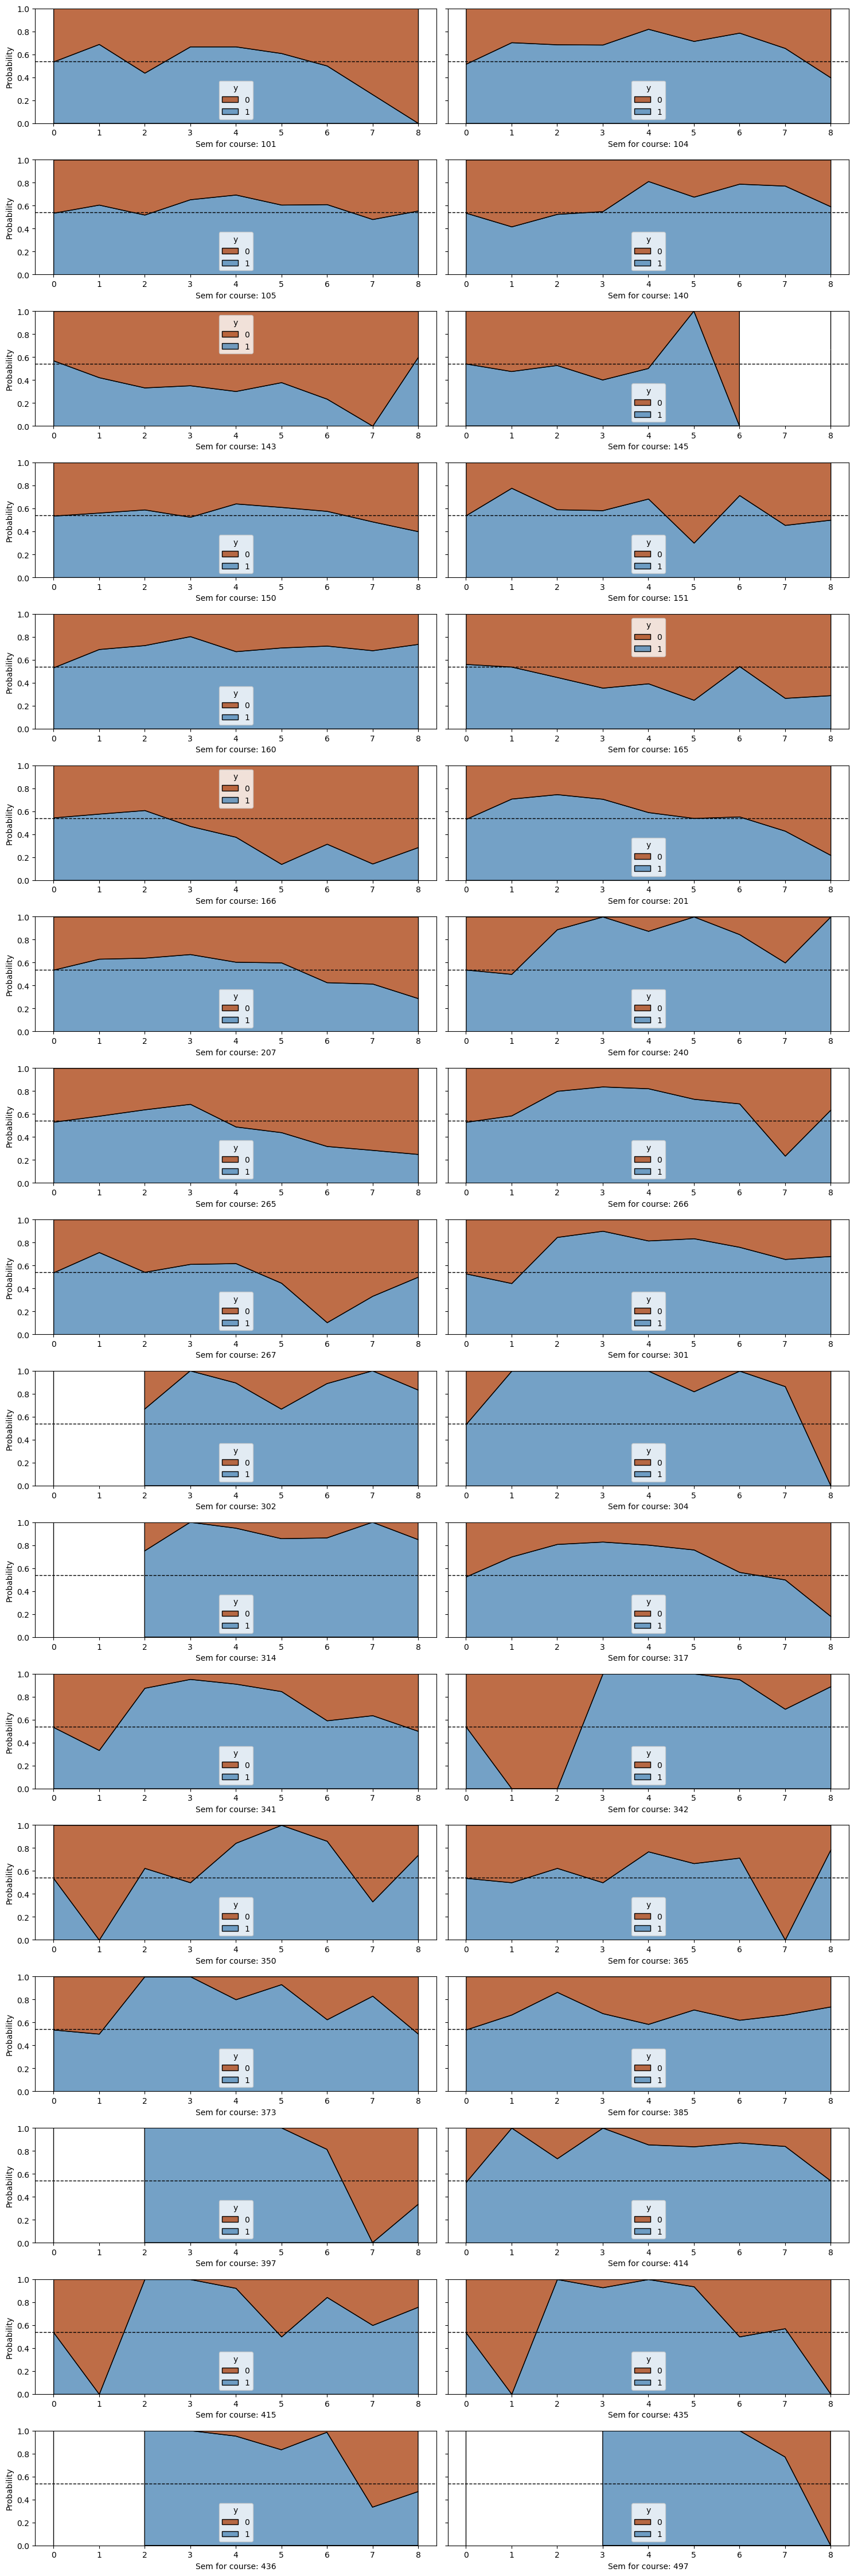

In [ ]:
#For each course, I will create a bar plot that shows the distribution of the target variable among the 9 possible values of f'{x}_SEM' 

# Set the color palette
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=17, ncols=2, figsize=(15, 45),sharey=True)
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, x in enumerate(courses):
    sns.histplot(x=X_SEM[f'{x}_SEM'], 
                 element='poly',
                 multiple='fill', #this will normalize the counts in each bin to sum to 1; thus, the y-axis will show the probability of y=0 or 1 for that value of the feature
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Sem for course: '+ x)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(list(range(0,9)))
    #draw a horizontal line at y=0.5
    axes[i].axhline(y.mean(), color='black', linestyle='--', linewidth=1, label='Overall grad rate')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#For each i in range(1,9) (the semester) and each student, I want to count the number of courses taken in semester i. I want to create one column for each i containing this count. I will add these columns to the dataset df

#loop over the semesters
for i in range(1,9):
    #create a list of columns for the courses taken in semester i
    df[f'SEM_{i}'] = X_SEM.apply(lambda x: sum(x == i), axis=1)

sems = df[[f'SEM_{i}' for i in range(1,9)]]


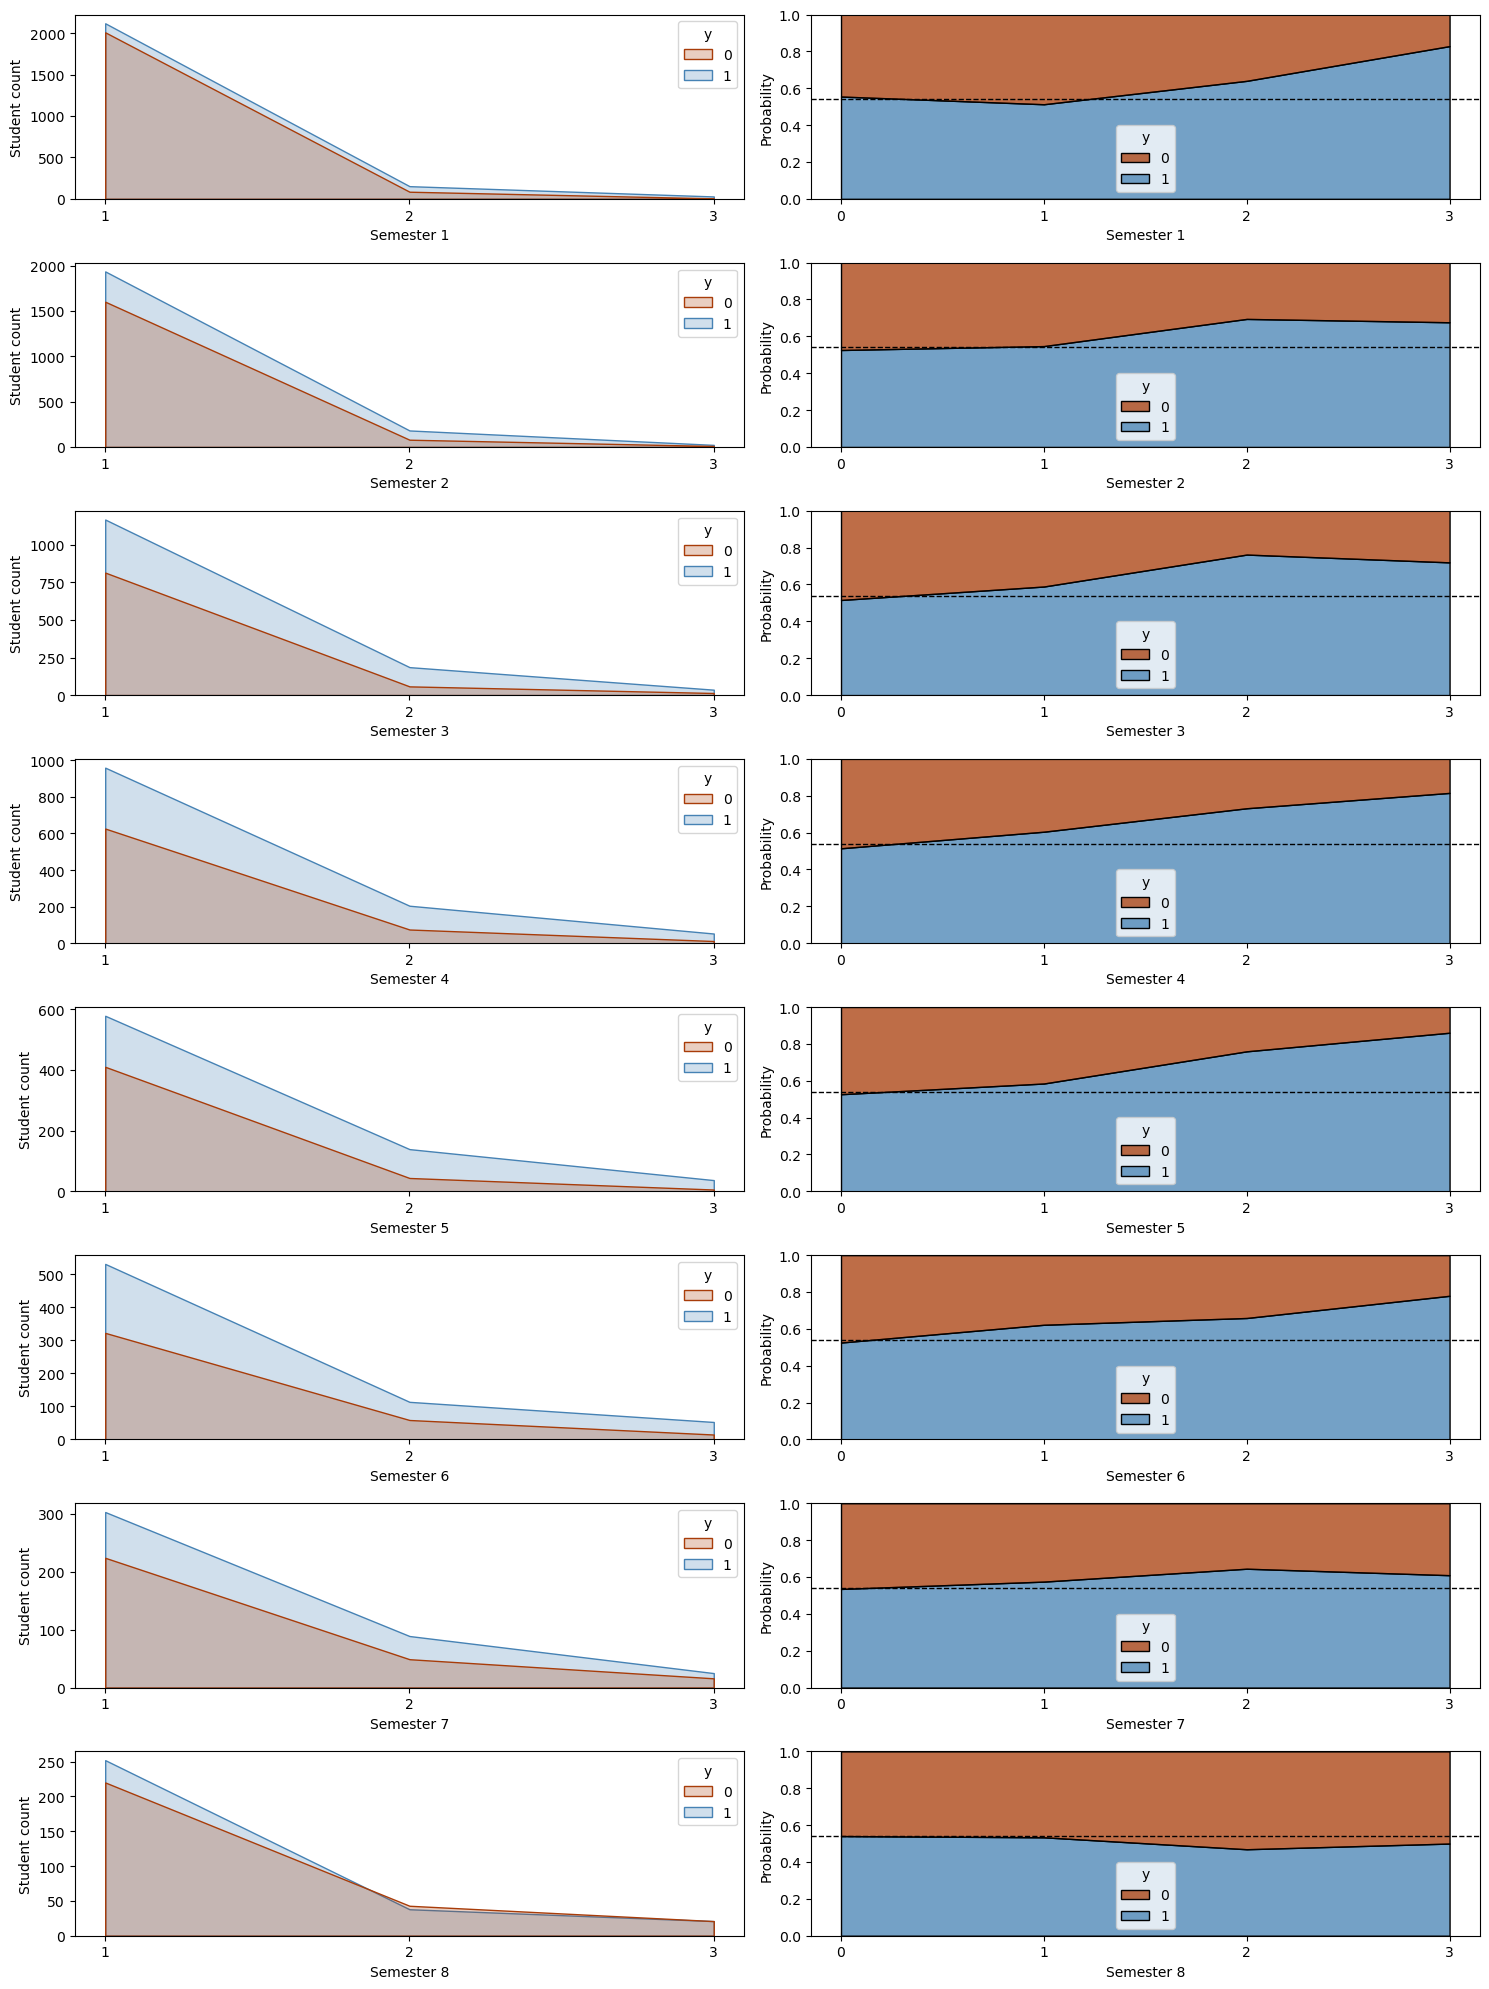

In [ ]:
#plot the distribution of the number of courses taken in each semester
# Set the color palette
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 20))
# axes = axes.flatten()

# Plot the distribution of the target variable for each course
# In each row, on the left-side plot the raw counts, on the right-side plot the normalized counts using multiple='fill'
for i in range(1,9):
    #first, plot the raw counts
    sns.histplot(x=sems[f'SEM_{i}'][sems[f'SEM_{i}'].isin([1, 2, 3])], 
                 element='poly',
                 multiple='layer', #this will plot the counts for y=0 and y=1 side-by-side
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i-1,0])
    axes[i-1][0].set_xlabel(f'Semester {i}')
    axes[i-1][0].set_ylabel('Student count')
    axes[i-1][0].set_xticks([1,2,3])

    #next, plot the normalized counts
    sns.histplot(x=sems[f'SEM_{i}'][sems[f'SEM_{i}'].isin([0,1, 2, 3])], 
                 element='poly',
                 multiple='fill', #this will normalize the counts in each bin to sum to 1; thus, the y-axis will show the probability of y=0 or 1 for that value of the feature
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i-1,1])
    axes[i-1][1].set_xlabel(f'Semester {i}')
    axes[i-1][1].set_ylabel('Probability')
    axes[i-1][1].set_xticks([0,1,2,3])

    #draw a horizontal line at y=grad_rate
    axes[i-1][1].axhline(grad_rate, color='black', linestyle='--', linewidth=1, label='Overall grad rate')

# Adjust layout
plt.tight_layout()
plt.show()

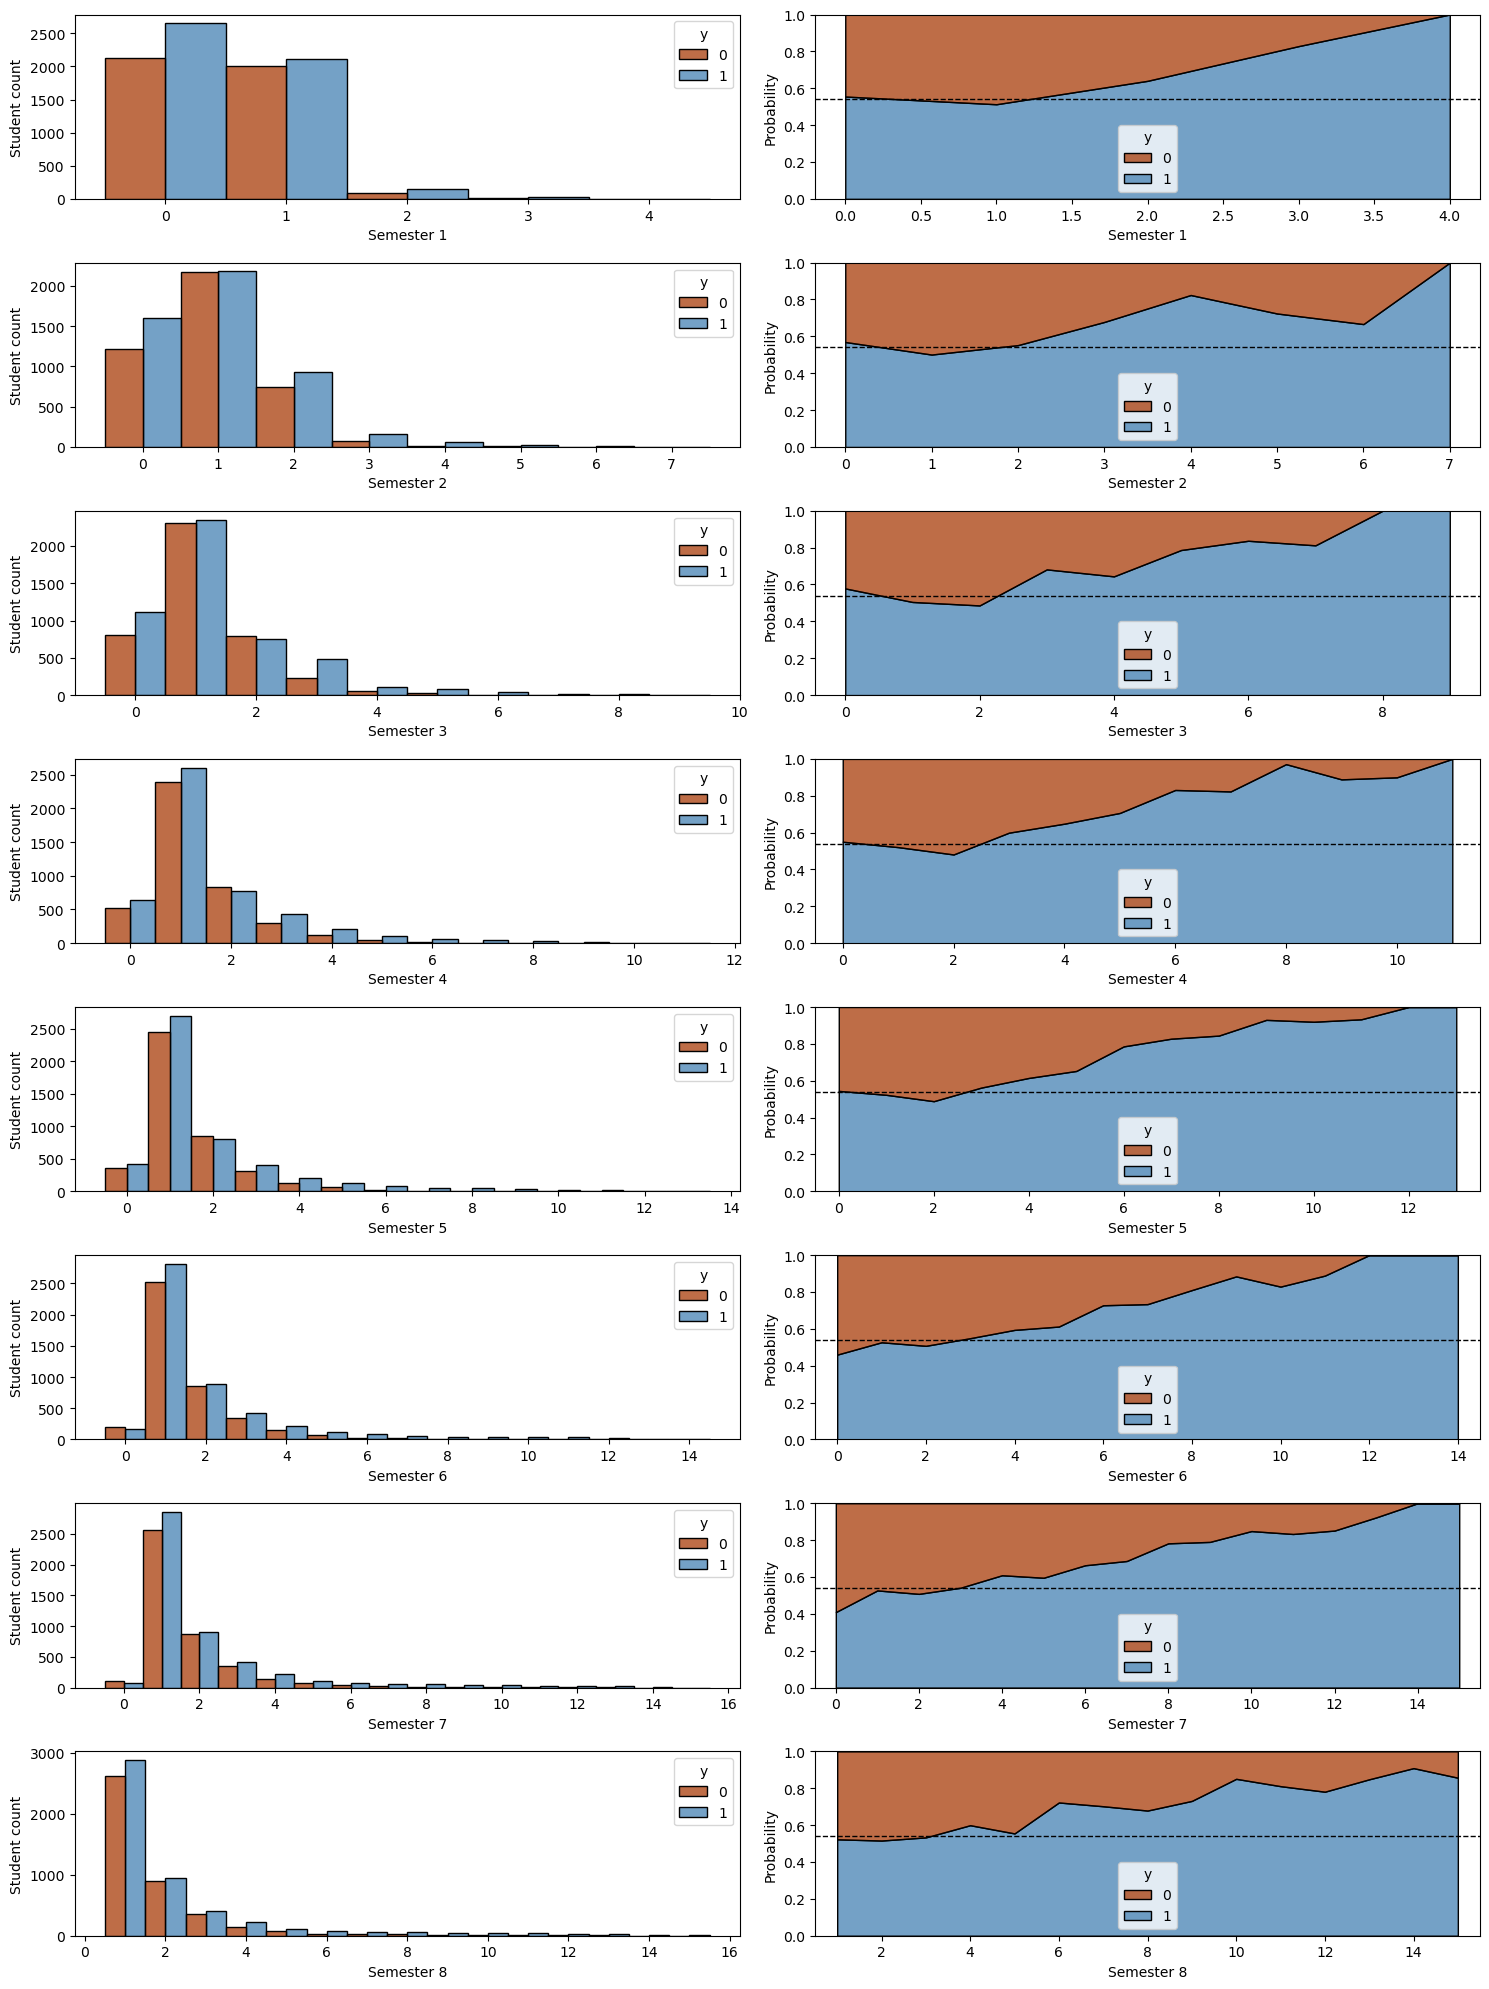

In [ ]:
sems_cumulative = sems.cumsum(axis=1)
#plot the distribution of the cumulative sum of the number of courses taken in each semester

# Create a figure and axes
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 20))
# axes = axes.flatten()

# Plot the distribution of the target variable for each course
# In each row, on the left-side plot the raw counts, on the right-side plot the normalized counts using multiple='fill'
for i in range(1,9):
    #first, plot the raw counts
    sns.histplot(x=sems_cumulative[f'SEM_{i}'],
                 element='bars',
                 multiple='dodge', #this will plot the counts for y=0 and y=1 side-by-side
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i-1,0])
    axes[i-1][0].set_xlabel(f'Semester {i}')
    axes[i-1][0].set_ylabel('Student count')
    # axes[i-1][0].set_xticks([1,2,3])

    #next, plot the normalized counts
    sns.histplot(x=sems_cumulative[f'SEM_{i}'],
                 element='poly',
                 multiple='fill', #this will normalize the counts in each bin to sum to 1; thus, the y-axis will show the probability of y=0 or 1 for that value of the feature
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i-1,1])
    axes[i-1][1].set_xlabel(f'Semester {i}')
    axes[i-1][1].set_ylabel('Probability')
    # axes[i-1][1].set_xticks([0,1,2,3])

    #draw a horizontal line at y=grad_rate
    axes[i-1][1].axhline(grad_rate, color='black', linestyle='--', linewidth=1, label='Overall grad rate')

# Adjust layout
plt.tight_layout()
plt.show()

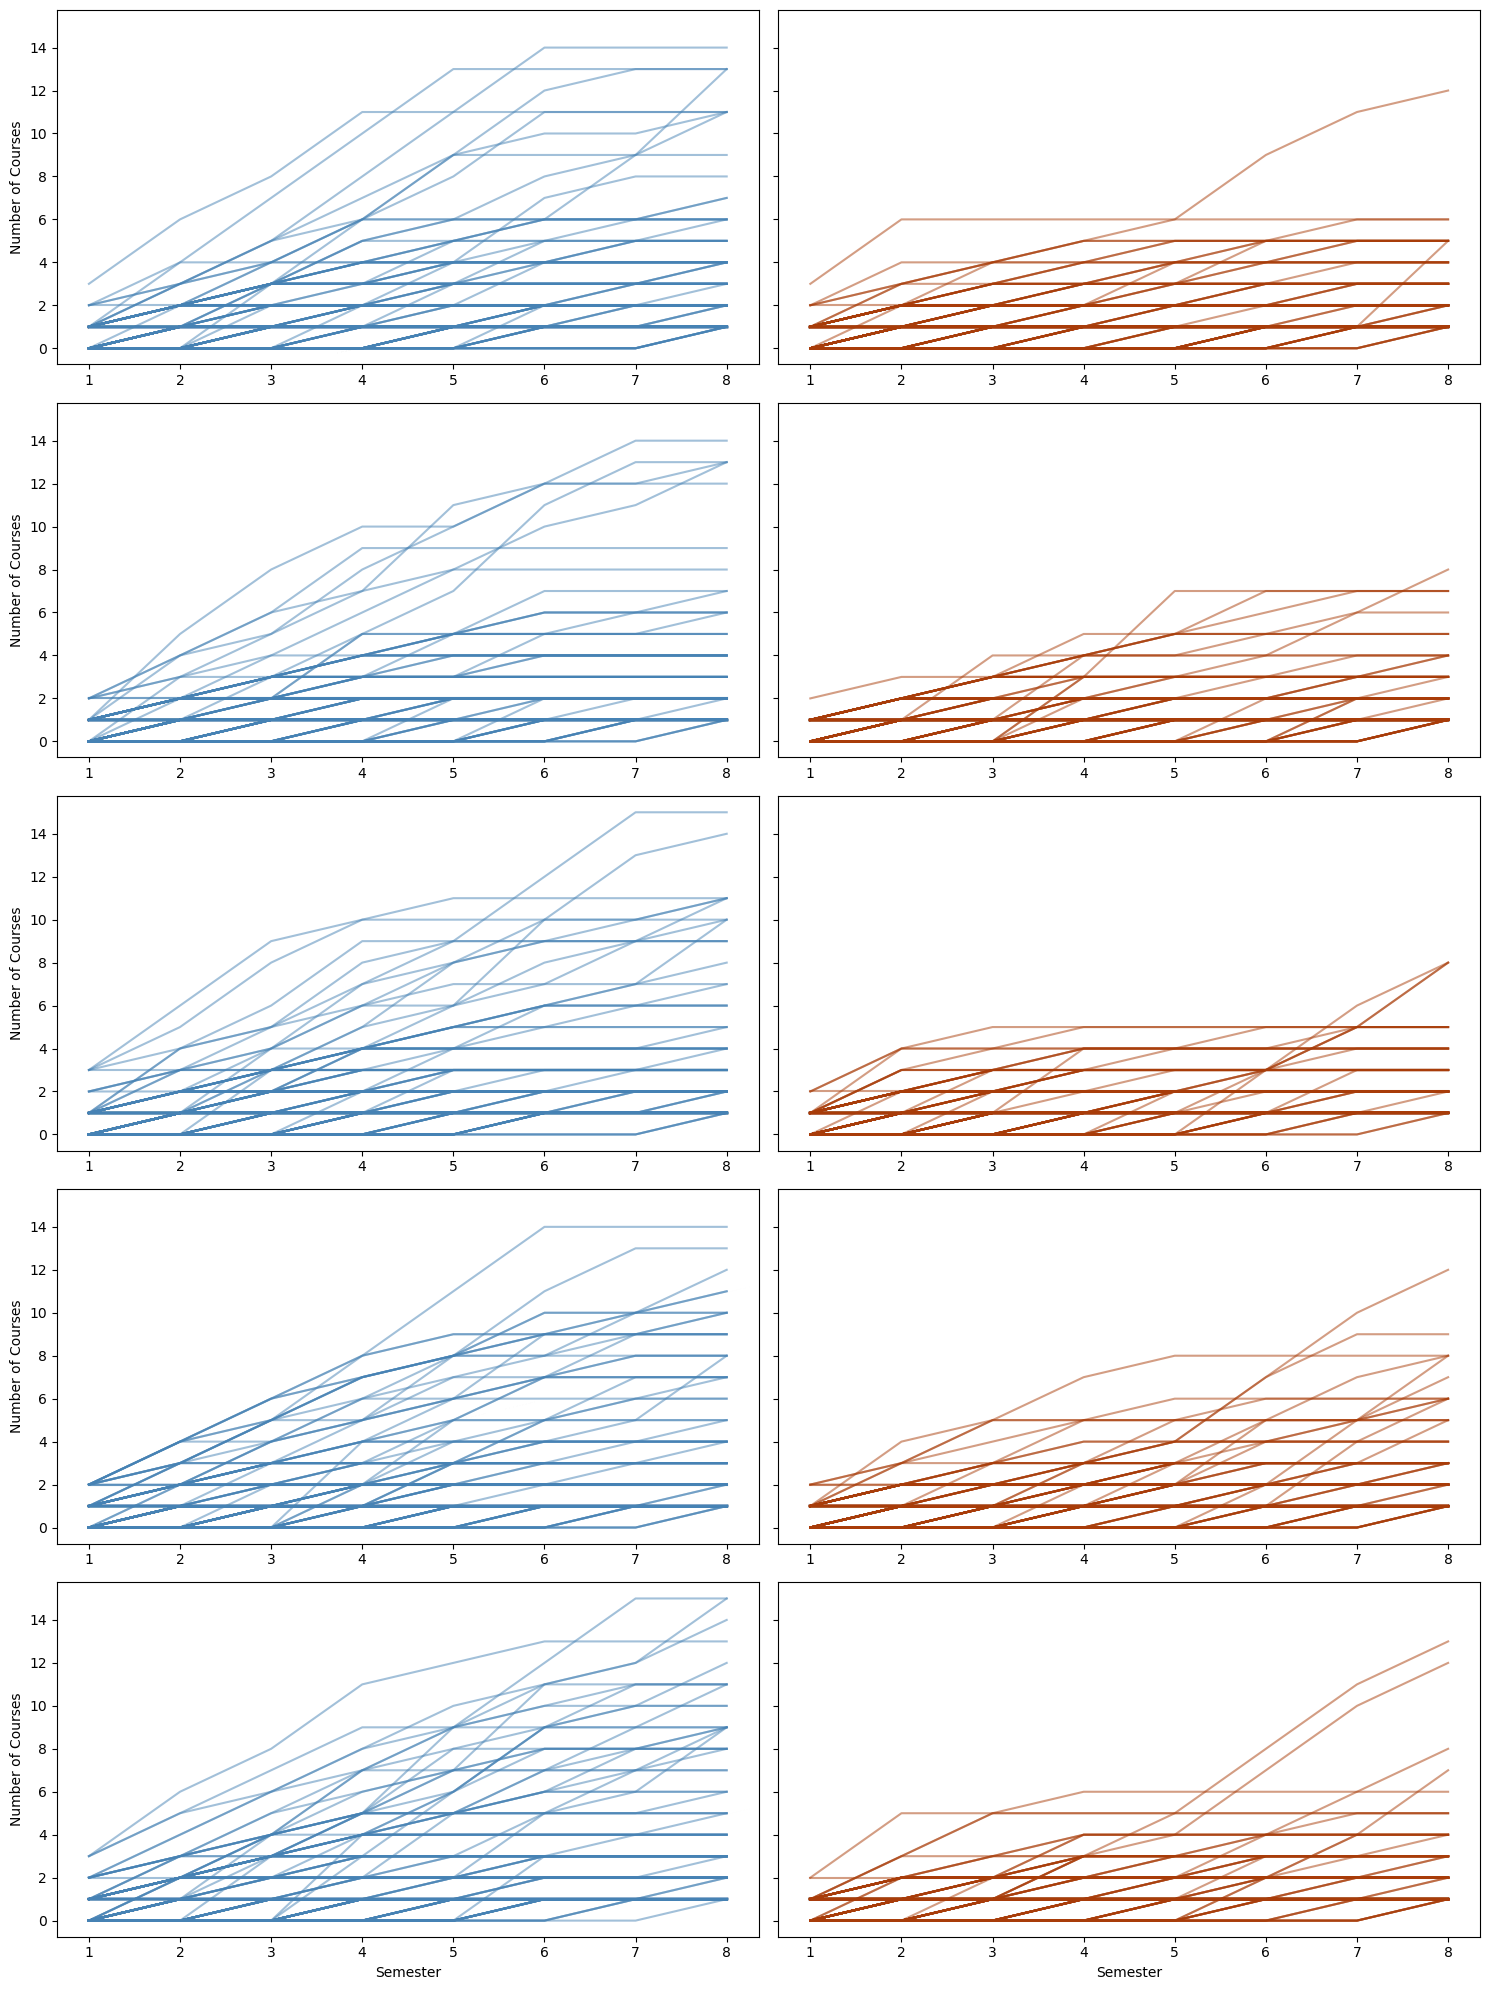

In [ ]:
#I want to create a single lineplot which visualizes the number of courses taken in each semester for each student.
#I will use the seaborn library to create the lineplot.
#I will color the lines based on the value of the target variable, using a nice palette of colors.



# Create a figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20),sharey=True)

# Plot for each row
for i in range(5):
    # Generate a random subset of 200 students for which y=1
    subset_y1 = np.random.choice(df[df['y'] == 1].index, 200)
    for student in subset_y1:
        sns.lineplot(x=range(1, 9), 
                     y=sems_cumulative.iloc[student], 
                     color='steelblue', 
                     alpha=0.5,
                     legend=False,
                     ax=axes[i, 0])
    
    # Generate a random subset of 200 students for which y=0
    subset_y0 = np.random.choice(df[df['y'] == 0].index, 200)
    for student in subset_y0:
        sns.lineplot(x=range(1, 9), 
                     y=sems_cumulative.iloc[student], 
                     color='#a83c09', 
                     alpha=0.5,
                     legend=False,
                     ax=axes[i, 1])

# Set labels
for ax in axes[:, 0]:
    ax.set_ylabel('Number of Courses')
for ax in axes[-1, :]:
    ax.set_xlabel('Semester')

plt.tight_layout()
plt.show()

In [ ]:
#to simplify the above plot, I want to create a new dataframe 'sems_linear' that contains the coefficients of a line of best fit for the values in sems_cumulative for each student.

# Create a new DataFrame
sems_linear = pd.DataFrame(index=sems_cumulative.index)

# Fit a linear regression for each student
for i in range(len(sems_cumulative)):
    line_fit = np.polyfit(x=range(1, 9), 
                          y=sems_cumulative.iloc[i], 
                          deg=1)
    sems_linear.loc[i, 'slope'] = line_fit[0]
    sems_linear.loc[i, 'intercept'] = line_fit[1]

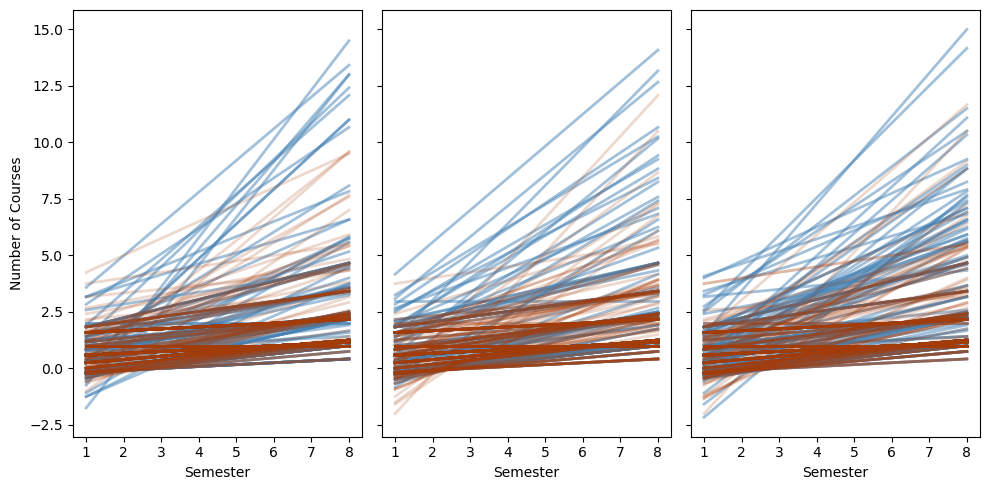

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5), sharey=True)

# Plot for each row
for i in range(3):
    # Generate a random subset of 250 students for which y=1
    subset_y1 = np.random.choice(df[df['y'] == 1].index, 250)
    for student in subset_y1:
        slope = sems_linear.loc[student, 'slope']
        intercept = sems_linear.loc[student, 'intercept']
        sns.lineplot(x=range(1, 9), 
                     y=[slope * x + intercept for x in range(1, 9)], 
                     color='steelblue', 
                     linewidth=2,
                     alpha=0.5,
                     legend=False,
                     ax=axes[i])
    
    # Generate a random subset of 200 students for which y=0
    subset_y0 = np.random.choice(df[df['y'] == 0].index, 250)
    for student in subset_y0:
        slope = sems_linear.loc[student, 'slope']
        intercept = sems_linear.loc[student, 'intercept']
        sns.lineplot(x=range(1, 9), 
                     y=[slope * x + intercept for x in range(1, 9)], 
                     color='#a83c09', 
                     linewidth=2,
                     alpha=0.2,
                     legend=False,
                     ax=axes[i])
        
    axes[i].set_ylabel('Number of Courses')
    axes[i].set_xlabel('Semester')
    axes[i].set_xticks(range(1,9))

plt.tight_layout()
plt.show()

In [ ]:
# g = sns.jointplot(
#     data=data,
#     height = 5,
#     x="wht%", 
#     y="repub%", 
#     hue="Party",
#     palette={'Republican':'indianred','Democrat':'steelblue'},
#     kind="kde" )
# # Set axis labels
# g.set_axis_labels('Percentage White Population', 'Probability of a Republican Win')
# # Set title
# g.fig.suptitle("Whiteness & Republicanism", weight='bold',size=18)
# g.fig.tight_layout()
# plt.legend(loc='lower right')

<Axes: xlabel='slope', ylabel='intercept'>

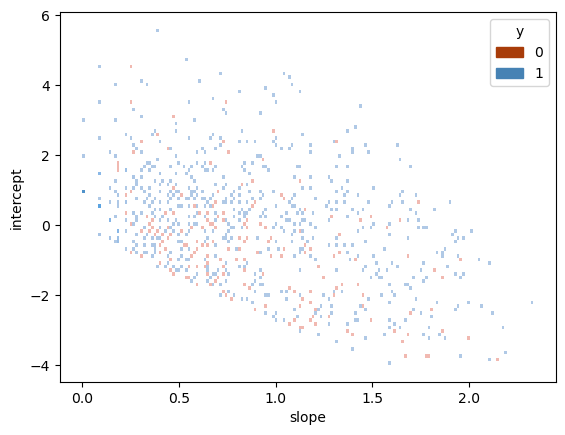

In [ ]:
#I want to visualize the join distribution of the slope and intercept of the line of best fit for the number of courses taken in each semester for each student.
#I will color the points based on the value of the target variable, using a nice palette of colors.
#I will use the seaborn library to create the scatter plot.

# Create a scatter plot of the slope and intercept
sns.jointplot(x=sems_linear['slope'], 
                y=sems_linear['intercept'], 
                hue=y, 
                kind='kde', # size of each dot
                palette=palette)

In [ ]:
gen_crses_100_dict = {   
    '104': 'INTRO TO PROBABILITY',
    "105": "INTRO TO MATH IDEA",
    "140": "COLLEGE ALGEBRA",
    "143": "PREP FOR CALCULUS",
    "145": "APPLD TRIGONOMETR",
    "150": "DISC MATH BUS&SOC S",
    "151": "BUS & SOC SCI CALC",
    "160": "SURVEY OF CALCULUS",
    "165": "CALCULUS I",
    "166": "CALCULUS II"
}
gen_crses_200_dict = {"207": "MATRCES&LINEAR ALGB",
    "265": "CALCULUS III",
    "266": "ELEM DIFF EQUATNS",
    "267": "DIFF EQ & TRANSFMS"}
gen_crses_100 = list(gen_crses_100_dict.keys())
gen_crses_200 = list(gen_crses_200_dict.keys())

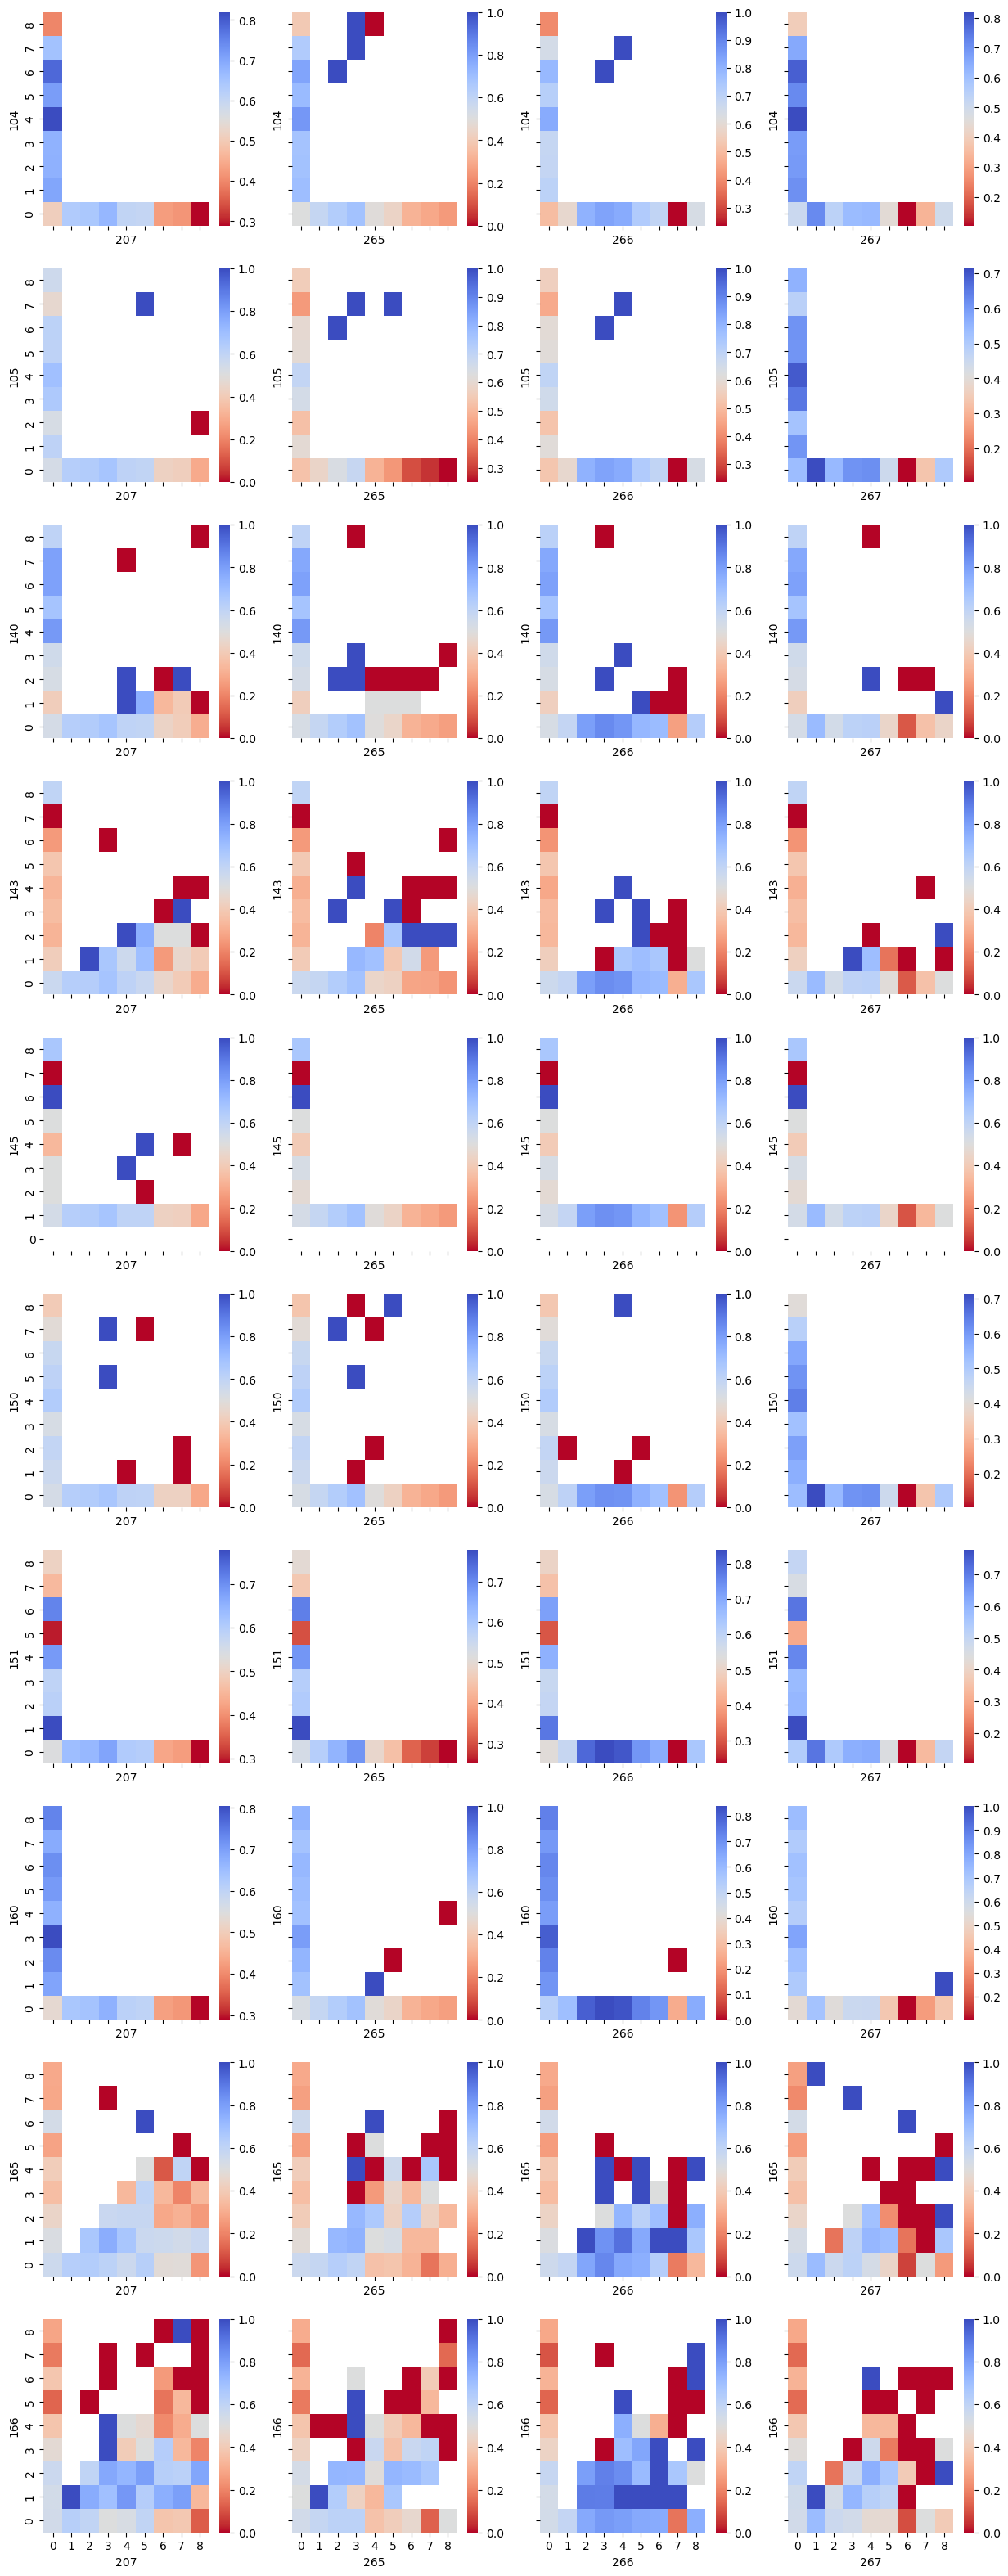

In [ ]:
#For every pair of courses in gen_crses_100 and gen_crses_200, I want to create a heatmap that shows the average value of the target variable for each pair of values of the two courses.append
#I will use the seaborn library to create the heatmap.
#I will color the cells based on the average value of the target variable, using a nice palette of colors.

# Create a figure and axes
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(15, 40),sharey=True,sharex=True)

# Plot for each row
for i, course_100 in enumerate(gen_crses_100):
    for j, course_200 in enumerate(gen_crses_200):
        sns.heatmap(df.groupby([f'{course_100}_SEM',f'{course_200}_SEM'])['y'].mean().unstack().sort_index(ascending=False), 
                    cmap='coolwarm_r', 
                    cbar=True, 
                    ax=axes[i, j])
        axes[i, j].set_xlabel(course_200)
        axes[i, j].set_ylabel(course_100)

In [ ]:
#print all students for which '165_SEM' is greater than '266_SEM' and '266_SEM' is non-zero
temp = df[(df['165_SEM'] > df['266_SEM']) & (df['266_SEM'] > 0)]
temp[['165','165_SEM','266','266_SEM']]

165  165_SEM  266  266_SEM
3757    1        4    1        3
7744    1        5    1        3

In [ ]:
temp = pd.DataFrame()
for x in ['166','207','265','266','267']:
    df_x = df[(df['165_SEM'] > df[f'{x}_SEM']) & (df[f'{x}_SEM'] > 0)]
    df_x = df_x[[f'{x}' for x in ['165','166','207','265','266','267']]+[f'{x}_SEM' for x in ['165','166','207','265','266','267']]].T
    temp = pd.concat([temp,df_x],axis=1)

temp.T.fillna('')


165  166  207  265  266  267  165_SEM  166_SEM  207_SEM  265_SEM  \
632     1    1    0    1    0    1        3        2        0        3   
981     1    1    1    0    0    0        5        2        7        0   
1381    1    1    0    0    0    1        7        2        0        0   
2573    1    1    0    1    0    1        4        2        0        4   
2583    1    1    0    1    0    0        4        2        0        3   
3145    1    1    0    1    0    1        6        2        0        4   
3757    1    1    0    0    1    0        4        2        0        0   
4481    1    0    0    0    0    0        8        2        0        0   
5371    1    1    0    1    0    0        5        3        0        4   
5671    1    1    0    0    0    0        5        3        0        0   
8110    1    0    0    0    0    0        4        2        0        0   
5897    1    1    0    0    0    0        7        7        3        0   
7516    1    0    1    0    0    0        6        0        5        0   
2519    1    0    0    0    0    0        5        0        0        3   
2583    1    1    0    1    0    0        4        2        0        3   
3145    1    1    0    1    0    1        6        2        0        4   
5371    1    1    0    1    0    0        5        3        0        4   
6645    1    0    0    1    0    0        5        0        0        4   
3757    1    1    0    0    1    0        4        2        0        0   
7744    1    1    0    0    1    0        5        7        0        0   
1381    1    1    0    0    0    1        7        2        0        0   
6239    1    0    0    0    0    1        8        0        0        0   

      266_SEM  267_SEM  
632         0        6  
981         0        0  
1381        0        3  
2573        0        4  
2583        0        0  
3145        0        6  
3757        3        0  
4481        0        0  
5371        0        0  
5671        0        0  
8110        0        0  
5897        0        0  
7516        0        0  
2519        0        0  
2583        0        0  
3145        0        6  
5371        0        0  
6645        0        0  
3757        3        0  
7744        3        0  
1381        0        3  
6239        0        1

In [ ]:
df[(df['166_SEM'] > df['267_SEM']) & (df['266_SEM'] > 0)]

STUDENT  GRAD_SEM  101  101_SEM  104  104_SEM  105  105_SEM  140  \
45         63       6.0    0        0    0        0    0        0    0   
75        110       7.0    0        0    0        0    0        0    0   
91        135       8.0    0        0    0        0    0        0    0   
142       212       8.0    0        0    0        0    0        0    0   
172       264       8.0    1        1    0        0    0        0    0   
...       ...       ...  ...      ...  ...      ...  ...      ...  ...   
8952    12750       6.0    1        1    0        0    0        0    0   
8959    12760       8.0    0        0    0        0    0        0    0   
9024    12844       8.0    0        0    0        0    0        0    0   
9117    12980       8.0    1        1    0        0    0        0    0   
9145    13020       8.0    0        0    0        0    0        0    0   

      140_SEM  ...  497_SEM  y  SEM_1  SEM_2  SEM_3  SEM_4  SEM_5  SEM_6  \
45          0  ...        0  1      0      0      1      0      1      0   
75          0  ...        0  1      1      1      1      0      0      0   
91          0  ...        0  1      1      1      1      2      1      0   
142         0  ...        0  1      0      1      0      0      0      0   
172         0  ...        0  1      2      1      2      1      1      1   
...       ...  ...      ... ..    ...    ...    ...    ...    ...    ...   
8952        0  ...        0  1      2      2      3      1      2      1   
8959        0  ...        0  1      1      1      1      0      1      0   
9024        0  ...        0  1      1      1      1      0      0      0   
9117        0  ...        0  1      2      1      2      2      2      3   
9145        0  ...        0  1      0      1      1      1      0      0   

      SEM_7  SEM_8  
45        0      0  
75        0      0  
91        2      0  
142       1      2  
172       1      1  
...     ...    ...  
8952      0      0  
8959      0      1  
9024      0      0  
9117      1      0  
9145      0      0  

[229 rows x 79 columns]

In [ ]:
#for each x in courses, add a column to X named 'X_YEAR' whose value is the value of f'{x}_SEM' + 1 divided by 2 (rounded down)
for x in courses:
    X.loc[:, f'{x}_YEAR'] = (X_SEM[f'{x}_SEM'] + 1) // 2

/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/2108969255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, f'{x}_YEAR'] = (X_SEM[f'{x}_SEM'] + 1) // 2
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/2108969255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, f'{x}_YEAR'] = (X_SEM[f'{x}_SEM'] + 1) // 2
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/2108969255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

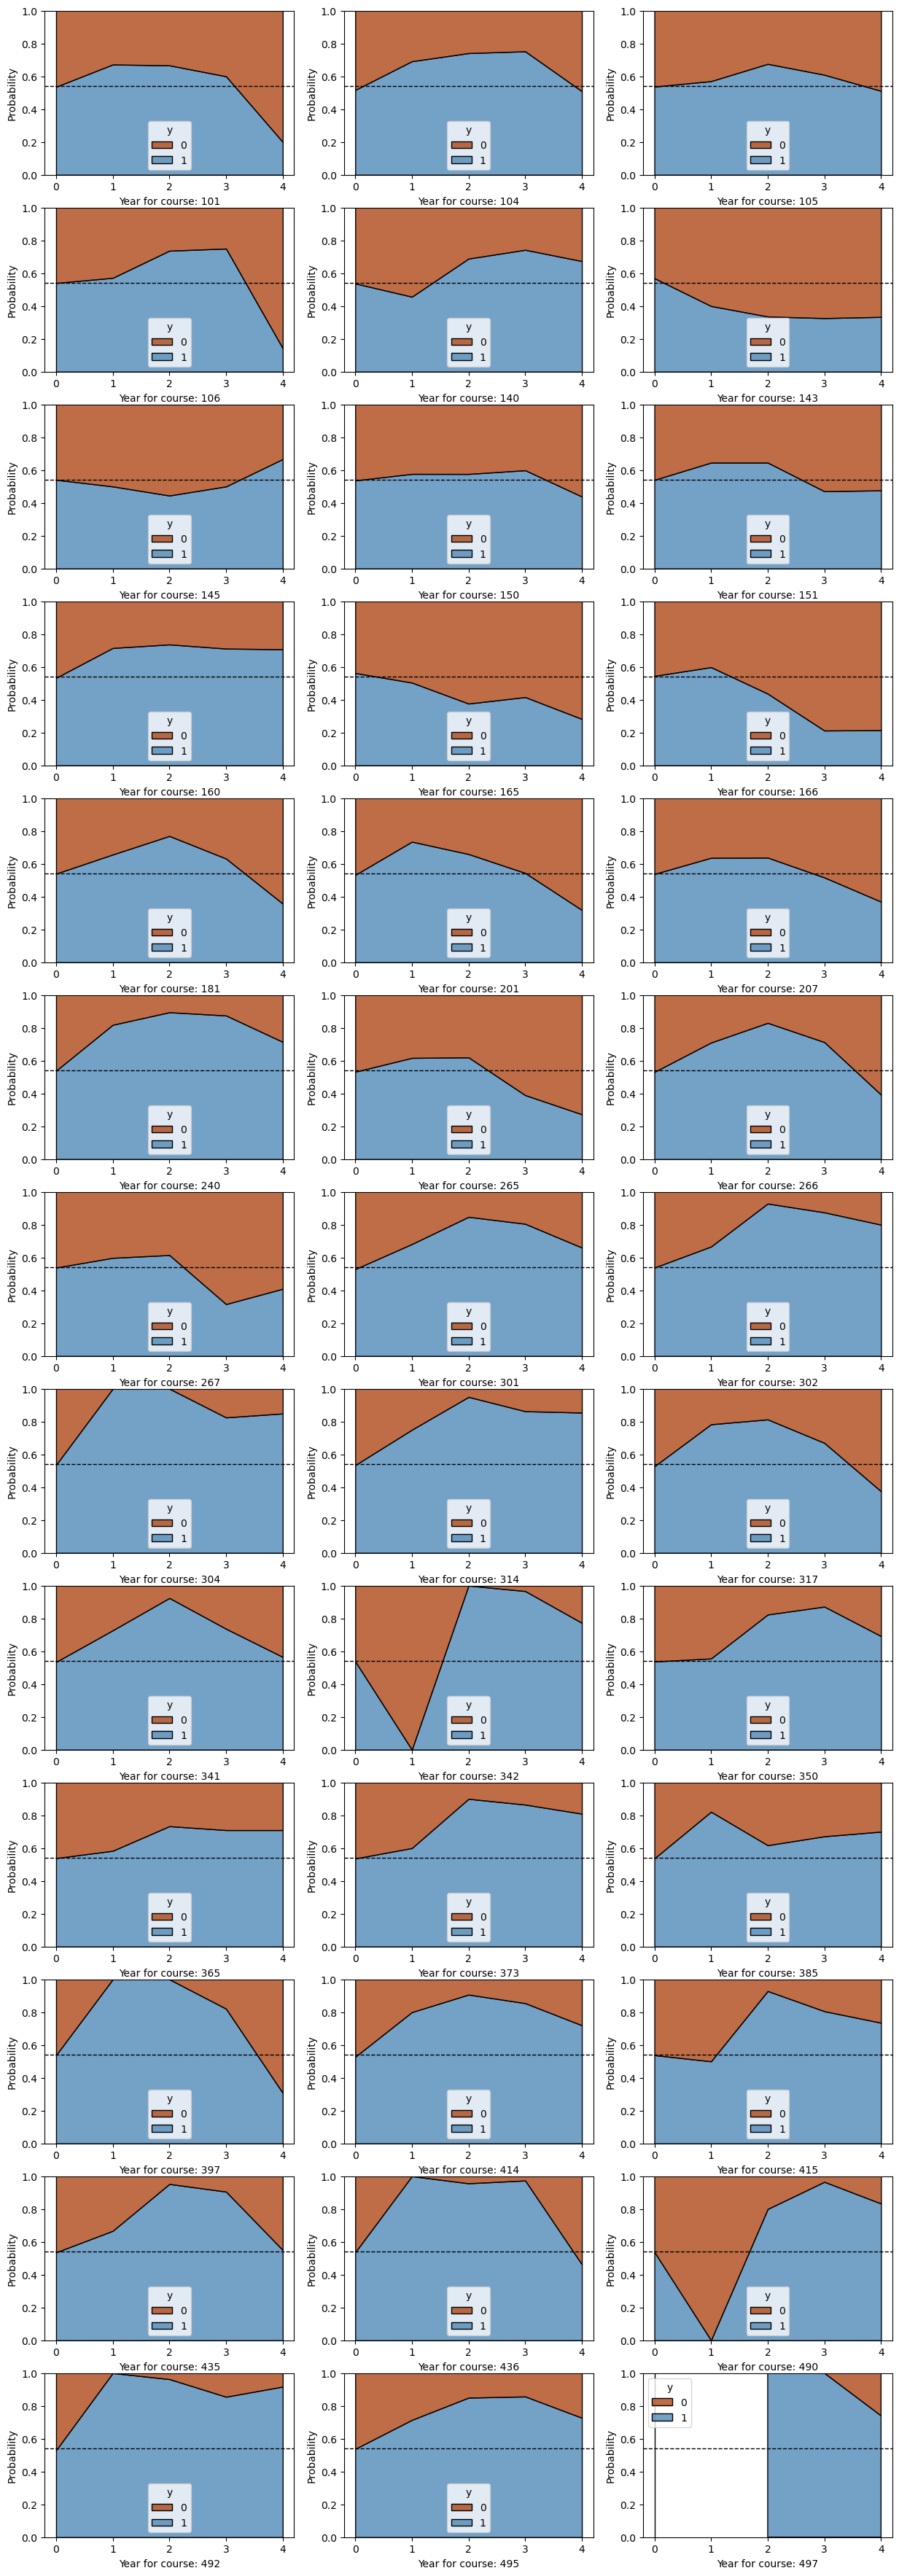

In [ ]:
#For each course, I will create a bar plot that shows the distribution of the target variable among the 5 possible values of f'{x}_YEAR'

# Set the color palette
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, x in enumerate(courses):
    sns.histplot(x=X[f'{x}_YEAR'], 
                 element='poly',
                 multiple='fill', #this will normalize the counts in each bin to sum to 1; thus, the y-axis will show the probability of y=0 or 1 for that value of the feature
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Year for course: '+ x)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(list(range(0,5)))
    #draw a horizontal line at the grad rate
    axes[i].axhline(grad_rate, color='black', linestyle='--', linewidth=1, label='Overall grad rate')

In [ ]:
#print the value counts of each f'{x}_SEM' for each x in courses
for x in courses:
    print(df[f'{x}_SEM'].value_counts())

265_SEM
0    7753
3     466
2     374
1     252
4     239
5     100
6      72
7      35
8      20
Name: count, dtype: int64
166_SEM
0    7170
2     964
1     440
3     366
4     197
5      78
6      54
7      21
8      21
Name: count, dtype: int64
165_SEM
0    6731
1    1315
2     815
4     155
3     148
6      57
5      44
8      31
7      15
Name: count, dtype: int64
207_SEM
0    8440
4     175
3     167
5     125
6     117
1      87
2      78
7      77
8      45
Name: count, dtype: int64
140_SEM
0    8032
1     479
2     266
4     144
3     129
6      95
5      68
8      54
7      44
Name: count, dtype: int64
104_SEM
0    8134
2     276
3     230
4     172
1     165
6     117
5     105
8      63
7      49
Name: count, dtype: int64
385_SEM
0    9095
4      53
5      38
6      29
3      28
2      22
7      21
8      19
1       6
Name: count, dtype: int64
267_SEM
0    8686
4     178
3     175
2     118
1      56
5      47
6      29
7      12
8      10
Name: count, dtype: int64
317_SEM


In [ ]:
#Let's consider some variations of the grade-value encoding to see if we can simplify the problem/improve predictive power

#First, let's replace all -1's with 0's (so we treat these courses as if they were not taken)
X_0 = X.replace(-1, 0)

#Next, let's replace all -1's with 1's (i.e., we ignore the grade and have a 1 if the course was taken)
X_1 = X.replace(-1, 1)

#Finally, let's also try to capture any relationship about the semesters in which the courses were taken as follows

X_0_SEM = X_0.copy()
X_1_SEM = X_1.copy()

for x in courses:
    X_0_SEM[x] = X_0[x] * df[f'{x}_SEM']
    X_1_SEM[x] = X_1[x] * df[f'{x}_SEM']

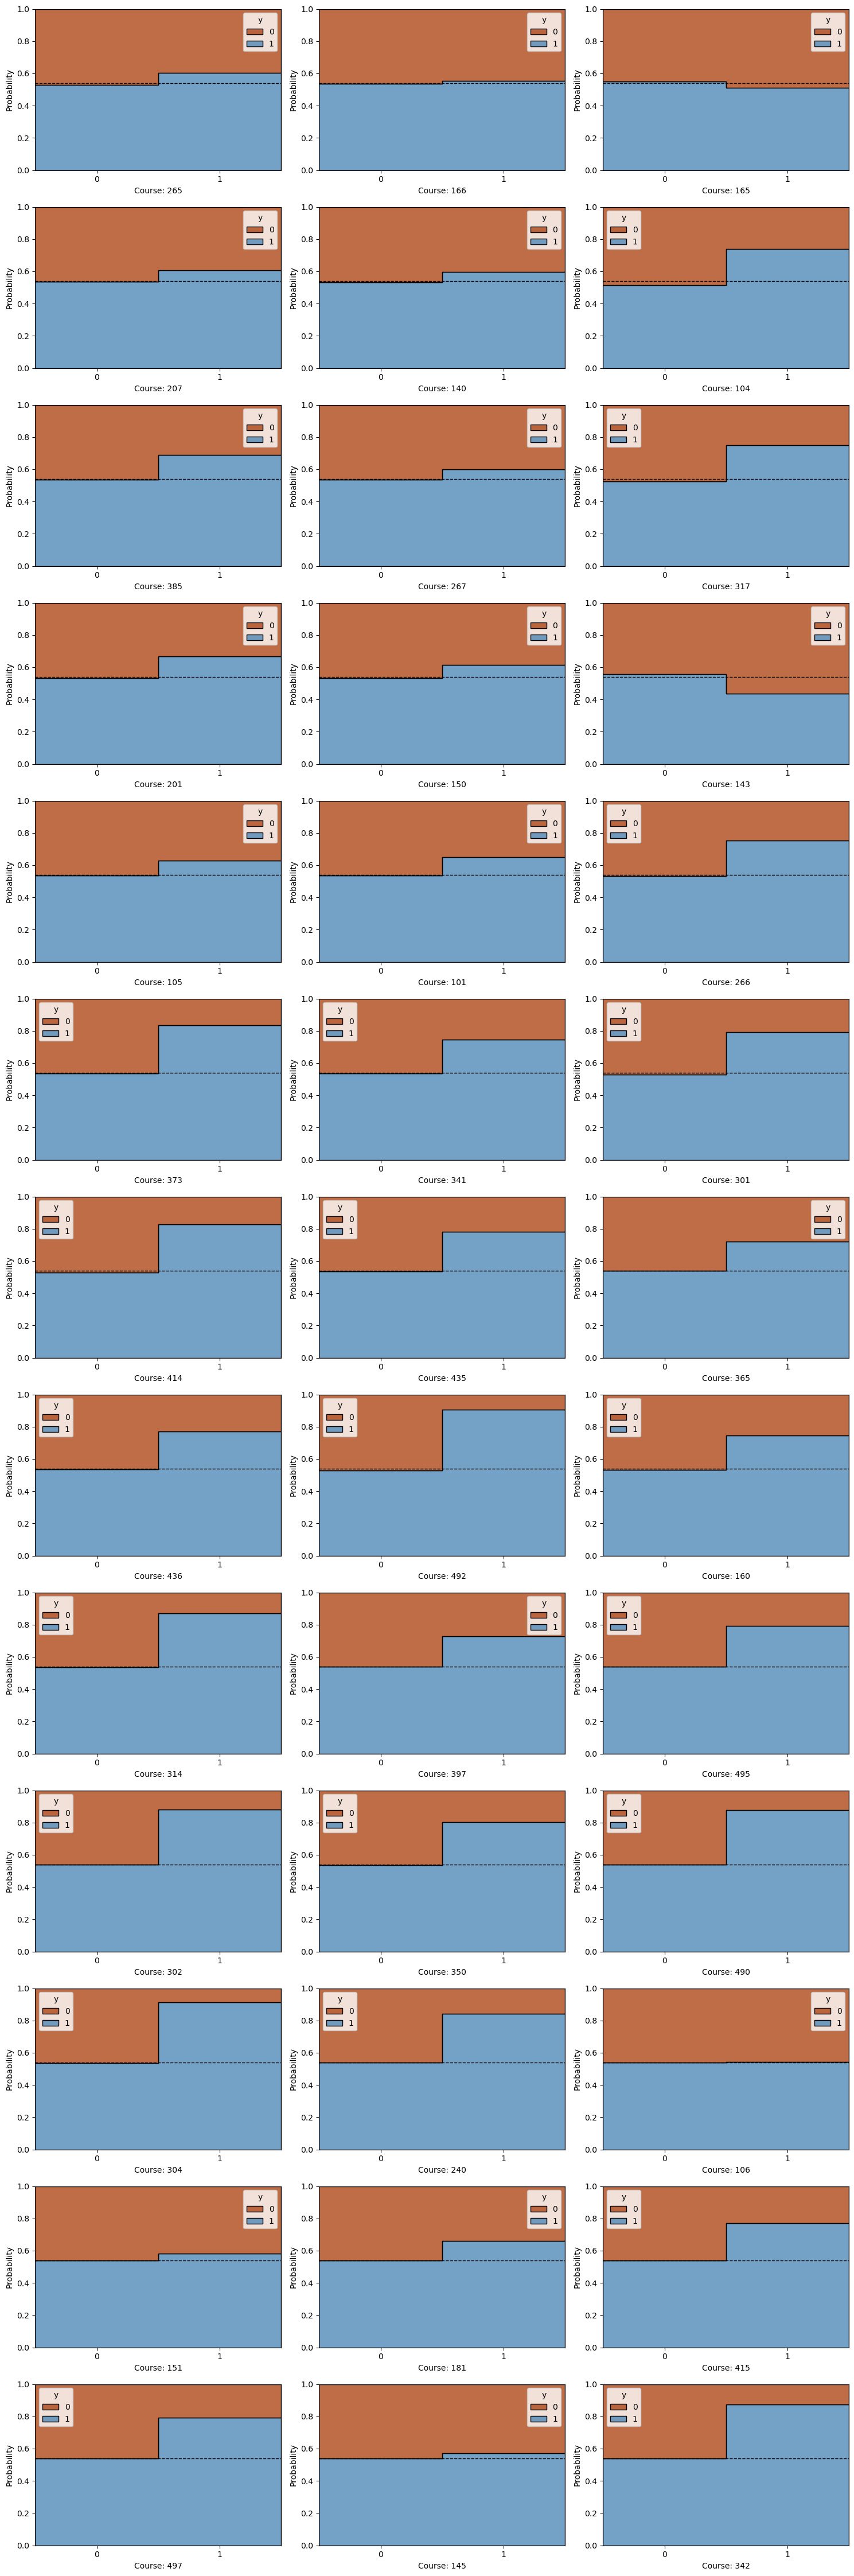

In [ ]:
#Plot
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, course in enumerate(courses):
    sns.histplot(x=X_0[course], 
                 element='step',
                 multiple='fill',
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Course: '+course)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks([0, 1])
    #draw a horizontal line at y=grad_rate
    axes[i].axhline(grad_rate, color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()

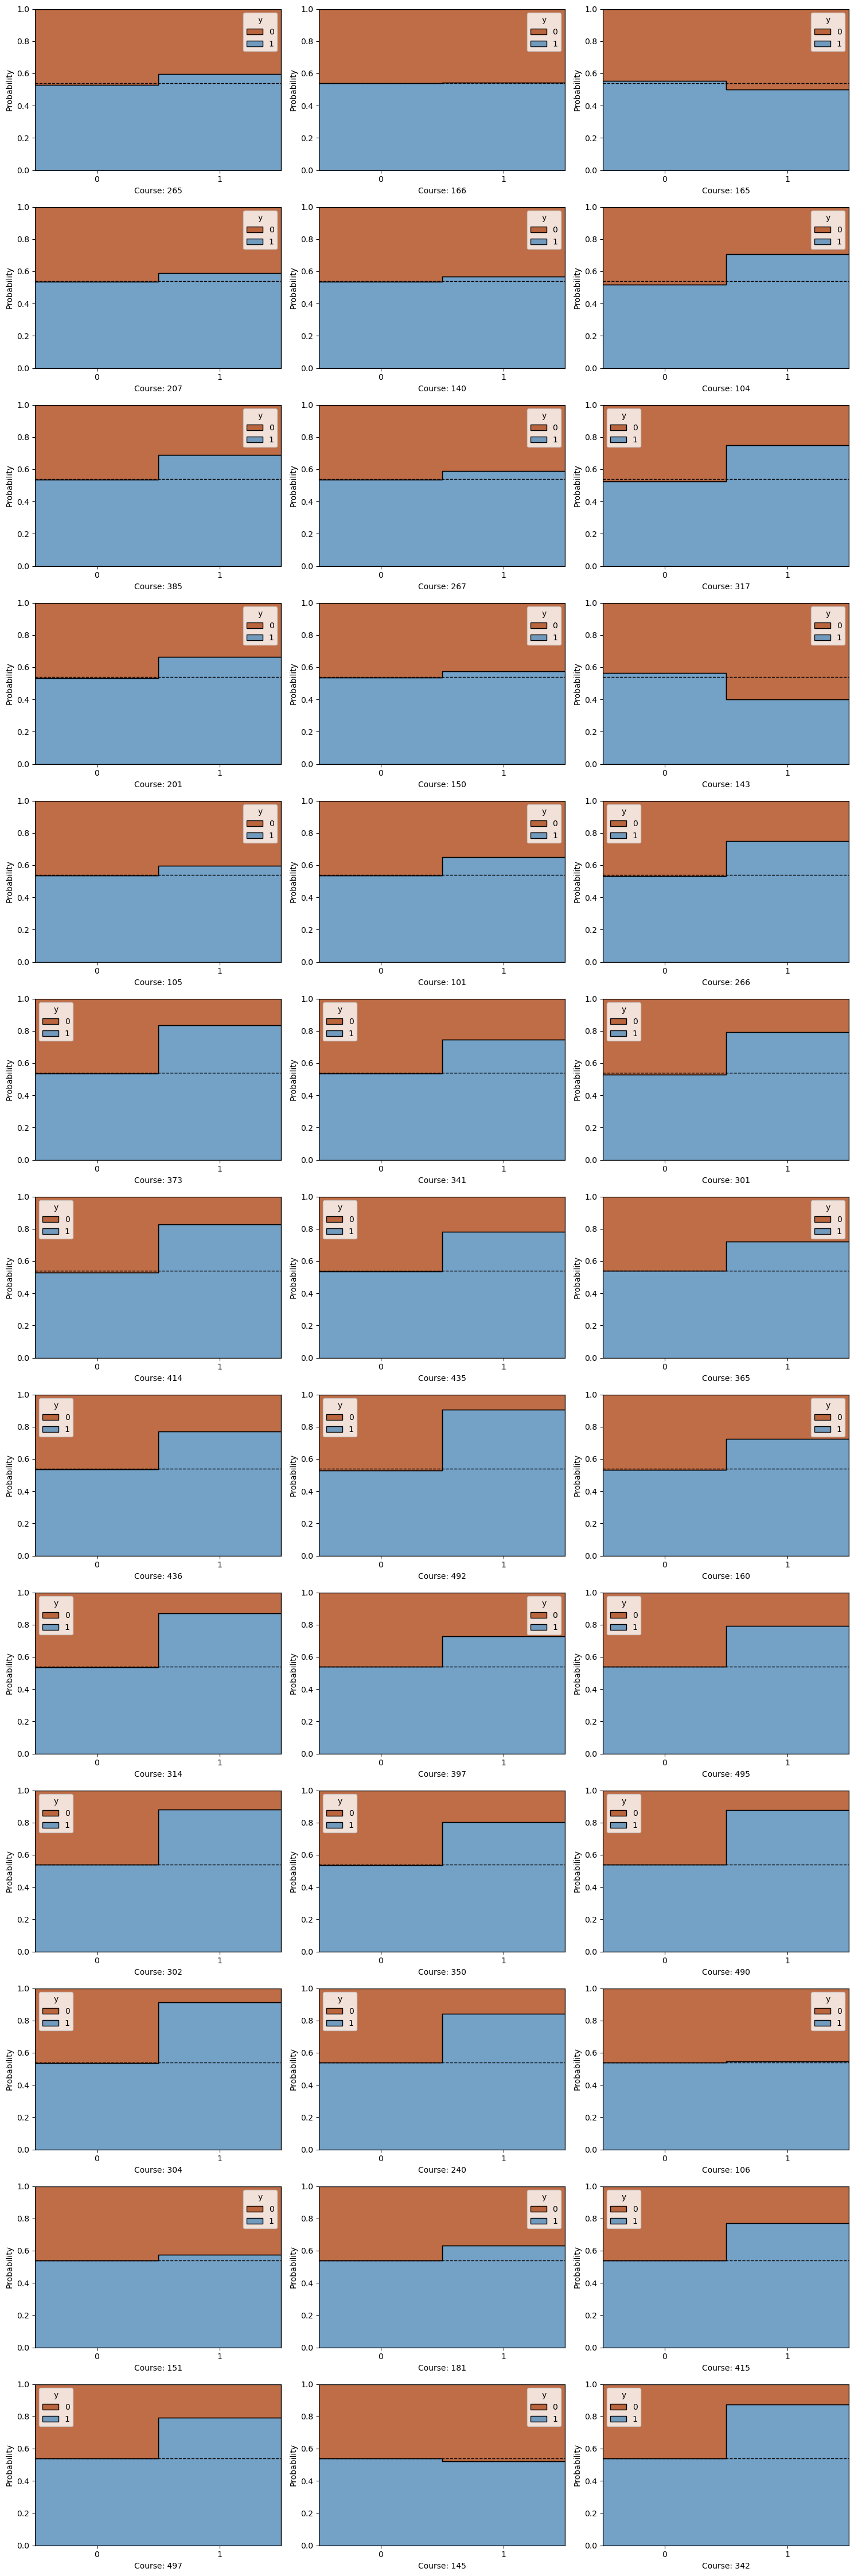

In [ ]:
#Plot
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, course in enumerate(courses):
    sns.histplot(x=X_1[course], 
                 multiple='fill',
                 element='step',
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Course: '+course)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks([0, 1])
    #draw a horizontal line at y=0.5
    axes[i].axhline(y.mean(), color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()

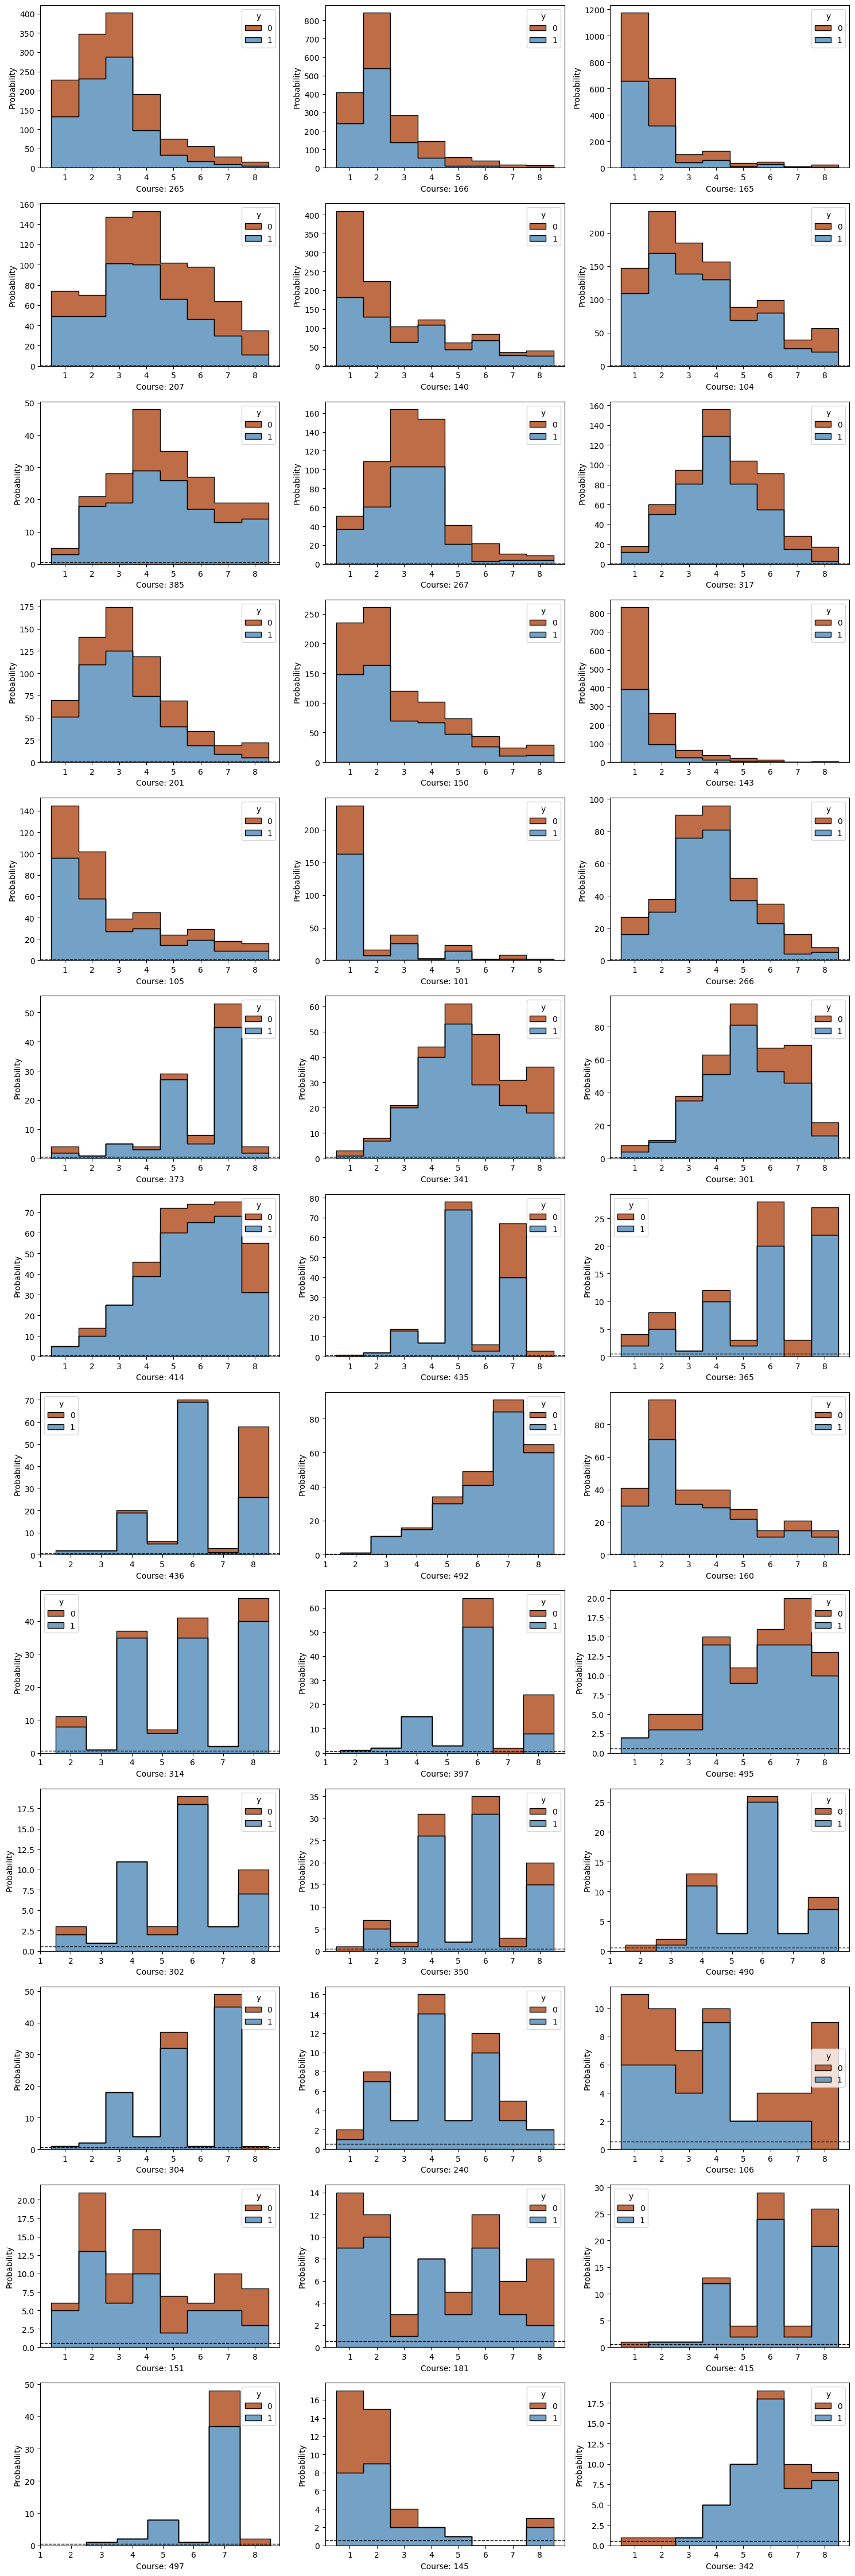

In [ ]:
#Plot
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, course in enumerate(courses):
    sns.histplot(x=X_0_SEM[X_0_SEM[course] > 0][course], 
                #  stat='density',
                 element='step',
                 multiple='stack',
                #  cumulative=True,
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Course: '+course)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks([1,2,3,4,5,6,7,8])
    #draw a horizontal line at y=grad_rate
    axes[i].axhline(grad_rate, color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()

Weight of Evidence (WoE) and Information Value (IV) are statistical measures used primarily in the field of credit scoring and risk modeling to evaluate the predictive power of categorical variables.

Weight of Evidence (WoE) quantifies the relationship between a predictor variable and the binary outcome (e.g., default vs. non-default). It is calculated for each category of the predictor variable and reflects the natural logarithm of the ratio of the proportion of good outcomes to the proportion of bad outcomes within that category. WoE helps in transforming categorical variables into continuous variables, making them more suitable for logistic regression models.

Information Value (IV), on the other hand, measures the overall predictive power of a variable. It is derived from the WoE values and indicates how well a predictor variable can distinguish between the binary outcomes. Higher IV values suggest stronger predictive power, with common thresholds being: IV < 0.02 (not predictive), 0.02 - 0.1 (weak), 0.1 - 0.3 (medium), and > 0.3 (strong).

Together, WoE and IV are powerful tools for feature selection and transformation in predictive modeling.

Weight of Evidence (WoE)
The WoE for each category of a predictor variable is calculated as follows:

$ \text{WoE}_i = \ln \left( \frac{\text{Good}_i / \text{Total Good}}{\text{Bad}_i / \text{Total Bad}} \right), $

Where:

$(\text{Good}_i)$ is the number of good outcomes (y=1) in category (i).
$(\text{Bad}_i)$ is the number of bad outcomes (y=0) in category (i).
$(\text{Total Good})$ is the total number of good outcomes in the dataset.
$(\text{Total Bad})$ is the total number of bad outcomes in the dataset.
Information Value (IV)
The IV for a predictor variable is calculated as follows:

$\text{IV} = \sum_i (\text{Good}_i / \text{Total Good} - \text{Bad}_i / \text{Total Bad}) \times \text{WoE}_i. $

Steps to Compute WoE and IV
Calculate the number of good and bad outcomes for each category of the predictor variable.
Compute the WoE for each category using the formula above.
Calculate the IV for the predictor variable by summing the contributions of each category.

In [ ]:
def compute_iv(df, feature, target):
    # Calculate the number of good and bad outcomes
    total_good = df[target].sum()
    total_bad = len(df[target]) - total_good
    
    # Group by the feature and calculate the number of good and bad outcomes for each category
    grouped = df.groupby(feature)[target].agg(['sum', 'count'])
    grouped['bad'] = grouped['count'] - grouped['sum']
    
    # Calculate the proportion of good and bad outcomes for each category
    grouped['good_dist'] = grouped['sum'] / total_good
    grouped['bad_dist'] = grouped['bad'] / total_bad
    
    # Compute IV for the feature
    grouped['iv'] = (grouped['good_dist'] - grouped['bad_dist']) * np.log(grouped['sum'] - grouped['bad'])
    iv = grouped['iv'].sum()
    
    return iv

X_0_SEM['y'] = y
X_0['y'] = y

# Example usage
iv_values = []

for course in courses:
    iv = compute_iv(X_0_SEM, course, 'y')
    iv_values.append({'course': course, 'IV': iv})
    print(f"Feature: {course}, IV: {iv:.4f}")

# Create a DataFrame for IV values
df_IV = pd.DataFrame(iv_values)

# Print IV for each feature
for iv_value in iv_values:
    print(f"Feature: {iv_value['course']}, IV: {iv_value['IV']:.4f}")


Feature: 265, IV: 0.0267
Feature: 166, IV: 0.1702
Feature: 165, IV: 0.2427
Feature: 207, IV: -0.0287
Feature: 140, IV: 0.0017
Feature: 104, IV: -0.0859
Feature: 385, IV: -0.0528
Feature: 267, IV: -0.0197
Feature: 317, IV: -0.0909
Feature: 201, IV: -0.0649
Feature: 150, IV: -0.0627
Feature: 143, IV: 0.3734
Feature: 105, IV: inf
Feature: 101, IV: inf
Feature: 266, IV: -0.0784
Feature: 373, IV: inf
Feature: 341, IV: inf
Feature: 301, IV: inf
Feature: 414, IV: -0.1142
Feature: 435, IV: inf
Feature: 365, IV: inf
Feature: 436, IV: -0.0352
Feature: 492, IV: -0.1059
Feature: 160, IV: -0.0868
Feature: 314, IV: -0.0678
Feature: 397, IV: -0.0228
Feature: 495, IV: -0.0418
Feature: 302, IV: -0.0319
Feature: 350, IV: inf
Feature: 490, IV: inf
Feature: 304, IV: -0.0591
Feature: 240, IV: inf
Feature: 106, IV: inf
Feature: 151, IV: inf
Feature: 181, IV: inf
Feature: 415, IV: inf
Feature: 497, IV: -0.0249
Feature: 145, IV: inf
Feature: 342, IV: -0.0339
Feature: 265, IV: 0.0267
Feature: 166, IV: 0.1702
F

/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/

In [ ]:
#sort df_IV in descending order of IV values and print
df_IV = df_IV.sort_values('IV', ascending=False,ignore_index=True)
print(df_IV)

   course        IV
0     435       inf
1     490       inf
2     301       inf
3     145       inf
4     415       inf
5     181       inf
6     151       inf
7     240       inf
8     106       inf
9     350       inf
10    105       inf
11    101       inf
12    365       inf
13    373       inf
14    341       inf
15    143  0.373363
16    165  0.242735
17    166  0.170240
18    265  0.026707
19    140  0.001718
20    267 -0.019701
21    397 -0.022759
22    497 -0.024870
23    207 -0.028736
24    302 -0.031905
25    342 -0.033934
26    436 -0.035240
27    495 -0.041772
28    385 -0.052842
29    304 -0.059074
30    150 -0.062672
31    201 -0.064887
32    314 -0.067751
33    266 -0.078437
34    104 -0.085868
35    160 -0.086756
36    317 -0.090939
37    492 -0.105913
38    414 -0.114208


In [ ]:
#Print a list of all courses for which the IV is infinite
inf_courses = [x for x in courses if compute_iv(X_0_SEM, x, 'y') == float('inf')]
print(f'There are {len(inf_courses)} courses for which the IV is infinite:')
print(inf_courses)

There are 15 courses for which the IV is infinite:
['105', '101', '373', '341', '301', '435', '365', '350', '490', '240', '106', '151', '181', '415', '145']


/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/

In [ ]:
fin_courses = list(set(courses) - set(inf_courses))

#Drop the infinite IV courses from df_IV    
df_IV = df_IV[df_IV['course'].isin(fin_courses)]

#sort df_IV by IV in descending order of absolute value
df_IV = df_IV.sort_values(by='IV', ascending=False, key=abs)

df_IV


course        IV
5     104  0.107676
8     317  0.078912
4     140  0.062482
17    301  0.061930
1     166  0.054907
14    266  0.050180
0     265  0.046509
16    341  0.044849
9     201  0.038502
23    160  0.025081
3     207  0.021957
2     165  0.021082
7     267  0.019012
10    150  0.013637
6     385  0.011494
12    105  0.008117
33    151  0.003948

/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/559443023.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=woe_iv_dict[course]['woe'].index,
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/559443023.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=woe_iv_dict[course]['woe'].index,
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/559443023.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=woe_iv_dict[course]['woe'].index,
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/559443023.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=woe_iv_dict[course]['woe'].index,
/var/folders/8h/w7q1fjwd5kn8xvqty5sp3h7r0000gn/T/ipykernel_81549/559443023.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been

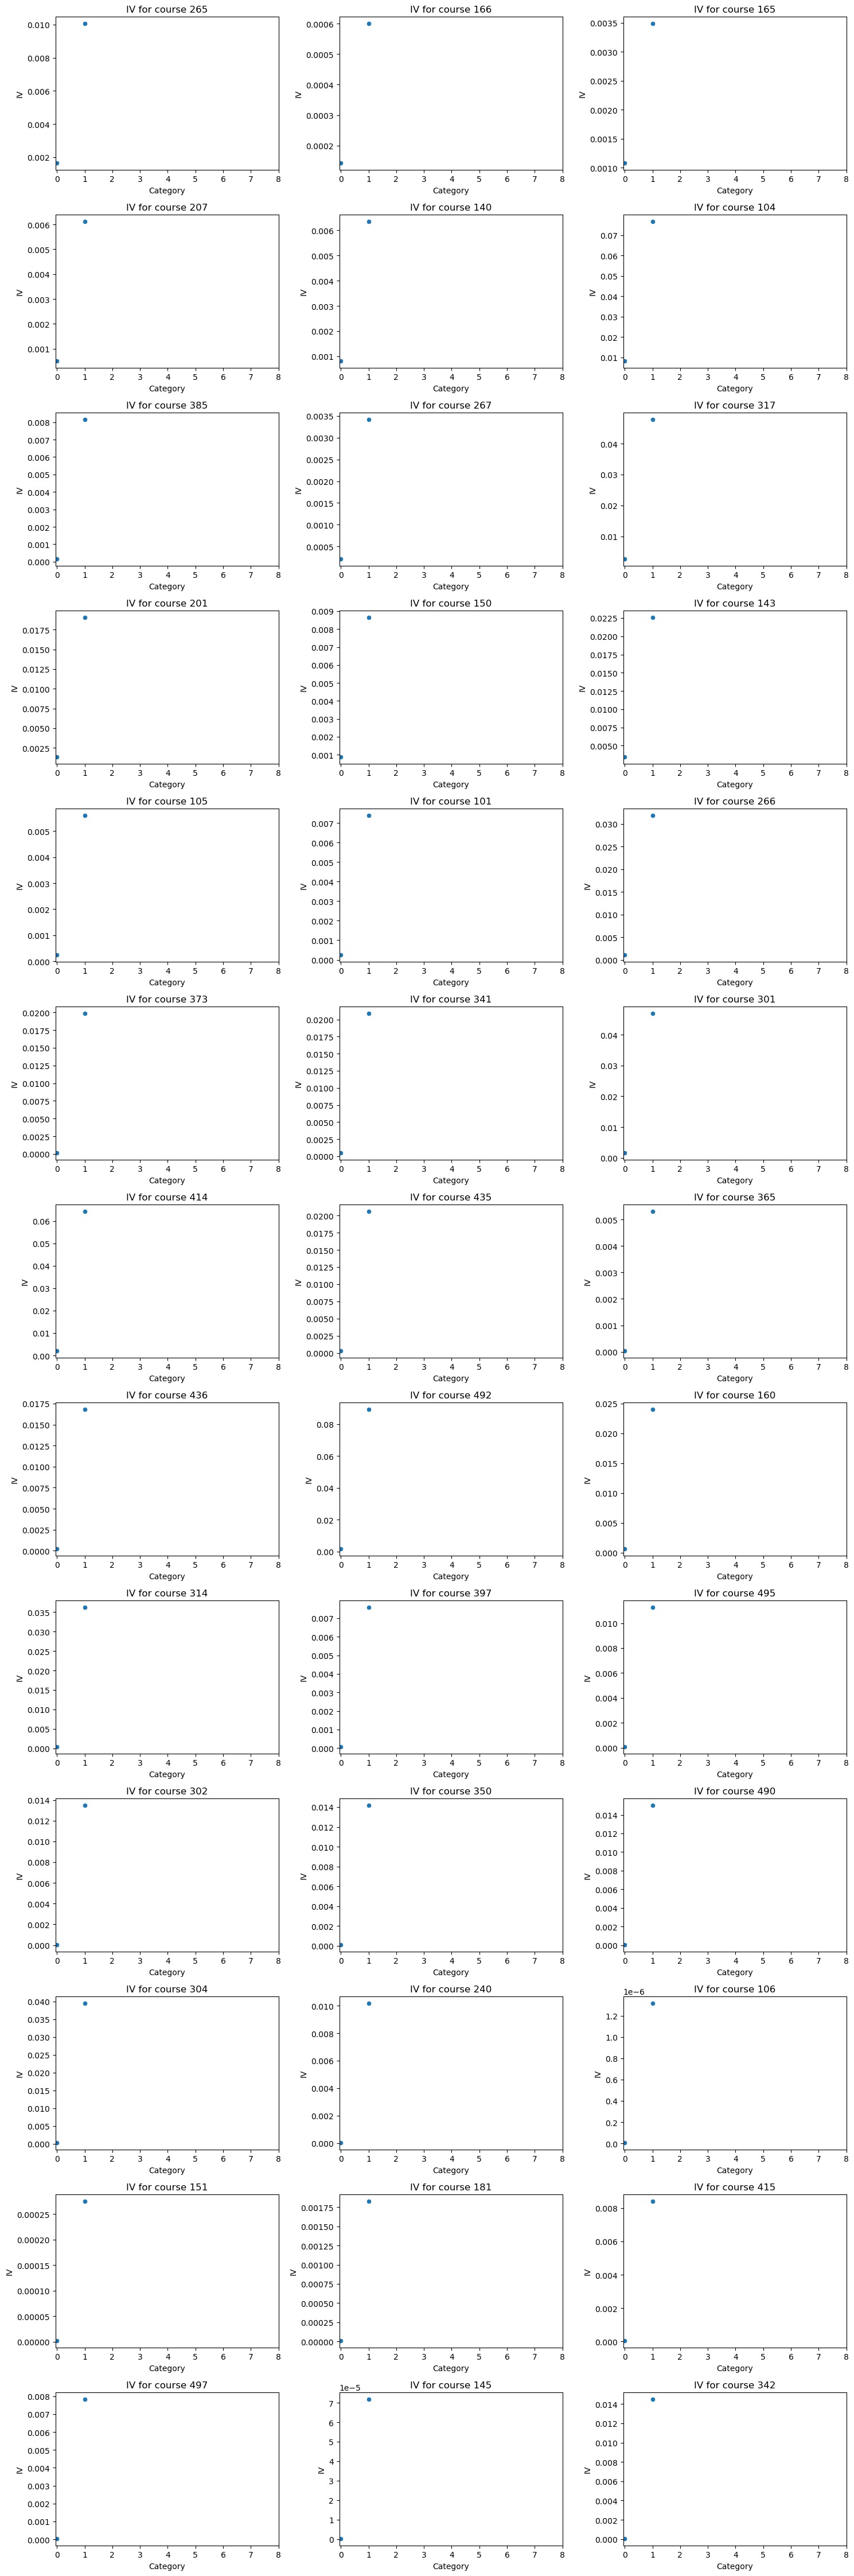

In [ ]:
#similar to the previous plots, I will create a lineplot that shows the IV for each category of each course.
#I will use the seaborn library to create the lineplots.
#I will color the lines based on the IV value, using a nice palette of colors.
# Set the color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the IV values for each course
for i, course in enumerate(courses):
    sns.scatterplot(x=woe_iv_dict[course]['woe'].index, 
                 y='iv', 
                 data=woe_iv_dict[course]['woe'], 
                 ax=axes[i], 
                 palette=palette)
    axes[i].set_title(f'IV for course {course}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('IV')
    axes[i].set_xticks([0,1,2,3,4,5,6,7,8])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
X_0['y'] = y

# Example usage
woe_iv_dict = {}
iv_values = []

for course in courses:
    woe_iv, iv = compute_woe_iv(X_0, course, 'y')
    woe_iv_dict[course] = {'woe': woe_iv, 'iv': iv}
    iv_values.append({'course': course, 'IV': iv})
    print(f"Feature: {course}, IV: {iv:.4f}")

# Create a DataFrame for IV values
df_IV = pd.DataFrame(iv_values)

# Print WoE and IV for each feature
for course, values in woe_iv_dict.items():
    print(f"\nFeature: {course}")
    print(values['woe'])
    print(f"IV: {values['iv']:.4f}")

Feature: 265, IV: 0.0117
Feature: 166, IV: 0.0007
Feature: 165, IV: 0.0046
Feature: 207, IV: 0.0066
Feature: 140, IV: 0.0072
Feature: 104, IV: 0.0849
Feature: 385, IV: 0.0083
Feature: 267, IV: 0.0036
Feature: 317, IV: 0.0505
Feature: 201, IV: 0.0204
Feature: 150, IV: 0.0095
Feature: 143, IV: 0.0260
Feature: 105, IV: 0.0058
Feature: 101, IV: 0.0076
Feature: 266, IV: 0.0330
Feature: 373, IV: 0.0200
Feature: 341, IV: 0.0214
Feature: 301, IV: 0.0486
Feature: 414, IV: 0.0663
Feature: 435, IV: 0.0209
Feature: 365, IV: 0.0053
Feature: 436, IV: 0.0170
Feature: 492, IV: 0.0910
Feature: 160, IV: 0.0247
Feature: 314, IV: 0.0366
Feature: 397, IV: 0.0077
Feature: 495, IV: 0.0113
Feature: 302, IV: 0.0135
Feature: 350, IV: 0.0143
Feature: 490, IV: 0.0151
Feature: 304, IV: 0.0397
Feature: 240, IV: 0.0102
Feature: 106, IV: 0.0000
Feature: 151, IV: 0.0003
Feature: 181, IV: 0.0018
Feature: 415, IV: 0.0085
Feature: 497, IV: 0.0079
Feature: 145, IV: 0.0001
Feature: 342, IV: 0.0145

Feature: 265
          w

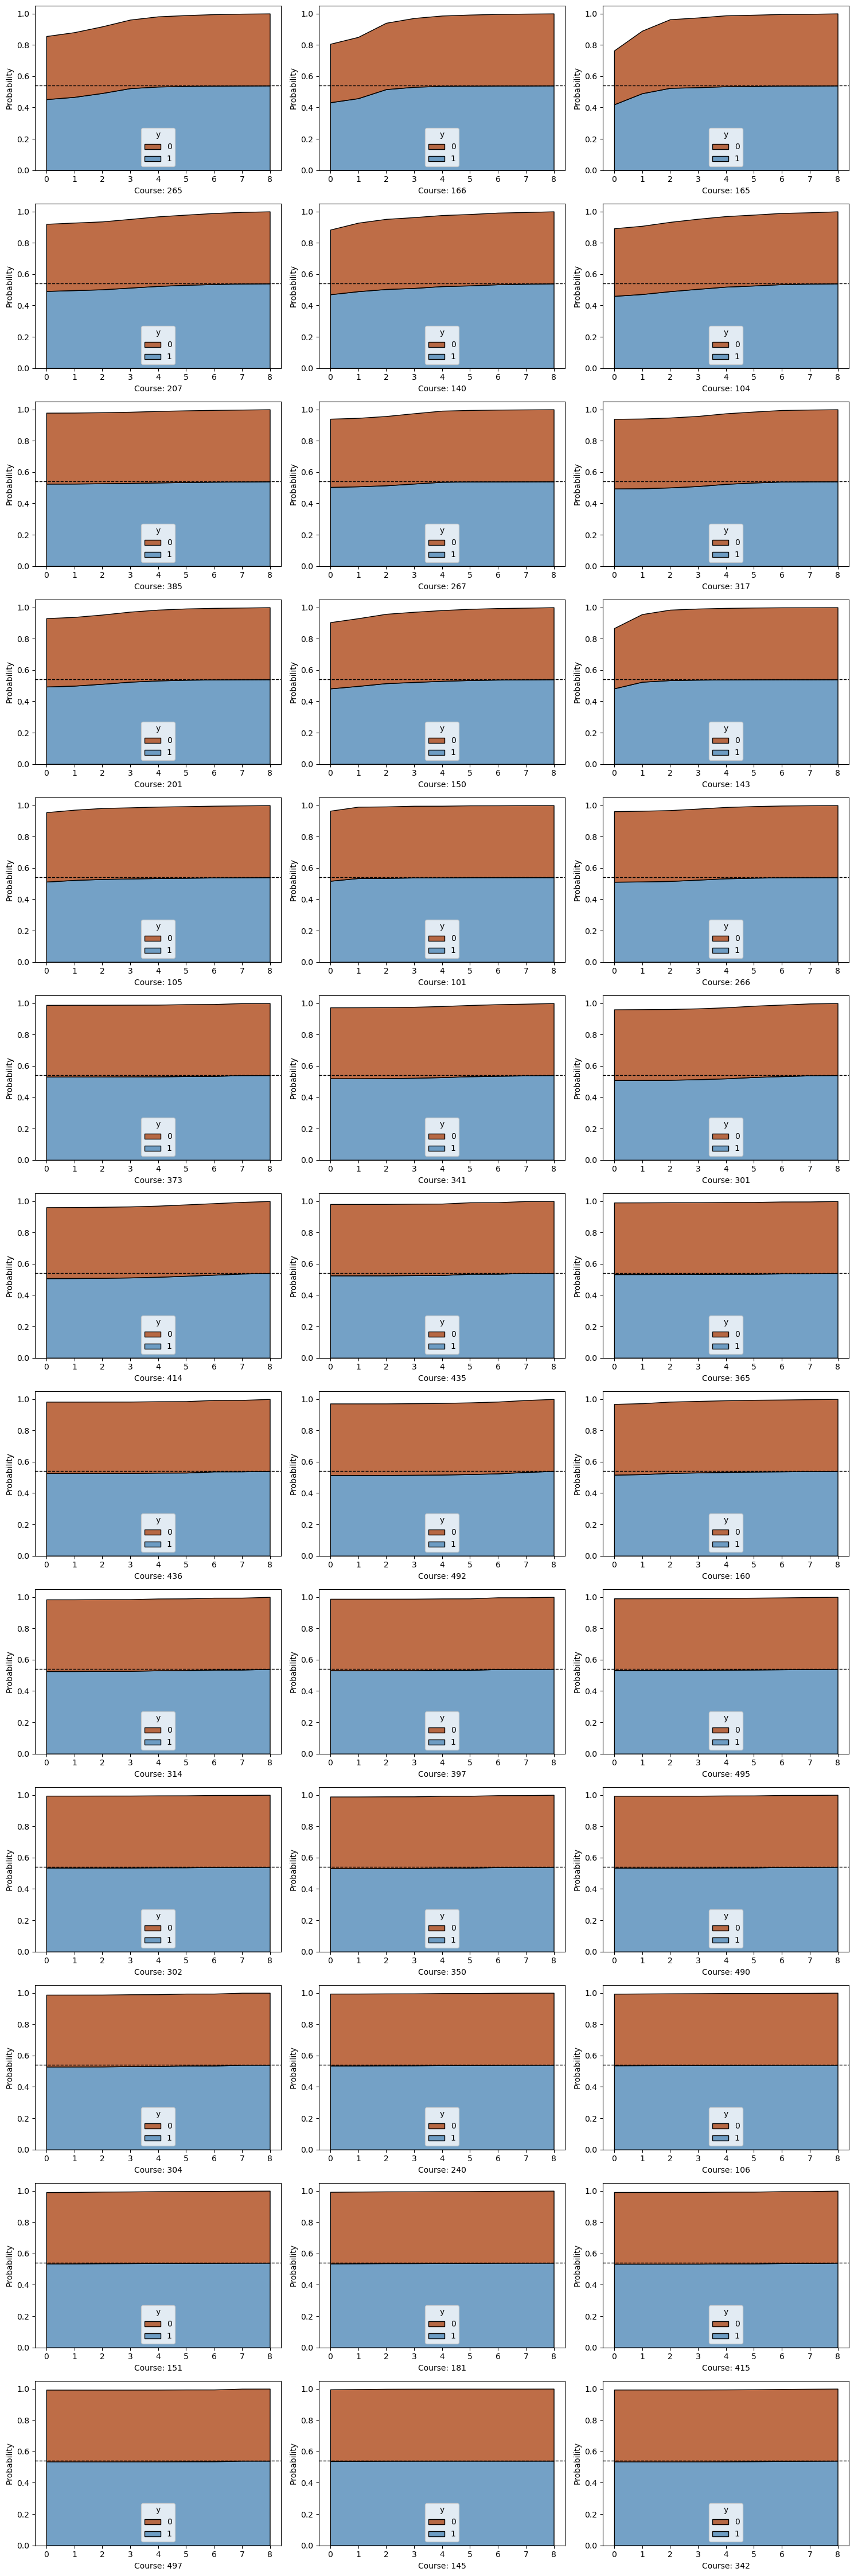

In [ ]:
#Plot
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, course in enumerate(courses):
    sns.histplot(x=X_0_SEM[course], 
                 stat='density',
                element='poly',
                multiple='stack',
                 discrete=True,
                 cumulative=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Course: '+course)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks([0,1,2,3,4,5,6,7,8])
    #draw a horizontal line at y=grad_rate
    axes[i].axhline(grad_rate, color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#for each x in courses, multiply the 'x' column the f'{x}_SEM' column
X = df[courses].copy()
for x in courses:
    X.loc[:, x] = X[x] * df[f'{x}_SEM']

X

265  166  165  207  140  104  385  267  317  201  ...  490  304  240  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    2    1    4    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    2    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    4    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9306    0    0    0    0    3    0    0    0    0    0  ...    0    0    0   
9307    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9308    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9309    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9310    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      106  151  181  415  497  145  342  
0       0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    0    0    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
9306    0    0    0    0    0    0    0  
9307    0    0    0    0    0    0    0  
9308    0    0    0    0    0    0    0  
9309    0    0    0    0    0    0    0  
9310    0    5    0    0    0    0    0  

[9311 rows x 39 columns]

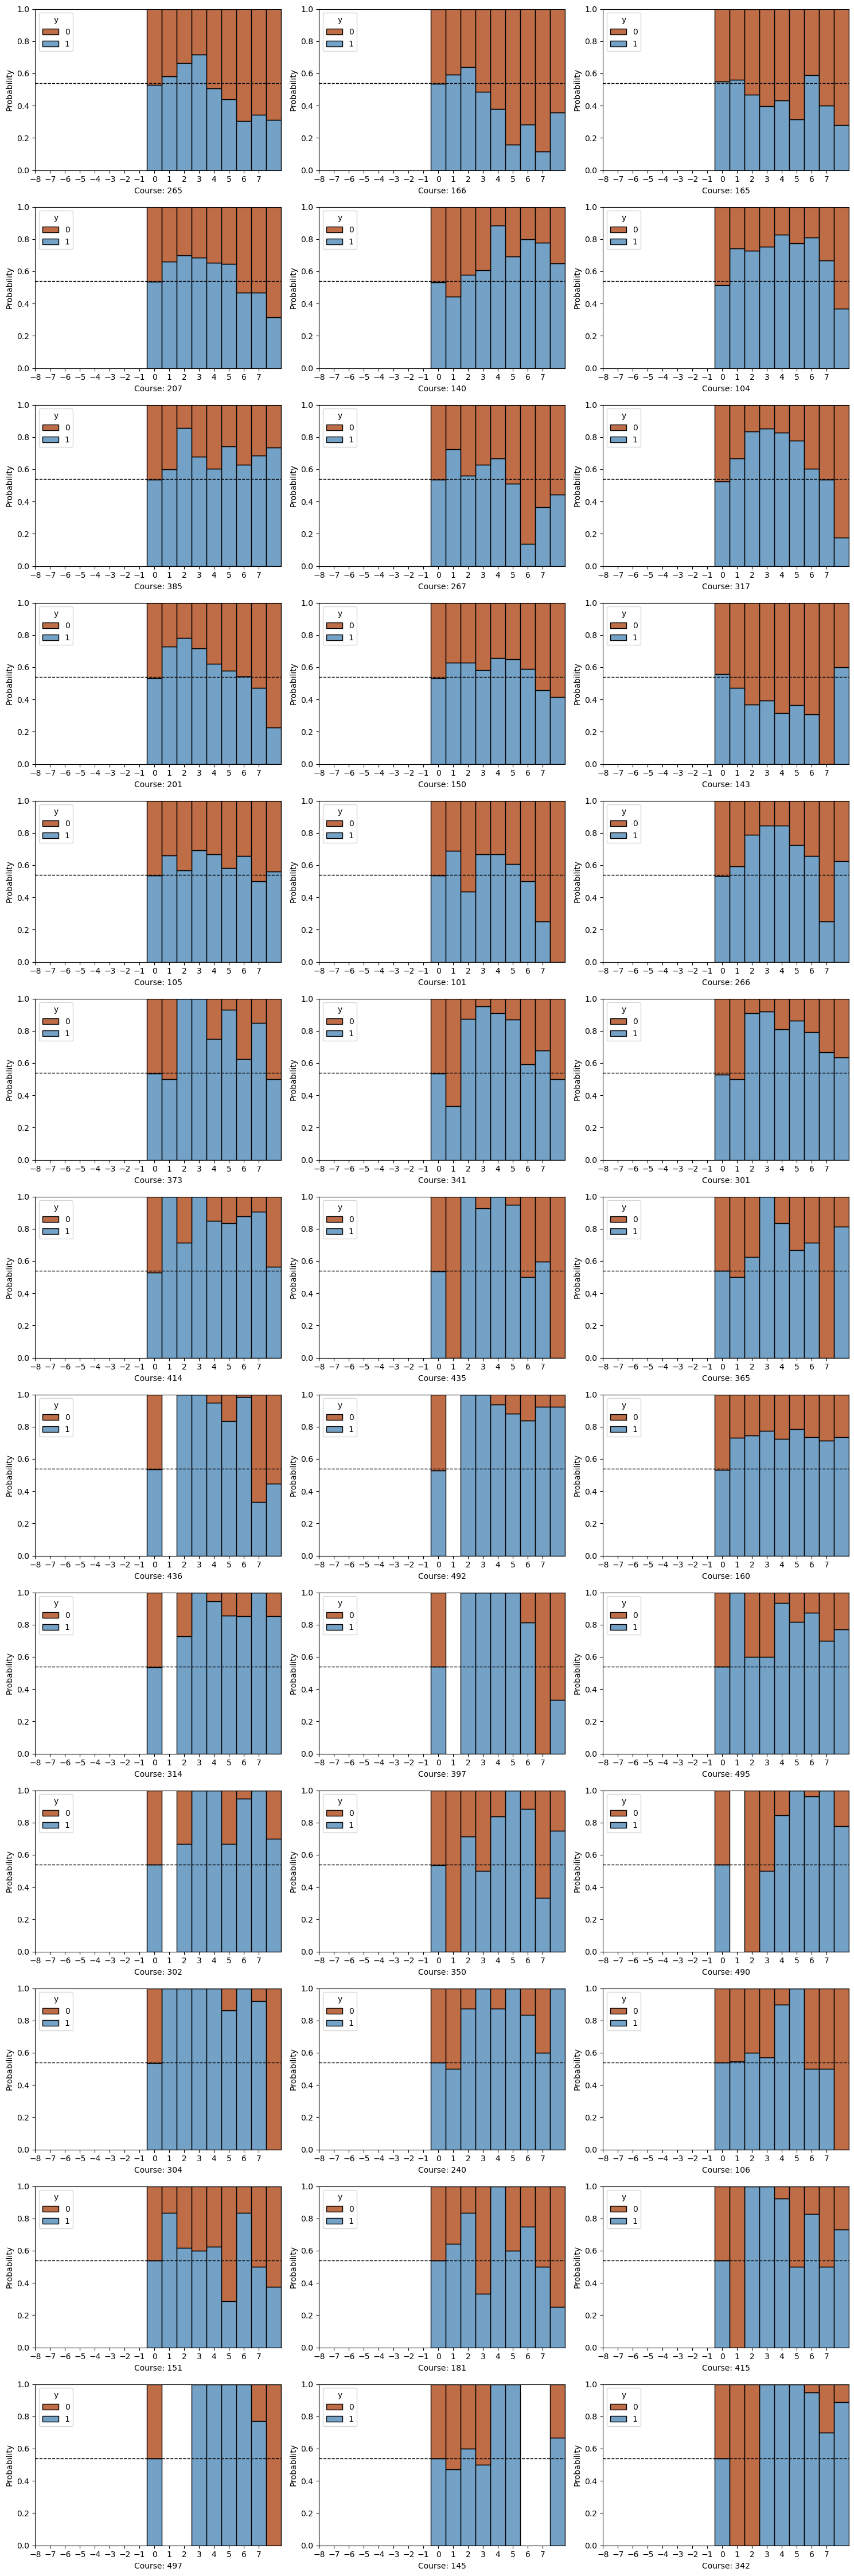

In [ ]:
#now plot it
palette = {0: '#a83c09', 1: 'steelblue'}

# Create a figure and axes
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
axes = axes.flatten()

# Plot the distribution of the target variable for each course
for i, course in enumerate(courses):
    sns.histplot(x=X[course], 
                 stat='density',
                 multiple='fill',
                 discrete=True,
                 hue=y, 
                 palette=palette, 
                 ax=axes[i])
    # axes[i].set_title(f'Distribution of y for course {course}')
    axes[i].set_xlabel('Course: '+course)
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(list(range(-8,8)))
    #draw a horizontal line at y=0.5
    axes[i].axhline(y.mean(), color='black', linestyle='--', linewidth=1, label='Overall grad rate')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#this time, let's modify X to make the -1 values all 1 (so the value in the 'x' column is 1 if and only if the student has taken the course)
# X = df[courses]
# X.replace(-1, 1, inplace=True)

# #visualize the distribution of the target variable among the 3 possible values of each course as before
# palette = {0: '#a83c09', 1: 'steelblue'}

# # Create a figure and axes
# fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15, 45))
# axes = axes.flatten()

# # Plot the distribution of the target variable for each course
# for i, course in enumerate(courses):
#     sns.histplot(x=X[course], 
#                  stat='density',
#                  multiple='fill',
#                  discrete=True,
#                  hue=y, 
#                  palette=palette, 
#                  ax=axes[i])
#     # axes[i].set_title(f'Distribution of y for course {course}')
#     axes[i].set_xlabel('Course: '+course)
#     axes[i].set_ylabel('Probability')
#     axes[i].set_xticks([0, 1])
#     #draw a horizontal line at y=0.5
#     axes[i].axhline(0.5, color='black', linestyle='--', linewidth=1)
# # Adjust layout
# plt.tight_layout()
# plt.show()